In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [7]:
df=pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [8]:
df.shape

(99999, 226)

In [9]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [10]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage_df = pd.DataFrame({'Column': df.columns, 'Null_Percentage': null_percentage}).reset_index(drop=True)
null_percentage_df = null_percentage_df.sort_values(by='Null_Percentage', ascending=False)
print(null_percentage_df)
display(null_percentage_df)

                       Column  Null_Percentage
189                 arpu_3g_6        74.846748
197          night_pck_user_6        74.846748
161         total_rech_data_6        74.846748
193                 arpu_2g_6        74.846748
165           max_rech_data_6        74.846748
217                 fb_user_6        74.846748
177        av_rech_amt_data_6        74.846748
157  date_of_last_rech_data_6        74.846748
169           count_rech_2g_6        74.846748
173           count_rech_3g_6        74.846748
158  date_of_last_rech_data_7        74.428744
162         total_rech_data_7        74.428744
218                 fb_user_7        74.428744
166           max_rech_data_7        74.428744
198          night_pck_user_7        74.428744
170           count_rech_2g_7        74.428744
178        av_rech_amt_data_7        74.428744
194                 arpu_2g_7        74.428744
174           count_rech_3g_7        74.428744
190                 arpu_3g_7        74.428744
164         t

Column  Null_Percentage
189                 arpu_3g_6        74.846748
197          night_pck_user_6        74.846748
161         total_rech_data_6        74.846748
193                 arpu_2g_6        74.846748
165           max_rech_data_6        74.846748
217                 fb_user_6        74.846748
177        av_rech_amt_data_6        74.846748
157  date_of_last_rech_data_6        74.846748
169           count_rech_2g_6        74.846748
173           count_rech_3g_6        74.846748
158  date_of_last_rech_data_7        74.428744
162         total_rech_data_7        74.428744
218                 fb_user_7        74.428744
166           max_rech_data_7        74.428744
198          night_pck_user_7        74.428744
170           count_rech_2g_7        74.428744
178        av_rech_amt_data_7        74.428744
194                 arpu_2g_7        74.428744
174           count_rech_3g_7        74.428744
190                 arpu_3g_7        74.428744
164         total_rech_data_9        74.077741
176           count_rech_3g_9        74.077741
220                 fb_user_9        74.077741
168           max_rech_data_9        74.077741
192                 arpu_3g_9        74.077741
160  date_of_last_rech_data_9        74.077741
200          night_pck_user_9        74.077741
196                 arpu_2g_9        74.077741
172           count_rech_2g_9        74.077741
180        av_rech_amt_data_9        74.077741
163         total_rech_data_8        73.660737
191                 arpu_3g_8        73.660737
219                 fb_user_8        73.660737
199          night_pck_user_8        73.660737
179        av_rech_amt_data_8        73.660737
167           max_rech_data_8        73.660737
175           count_rech_3g_8        73.660737
195                 arpu_2g_8        73.660737
171           count_rech_2g_8        73.660737
159  date_of_last_rech_data_8        73.660737
136               ic_others_9         7.745077
68               std_og_mou_9         7.745077
64           std_og_t2c_mou_9         7.745077
132              isd_ic_mou_9         7.745077
120              std_ic_mou_9         7.745077
72               isd_og_mou_9         7.745077
76               spl_og_mou_9         7.745077
128              spl_ic_mou_9         7.745077
80                og_others_9         7.745077
88           loc_ic_t2t_mou_9         7.745077
116          std_ic_t2o_mou_9         7.745077
92           loc_ic_t2m_mou_9         7.745077
112          std_ic_t2f_mou_9         7.745077
96           loc_ic_t2f_mou_9         7.745077
100              loc_ic_mou_9         7.745077
108          std_ic_t2m_mou_9         7.745077
60           std_og_t2f_mou_9         7.745077
52           std_og_t2t_mou_9         7.745077
104          std_ic_t2t_mou_9         7.745077
48               loc_og_mou_9         7.745077
28              roam_og_mou_9         7.745077
36           loc_og_t2m_mou_9         7.745077
40           loc_og_t2f_mou_9         7.745077
24              roam_ic_mou_9         7.745077
20               offnet_mou_9         7.745077
44           loc_og_t2c_mou_9         7.745077
32           loc_og_t2t_mou_9         7.745077
56           std_og_t2m_mou_9         7.745077
16                onnet_mou_9         7.745077
15                onnet_mou_8         5.378054
103          std_ic_t2t_mou_8         5.378054
119              std_ic_mou_8         5.378054
87           loc_ic_t2t_mou_8         5.378054
27              roam_og_mou_8         5.378054
107          std_ic_t2m_mou_8         5.378054
99               loc_ic_mou_8         5.378054
111          std_ic_t2f_mou_8         5.378054
23              roam_ic_mou_8         5.378054
115          std_ic_t2o_mou_8         5.378054
31           loc_og_t2t_mou_8         5.378054
95           loc_ic_t2f_mou_8         5.378054
19               offnet_mou_8         5.378054
91           loc_ic_t2m_mou_8         5.378054
35           loc_og_t2m_mou_8         5.378054
71               isd_og_mou_

In [11]:
null_percentage = (df.isnull().sum() / len(df)) * 100

columns_with_nulls = null_percentage[null_percentage > 0]

columns_with_nulls_df = pd.DataFrame({'Column': columns_with_nulls.index, 'Null_Percentage': columns_with_nulls.values})

columns_with_nulls_df = columns_with_nulls_df.sort_values(by='Null_Percentage', ascending=False)

columns_with_nulls_df

Column  Null_Percentage
138           count_rech_2g_6        74.846748
134           max_rech_data_6        74.846748
150                 arpu_3g_6        74.846748
146        av_rech_amt_data_6        74.846748
142           count_rech_3g_6        74.846748
158          night_pck_user_6        74.846748
154                 arpu_2g_6        74.846748
162                 fb_user_6        74.846748
130         total_rech_data_6        74.846748
126  date_of_last_rech_data_6        74.846748
143           count_rech_3g_7        74.428744
151                 arpu_3g_7        74.428744
147        av_rech_amt_data_7        74.428744
163                 fb_user_7        74.428744
131         total_rech_data_7        74.428744
139           count_rech_2g_7        74.428744
155                 arpu_2g_7        74.428744
159          night_pck_user_7        74.428744
135           max_rech_data_7        74.428744
127  date_of_last_rech_data_7        74.428744
129  date_of_last_rech_data_9        74.077741
141           count_rech_2g_9        74.077741
133         total_rech_data_9        74.077741
145           count_rech_3g_9        74.077741
137           max_rech_data_9        74.077741
149        av_rech_amt_data_9        74.077741
153                 arpu_3g_9        74.077741
165                 fb_user_9        74.077741
161          night_pck_user_9        74.077741
157                 arpu_2g_9        74.077741
148        av_rech_amt_data_8        73.660737
164                 fb_user_8        73.660737
160          night_pck_user_8        73.660737
140           count_rech_2g_8        73.660737
144           count_rech_3g_8        73.660737
136           max_rech_data_8        73.660737
128  date_of_last_rech_data_8        73.660737
132         total_rech_data_8        73.660737
152                 arpu_3g_8        73.660737
156                 arpu_2g_8        73.660737
21              roam_og_mou_9         7.745077
57           std_og_t2c_mou_9         7.745077
101          std_ic_t2f_mou_9         7.745077
97           std_ic_t2m_mou_9         7.745077
89               loc_ic_mou_9         7.745077
61               std_og_mou_9         7.745077
73                og_others_9         7.745077
105          std_ic_t2o_mou_9         7.745077
65               isd_og_mou_9         7.745077
13               offnet_mou_9         7.745077
69               spl_og_mou_9         7.745077
53           std_og_t2f_mou_9         7.745077
49           std_og_t2m_mou_9         7.745077
77           loc_ic_t2t_mou_9         7.745077
109              std_ic_mou_9         7.745077
33           loc_og_t2f_mou_9         7.745077
121               ic_others_9         7.745077
25           loc_og_t2t_mou_9         7.745077
81           loc_ic_t2m_mou_9         7.745077
37           loc_og_t2c_mou_9         7.745077
117              isd_ic_mou_9         7.745077
41               loc_og_mou_9         7.745077
85           loc_ic_t2f_mou_9         7.745077
17              roam_ic_mou_9         7.745077
113              spl_ic_mou_9         7.745077
45           std_og_t2t_mou_9         7.745077
29           loc_og_t2m_mou_9         7.745077
9                 onnet_mou_9         7.745077
93           std_ic_t2t_mou_9         7.745077
92           std_ic_t2t_mou_8         5.378054
88               loc_ic_mou_8         5.378054
28           loc_og_t2m_mou_8         5.378054
96           std_ic_t2m_mou_8         5.378054
12               offnet_mou_8         5.378054
100          std_ic_t2f_mou_8         5.378054
16              roam_ic_mou_8         5.378054
104          std_ic_t2o_mou_8         5.378054
108              std_ic_mou_8         5.378054
112              spl_ic_mou_8         5.378054
8                 onnet_mou_8         5.378054
116              isd_ic_mou_8         5.378054
120               ic_others_8         5.378054
84           loc_ic_t2f_mou_8         5.378054
64               isd_og_mou_8         5.378054
20              roam_og_mou_

In [12]:
columns_to_drop = columns_with_nulls_df[columns_with_nulls_df['Null_Percentage'] > 30]['Column'].tolist()
df = df.drop(columns=columns_to_drop, errors='ignore')  # Adding errors='ignore' to avoid KeyError
print("Columns dropped:", columns_to_drop)

Columns dropped: ['count_rech_2g_6', 'max_rech_data_6', 'arpu_3g_6', 'av_rech_amt_data_6', 'count_rech_3g_6', 'night_pck_user_6', 'arpu_2g_6', 'fb_user_6', 'total_rech_data_6', 'date_of_last_rech_data_6', 'count_rech_3g_7', 'arpu_3g_7', 'av_rech_amt_data_7', 'fb_user_7', 'total_rech_data_7', 'count_rech_2g_7', 'arpu_2g_7', 'night_pck_user_7', 'max_rech_data_7', 'date_of_last_rech_data_7', 'date_of_last_rech_data_9', 'count_rech_2g_9', 'total_rech_data_9', 'count_rech_3g_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'fb_user_9', 'night_pck_user_9', 'arpu_2g_9', 'av_rech_amt_data_8', 'fb_user_8', 'night_pck_user_8', 'count_rech_2g_8', 'count_rech_3g_8', 'max_rech_data_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'arpu_3g_8', 'arpu_2g_8']


In [13]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [14]:
df.shape

(99999, 186)

In [15]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=186)

In [16]:
## List the date Columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [17]:
df = df.drop(date_cols, axis=1)

In [18]:
df.shape

(99999, 178)

In [19]:
## deleting the Circle ID Column as it has no logical significance in the data analysis
df=df.drop('circle_id',axis=1)
df.shape

(99999, 177)

### filtering high value customers

In [20]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
threshold = df['avg_rech_amt_6_7'].quantile(0.70)
high_value_customers_df = df[df['avg_rech_amt_6_7'] >= threshold]
print(f"Number of high-value customers: {high_value_customers_df.shape[0]}")

Number of high-value customers: 30011


In [21]:
threshold

368.5

In [22]:
## Filtering the customers who have recharged more than 368.5
df=df[df['avg_rech_amt_6_7'] >= threshold]

In [23]:
df.shape

(30011, 178)

Missing Values in rows

In [24]:
threshold_2 = df.shape[1] / 2  
rows_with_missing_values = df[df.isnull().sum(axis=1) > threshold_2]
count_rows = rows_with_missing_values.shape[0]
print(f"Number of rows with more than 50% missing values: {count_rows}")

Number of rows with more than 50% missing values: 114


dropping this rows

In [25]:
df = df[df.isnull().sum(axis=1) <= threshold_2]

In [26]:
df.shape

(29897, 178)

In [27]:
## Missing Values Check
null_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_nulls = null_percentage[null_percentage > 0]
columns_with_nulls_df = pd.DataFrame({'Column': columns_with_nulls.index, 'Null_Percentage': columns_with_nulls.values})
columns_with_nulls_df = columns_with_nulls_df.sort_values(by='Null_Percentage', ascending=False)
columns_with_nulls_df

Column  Null_Percentage
115       ic_others_9         5.318259
67        og_others_9         5.318259
83       loc_ic_mou_9         5.318259
79   loc_ic_t2f_mou_9         5.318259
27   loc_og_t2f_mou_9         5.318259
75   loc_ic_t2m_mou_9         5.318259
71   loc_ic_t2t_mou_9         5.318259
31   loc_og_t2c_mou_9         5.318259
35       loc_og_mou_9         5.318259
19   loc_og_t2t_mou_9         5.318259
63       spl_og_mou_9         5.318259
59       isd_og_mou_9         5.318259
39   std_og_t2t_mou_9         5.318259
55       std_og_mou_9         5.318259
51   std_og_t2c_mou_9         5.318259
43   std_og_t2m_mou_9         5.318259
87   std_ic_t2t_mou_9         5.318259
23   loc_og_t2m_mou_9         5.318259
47   std_og_t2f_mou_9         5.318259
95   std_ic_t2f_mou_9         5.318259
103      std_ic_mou_9         5.318259
91   std_ic_t2m_mou_9         5.318259
11      roam_ic_mou_9         5.318259
107      spl_ic_mou_9         5.318259
99   std_ic_t2o_mou_9         5.318259
111      isd_ic_mou_9         5.318259
3         onnet_mou_9         5.318259
15      roam_og_mou_9         5.318259
7        offnet_mou_9         5.318259
106      spl_ic_mou_8         2.756129
110      isd_ic_mou_8         2.756129
54       std_og_mou_8         2.756129
62       spl_og_mou_8         2.756129
114       ic_others_8         2.756129
50   std_og_t2c_mou_8         2.756129
90   std_ic_t2m_mou_8         2.756129
66        og_others_8         2.756129
102      std_ic_mou_8         2.756129
74   loc_ic_t2m_mou_8         2.756129
98   std_ic_t2o_mou_8         2.756129
78   loc_ic_t2f_mou_8         2.756129
82       loc_ic_mou_8         2.756129
46   std_og_t2f_mou_8         2.756129
86   std_ic_t2t_mou_8         2.756129
94   std_ic_t2f_mou_8         2.756129
70   loc_ic_t2t_mou_8         2.756129
58       isd_og_mou_8         2.756129
30   loc_og_t2c_mou_8         2.756129
22   loc_og_t2m_mou_8         2.756129
10      roam_ic_mou_8         2.756129
34       loc_og_mou_8         2.756129
6        offnet_mou_8         2.756129
26   loc_og_t2f_mou_8         2.756129
38   std_og_t2t_mou_8         2.756129
14      roam_og_mou_8         2.756129
2         onnet_mou_8         2.756129
18   loc_og_t2t_mou_8         2.756129
42   std_og_t2m_mou_8         2.756129
92   std_ic_t2f_mou_6         0.675653
104      spl_ic_mou_6         0.675653
28   loc_og_t2c_mou_6         0.675653
76   loc_ic_t2f_mou_6         0.675653
96   std_ic_t2o_mou_6         0.675653
88   std_ic_t2m_mou_6         0.675653
20   loc_og_t2m_mou_6         0.675653
48   std_og_t2c_mou_6         0.675653
24   loc_og_t2f_mou_6         0.675653
72   loc_ic_t2m_mou_6         0.675653
84   std_ic_t2t_mou_6         0.675653
100      std_ic_mou_6         0.675653
12      roam_og_mou_6         0.675653
80       loc_ic_mou_6         0.675653
0         onnet_mou_6         0.675653
32       loc_og_mou_6         0.675653
60       spl_og_mou_6         0.675653
44   std_og_t2f_mou_6         0.675653
52       std_og_mou_6         0.675653
112       ic_others_6         0.675653
40   std_og_t2m_mou_6         0.675653
56       isd_og_mou_6         0.675653
4        offnet_mou_6         0.675653
16   loc_og_t2t_mou_6         0.675653
108      isd_ic_mou_6         0.675653
36   std_og_t2t_mou_6         0.675653
64        og_others_6         0.675653
8       roam_ic_mou_6         0.675653
68   loc_ic_t2t_mou_6         0.675653
109      isd_ic_mou_7         0.632170
9       roam_ic_mou_7         0.632170
101      std_ic_mou_7         0.632170
13      roam_og_mou_7         0.632170
113       ic_others_7         0.632170
97   std_ic_t2o_mou_7         0.632170
105      spl_ic_mou_7         0.632170
5        offnet_mou_7         0.632170
45   std_og_t2f_mou_7         0.632170
93   std_ic_t2f_mou_7         0.632170
17   loc_og_t2t_mou_7         0.632170
49   std_og_t2c_mou_7         0.632170
53       std_og_mou_7         0.632170
41   std_og_t2m_mou_7         0.632170
57       isd_og_mou_7         0.63217

In [28]:
## It seems that mou_9 For September has around 5% Null Values
sep_mou_columns = [col for col in df.columns if '_mou_9' in col]
df = df.dropna(subset=sep_mou_columns, how='all')
print(f"Number of rows after dropping rows where all September MOU values are missing: {df.shape[0]}")

Number of rows after dropping rows where all September MOU values are missing: 29897


In [29]:
## Checking for Null Values
null_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_nulls = null_percentage[null_percentage > 0]
columns_with_nulls_df = pd.DataFrame({'Column': columns_with_nulls.index, 'Null_Percentage': columns_with_nulls.values})
columns_with_nulls_df = columns_with_nulls_df.sort_values(by='Null_Percentage', ascending=False)
columns_with_nulls_df

Column  Null_Percentage
115       ic_others_9         5.318259
67        og_others_9         5.318259
83       loc_ic_mou_9         5.318259
79   loc_ic_t2f_mou_9         5.318259
27   loc_og_t2f_mou_9         5.318259
75   loc_ic_t2m_mou_9         5.318259
71   loc_ic_t2t_mou_9         5.318259
31   loc_og_t2c_mou_9         5.318259
35       loc_og_mou_9         5.318259
19   loc_og_t2t_mou_9         5.318259
63       spl_og_mou_9         5.318259
59       isd_og_mou_9         5.318259
39   std_og_t2t_mou_9         5.318259
55       std_og_mou_9         5.318259
51   std_og_t2c_mou_9         5.318259
43   std_og_t2m_mou_9         5.318259
87   std_ic_t2t_mou_9         5.318259
23   loc_og_t2m_mou_9         5.318259
47   std_og_t2f_mou_9         5.318259
95   std_ic_t2f_mou_9         5.318259
103      std_ic_mou_9         5.318259
91   std_ic_t2m_mou_9         5.318259
11      roam_ic_mou_9         5.318259
107      spl_ic_mou_9         5.318259
99   std_ic_t2o_mou_9         5.318259
111      isd_ic_mou_9         5.318259
3         onnet_mou_9         5.318259
15      roam_og_mou_9         5.318259
7        offnet_mou_9         5.318259
106      spl_ic_mou_8         2.756129
110      isd_ic_mou_8         2.756129
54       std_og_mou_8         2.756129
62       spl_og_mou_8         2.756129
114       ic_others_8         2.756129
50   std_og_t2c_mou_8         2.756129
90   std_ic_t2m_mou_8         2.756129
66        og_others_8         2.756129
102      std_ic_mou_8         2.756129
74   loc_ic_t2m_mou_8         2.756129
98   std_ic_t2o_mou_8         2.756129
78   loc_ic_t2f_mou_8         2.756129
82       loc_ic_mou_8         2.756129
46   std_og_t2f_mou_8         2.756129
86   std_ic_t2t_mou_8         2.756129
94   std_ic_t2f_mou_8         2.756129
70   loc_ic_t2t_mou_8         2.756129
58       isd_og_mou_8         2.756129
30   loc_og_t2c_mou_8         2.756129
22   loc_og_t2m_mou_8         2.756129
10      roam_ic_mou_8         2.756129
34       loc_og_mou_8         2.756129
6        offnet_mou_8         2.756129
26   loc_og_t2f_mou_8         2.756129
38   std_og_t2t_mou_8         2.756129
14      roam_og_mou_8         2.756129
2         onnet_mou_8         2.756129
18   loc_og_t2t_mou_8         2.756129
42   std_og_t2m_mou_8         2.756129
92   std_ic_t2f_mou_6         0.675653
104      spl_ic_mou_6         0.675653
28   loc_og_t2c_mou_6         0.675653
76   loc_ic_t2f_mou_6         0.675653
96   std_ic_t2o_mou_6         0.675653
88   std_ic_t2m_mou_6         0.675653
20   loc_og_t2m_mou_6         0.675653
48   std_og_t2c_mou_6         0.675653
24   loc_og_t2f_mou_6         0.675653
72   loc_ic_t2m_mou_6         0.675653
84   std_ic_t2t_mou_6         0.675653
100      std_ic_mou_6         0.675653
12      roam_og_mou_6         0.675653
80       loc_ic_mou_6         0.675653
0         onnet_mou_6         0.675653
32       loc_og_mou_6         0.675653
60       spl_og_mou_6         0.675653
44   std_og_t2f_mou_6         0.675653
52       std_og_mou_6         0.675653
112       ic_others_6         0.675653
40   std_og_t2m_mou_6         0.675653
56       isd_og_mou_6         0.675653
4        offnet_mou_6         0.675653
16   loc_og_t2t_mou_6         0.675653
108      isd_ic_mou_6         0.675653
36   std_og_t2t_mou_6         0.675653
64        og_others_6         0.675653
8       roam_ic_mou_6         0.675653
68   loc_ic_t2t_mou_6         0.675653
109      isd_ic_mou_7         0.632170
9       roam_ic_mou_7         0.632170
101      std_ic_mou_7         0.632170
13      roam_og_mou_7         0.632170
113       ic_others_7         0.632170
97   std_ic_t2o_mou_7         0.632170
105      spl_ic_mou_7         0.632170
5        offnet_mou_7         0.632170
45   std_og_t2f_mou_7         0.632170
93   std_ic_t2f_mou_7         0.632170
17   loc_og_t2t_mou_7         0.632170
49   std_og_t2c_mou_7         0.632170
53       std_og_mou_7         0.632170
41   std_og_t2m_mou_7         0.632170
57       isd_og_mou_7         0.63217

In [30]:
mou_sep_columns = [col for col in df.columns if '_mou_9' in col]
print("Columns related to MOU for September (month 9):")
print(mou_sep_columns)

Columns related to MOU for September (month 9):
['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9']


In [31]:
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]


In [32]:
df_null_mou_9.shape

(1590, 178)

In [33]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [34]:
df.shape

(28307, 178)

In [35]:
null_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_nulls = null_percentage[null_percentage > 0]
columns_with_nulls_df = pd.DataFrame({'Column': columns_with_nulls.index, 'Null_Percentage': columns_with_nulls.values})
columns_with_nulls_df = columns_with_nulls_df.sort_values(by='Null_Percentage', ascending=False)
columns_with_nulls_df

Column  Null_Percentage
86       ic_others_8         0.554633
50       og_others_8         0.554633
29  std_og_t2t_mou_8         0.554633
59  loc_ic_t2f_mou_8         0.554633
53  loc_ic_t2t_mou_8         0.554633
26      loc_og_mou_8         0.554633
62      loc_ic_mou_8         0.554633
35  std_og_t2f_mou_8         0.554633
23  loc_og_t2c_mou_8         0.554633
65  std_ic_t2t_mou_8         0.554633
44      isd_og_mou_8         0.554633
20  loc_og_t2f_mou_8         0.554633
68  std_ic_t2m_mou_8         0.554633
17  loc_og_t2m_mou_8         0.554633
32  std_og_t2m_mou_8         0.554633
71  std_ic_t2f_mou_8         0.554633
14  loc_og_t2t_mou_8         0.554633
74  std_ic_t2o_mou_8         0.554633
38  std_og_t2c_mou_8         0.554633
11     roam_og_mou_8         0.554633
77      std_ic_mou_8         0.554633
8      roam_ic_mou_8         0.554633
80      spl_ic_mou_8         0.554633
47      spl_og_mou_8         0.554633
5       offnet_mou_8         0.554633
83      isd_ic_mou_8         0.554633
41      std_og_mou_8         0.554633
2        onnet_mou_8         0.554633
56  loc_ic_t2m_mou_8         0.554633
51  loc_ic_t2t_mou_6         0.498110
48       og_others_6         0.498110
54  loc_ic_t2m_mou_6         0.498110
66  std_ic_t2m_mou_6         0.498110
57  loc_ic_t2f_mou_6         0.498110
60      loc_ic_mou_6         0.498110
63  std_ic_t2t_mou_6         0.498110
69  std_ic_t2f_mou_6         0.498110
72  std_ic_t2o_mou_6         0.498110
75      std_ic_mou_6         0.498110
78      spl_ic_mou_6         0.498110
81      isd_ic_mou_6         0.498110
84       ic_others_6         0.498110
45      spl_og_mou_6         0.498110
0        onnet_mou_6         0.498110
30  std_og_t2m_mou_6         0.498110
33  std_og_t2f_mou_6         0.498110
15  loc_og_t2m_mou_6         0.498110
21  loc_og_t2c_mou_6         0.498110
42      isd_og_mou_6         0.498110
24      loc_og_mou_6         0.498110
12  loc_og_t2t_mou_6         0.498110
27  std_og_t2t_mou_6         0.498110
9      roam_og_mou_6         0.498110
18  loc_og_t2f_mou_6         0.498110
6      roam_ic_mou_6         0.498110
36  std_og_t2c_mou_6         0.498110
39      std_og_mou_6         0.498110
3       offnet_mou_6         0.498110
7      roam_ic_mou_7         0.229625
79      spl_ic_mou_7         0.229625
70  std_ic_t2f_mou_7         0.229625
10     roam_og_mou_7         0.229625
76      std_ic_mou_7         0.229625
82      isd_ic_mou_7         0.229625
13  loc_og_t2t_mou_7         0.229625
4       offnet_mou_7         0.229625
73  std_ic_t2o_mou_7         0.229625
85       ic_others_7         0.229625
16  loc_og_t2m_mou_7         0.229625
1        onnet_mou_7         0.229625
22  loc_og_t2c_mou_7         0.229625
19  loc_og_t2f_mou_7         0.229625
67  std_ic_t2m_mou_7         0.229625
64  std_ic_t2t_mou_7         0.229625
25      loc_og_mou_7         0.229625
61      loc_ic_mou_7         0.229625
28  std_og_t2t_mou_7         0.229625
58  loc_ic_t2f_mou_7         0.229625
31  std_og_t2m_mou_7         0.229625
55  loc_ic_t2m_mou_7         0.229625
34  std_og_t2f_mou_7         0.229625
52  loc_ic_t2t_mou_7         0.229625
37  std_og_t2c_mou_7         0.229625
49       og_others_7         0.229625
40      std_og_mou_7         0.229625
46      spl_og_mou_7         0.229625
43      isd_og_mou_7         0.229625

In [36]:
mou_sep_columns = [col for col in df.columns if '_mou_8' in col]
print("Columns related to MOU for September (month 8):")
print(mou_sep_columns)

Columns related to MOU for September (month 8):
['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8']


In [37]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
375      7002252754             0.0             0.0             0.0  580.477   
578      7000248548             0.0             0.0             0.0  569.612   
788      7000636808             0.0             0.0             0.0  532.742   
1802     7000516213             0.0             0.0             0.0  810.455   
4837     7002192662             0.0             0.0             0.0  649.150   

       arpu_7  arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
375   111.878     0.0  378.881       249.43        39.64          NaN   
578   237.289     0.0    4.440       718.01       212.73          NaN   
788   546.756     0.0  269.274      1173.39       891.83          NaN   
1802    0.000     0.0    0.000        91.33          NaN          NaN   
4837  149.572     0.0    0.250      1354.24        85.13          NaN   

      onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
375        245.06         62.24         37.24           NaN        144.53   
578          0.00        487.06        139.71           NaN          1.26   
788        149.34         61.59        137.14           NaN        428.36   
1802         0.00       1371.04           NaN           NaN          0.00   
4837         0.43         50.63         37.13           NaN          0.00   

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
375           25.49          19.43            NaN           0.00   
578            0.00           2.01            NaN           6.43   
788            0.00           1.48            NaN           0.00   
1802           1.21            NaN            NaN           0.00   
4837           0.00          12.84            NaN           1.25   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
375          312.59          78.58            NaN           0.00   
578            0.00           6.30            NaN           1.26   
788            0.00          14.43            NaN           0.00   
1802          11.23            NaN            NaN           3.91   
4837           0.00          44.78            NaN           0.43   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
375               0.00              0.00               NaN             11.54   
578              11.28             27.89               NaN              0.00   
788              31.06             27.49               NaN              7.39   
1802             17.86               NaN               NaN              0.00   
4837              6.71              1.35               NaN              0.00   

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
375               0.00              0.00               NaN             25.31   
578              42.24             46.94               NaN              0.00   
788              34.66             60.86               NaN             34.23   
1802             84.51               NaN               NaN              0.00   
4837             15.18             15.76               NaN              0.00   

      loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
375                0.0               0.0               NaN               0.0   
578                0.0               0.0               NaN               0.0   
788                0.0               0.0               NaN               0.0   
1802               0.0               NaN               NaN               0.0   
4837               0.0               0.0               NaN               0.0   

      loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
375               0.00               0.0               NaN              0.41   
578               2.33               0.0               NaN              0.00   
788               0.00               0.0               NaN              5.58   
1802             10.29               NaN  

In [38]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [39]:
## Checking the NUll Values again
null_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_nulls = null_percentage[null_percentage > 0]
columns_with_nulls_df = pd.DataFrame({'Column': columns_with_nulls.index, 'Null_Percentage': columns_with_nulls.values})
columns_with_nulls_df = columns_with_nulls_df.sort_values(by='Null_Percentage', ascending=False)
columns_with_nulls_df

Column  Null_Percentage
0        onnet_mou_6         0.440497
18  std_og_t2t_mou_6         0.440497
36  loc_ic_t2m_mou_6         0.440497
40      loc_ic_mou_6         0.440497
34  loc_ic_t2t_mou_6         0.440497
32       og_others_6         0.440497
42  std_ic_t2t_mou_6         0.440497
30      spl_og_mou_6         0.440497
28      isd_og_mou_6         0.440497
44  std_ic_t2m_mou_6         0.440497
26      std_og_mou_6         0.440497
24  std_og_t2c_mou_6         0.440497
46  std_ic_t2f_mou_6         0.440497
22  std_og_t2f_mou_6         0.440497
20  std_og_t2m_mou_6         0.440497
38  loc_ic_t2f_mou_6         0.440497
48  std_ic_t2o_mou_6         0.440497
50      std_ic_mou_6         0.440497
14  loc_og_t2c_mou_6         0.440497
2       offnet_mou_6         0.440497
56       ic_others_6         0.440497
12  loc_og_t2f_mou_6         0.440497
52      spl_ic_mou_6         0.440497
4      roam_ic_mou_6         0.440497
10  loc_og_t2m_mou_6         0.440497
16      loc_og_mou_6         0.440497
8   loc_og_t2t_mou_6         0.440497
54      isd_ic_mou_6         0.440497
6      roam_og_mou_6         0.440497
49  std_ic_t2o_mou_7         0.156306
55      isd_ic_mou_7         0.156306
41      loc_ic_mou_7         0.156306
53      spl_ic_mou_7         0.156306
43  std_ic_t2t_mou_7         0.156306
45  std_ic_t2m_mou_7         0.156306
51      std_ic_mou_7         0.156306
47  std_ic_t2f_mou_7         0.156306
39  loc_ic_t2f_mou_7         0.156306
29      isd_og_mou_7         0.156306
37  loc_ic_t2m_mou_7         0.156306
17      loc_og_mou_7         0.156306
3       offnet_mou_7         0.156306
5      roam_ic_mou_7         0.156306
7      roam_og_mou_7         0.156306
9   loc_og_t2t_mou_7         0.156306
11  loc_og_t2m_mou_7         0.156306
13  loc_og_t2f_mou_7         0.156306
15  loc_og_t2c_mou_7         0.156306
19  std_og_t2t_mou_7         0.156306
35  loc_ic_t2t_mou_7         0.156306
21  std_og_t2m_mou_7         0.156306
23  std_og_t2f_mou_7         0.156306
25  std_og_t2c_mou_7         0.156306
27      std_og_mou_7         0.156306
1        onnet_mou_7         0.156306
31      spl_og_mou_7         0.156306
33       og_others_7         0.156306
57       ic_others_7         0.156306

Lets check the records for June Month MOU

In [40]:
mou_sep_columns = [col for col in df.columns if '_mou_6' in col]
print("Columns related to MOU for September (month 6):")
print(mou_sep_columns)

Columns related to MOU for September (month 6):
['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6']


In [41]:
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
77       7001328263             0.0             0.0             0.0   30.000   
364      7002168045             0.0             0.0             0.0    0.000   
423      7000635248             0.0             0.0             0.0  213.802   
934      7002152278             0.0             0.0             0.0   48.000   
1187     7000486275             0.0             0.0             0.0    0.000   

       arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
77     82.378  674.950  158.710          NaN        34.23       149.69   
364   792.112  989.368  923.040          NaN       433.49       198.96   
423   304.194  149.710  329.643          NaN         0.00         0.00   
934   764.152  500.030  194.400          NaN        14.24        17.48   
1187  757.170  995.719    0.000          NaN      1366.71      2268.91   

      onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
77           6.31           NaN         39.44        179.18         57.68   
364        571.99           NaN        845.11        923.58        828.29   
423          0.00           NaN         10.03          1.45          0.34   
934          7.69           NaN         16.99         76.86         43.64   
1187         0.00           NaN          7.78         36.13          0.00   

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
77              NaN            0.0           0.00            0.0   
364             NaN            0.0           0.00            0.0   
423             NaN            0.0           0.00            0.0   
934             NaN            0.0           8.81            0.0   
1187            NaN            0.0           8.08            0.0   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
77              NaN            0.0           0.00           0.00   
364             NaN            0.0           0.00           0.00   
423             NaN            0.0           0.00           0.00   
934             NaN            0.0           1.56           0.00   
1187            NaN            0.0          25.23           0.21   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
77                 NaN             34.23            149.69              6.31   
364                NaN             28.78              7.46             64.73   
423                NaN              0.00              0.00              0.00   
934                NaN              0.08             17.48              7.69   
1187               NaN              4.76             46.18              0.00   

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
77                 NaN             32.18            101.63             29.41   
364                NaN             78.78            584.76            490.71   
423                NaN              0.00              0.58              0.33   
934                NaN             16.99             63.23             39.99   
1187               NaN              7.78             31.29              0.00   

      loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
77                 NaN              0.91             29.86             28.26   
364                NaN             21.58              9.43              0.00   
423                NaN              0.00              0.00              0.00   
934                NaN              0.00             12.08              3.65   
1187               NaN              0.00              0.00              0.00   

      loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
77                 NaN               0.0               3.9              0.00   
364                NaN               0.0               0.0              2.78   
423                NaN               0.0               0.0              0.00   
934                NaN              

In [42]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_6.index)

In [43]:
## Checking the NUll Values again
null_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_nulls = null_percentage[null_percentage > 0]
columns_with_nulls_df = pd.DataFrame({'Column': columns_with_nulls.index, 'Null_Percentage': columns_with_nulls.values})
columns_with_nulls_df = columns_with_nulls_df.sort_values(by='Null_Percentage', ascending=False)
columns_with_nulls_df

Column  Null_Percentage
0        onnet_mou_7         0.124884
15      spl_og_mou_7         0.124884
27      isd_ic_mou_7         0.124884
26      spl_ic_mou_7         0.124884
25      std_ic_mou_7         0.124884
24  std_ic_t2o_mou_7         0.124884
23  std_ic_t2f_mou_7         0.124884
22  std_ic_t2m_mou_7         0.124884
21  std_ic_t2t_mou_7         0.124884
20      loc_ic_mou_7         0.124884
19  loc_ic_t2f_mou_7         0.124884
18  loc_ic_t2m_mou_7         0.124884
17  loc_ic_t2t_mou_7         0.124884
16       og_others_7         0.124884
14      isd_og_mou_7         0.124884
1       offnet_mou_7         0.124884
13      std_og_mou_7         0.124884
12  std_og_t2c_mou_7         0.124884
11  std_og_t2f_mou_7         0.124884
10  std_og_t2m_mou_7         0.124884
9   std_og_t2t_mou_7         0.124884
8       loc_og_mou_7         0.124884
7   loc_og_t2c_mou_7         0.124884
6   loc_og_t2f_mou_7         0.124884
5   loc_og_t2m_mou_7         0.124884
4   loc_og_t2t_mou_7         0.124884
3      roam_og_mou_7         0.124884
2      roam_ic_mou_7         0.124884
28       ic_others_7         0.124884

Performing the same process for JULY MOU

In [44]:
mou_sep_columns = [col for col in df.columns if '_mou_7' in col]
print("Columns related to MOU for September (month 7):")
print(mou_sep_columns)

Columns related to MOU for September (month 7):
['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7']


In [45]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]
df_null_mou_7.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
5616      7001238202             0.0             0.0             0.0   
9451      7001477649             0.0             0.0             0.0   
9955      7001658068             0.0             0.0             0.0   
10724     7001391499             0.0             0.0             0.0   
12107     7000131738             0.0             0.0             0.0   

         arpu_6   arpu_7   arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
5616    760.815  531.088  992.818  1144.676       324.91          NaN   
9451   1129.566    0.000  128.252   802.648        11.89          NaN   
9955    925.028  189.000  789.761   445.707        46.39          NaN   
10724   894.818   85.000  207.040   363.314       117.21          NaN   
12107  1803.475    0.000    0.600    25.243      1742.61          NaN   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
5616        386.13      1180.29        350.29           NaN        399.64   
9451          1.46        33.89        259.18           NaN         26.21   
9955         43.39        56.61        333.78           NaN        196.53   
10724        97.01        35.43        119.79           NaN         12.79   
12107         0.00         0.00        278.79           NaN         14.29   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
5616         887.76         463.63            NaN         221.46   
9451         241.18           9.98            NaN           1.73   
9955         144.73           0.00            NaN           0.00   
10724         92.04           0.00            NaN           0.00   
12107          4.50           0.00            NaN           0.00   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
5616             0.0         505.71            NaN         175.93   
9451             0.0           5.66            NaN           2.46   
9955             0.0           0.00            NaN           0.00   
10724            0.0           0.00            NaN           0.00   
12107            0.0           0.00            NaN           0.00   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
5616             0.0            145.91               NaN            243.43   
9451             0.0              6.73               NaN              1.46   
9955             0.0             46.39               NaN             43.39   
10724            0.0            115.08               NaN             97.01   
12107            0.0             96.08               NaN              0.00   

       loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
5616            1108.38              0.85               NaN            184.78   
9451              20.84            171.46               NaN             20.54   
9955              56.61            227.91               NaN            163.68   
10724             34.98             86.39               NaN              6.59   
12107              0.00             64.98               NaN              0.86   

       loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
5616             300.19              1.13               NaN              7.94   
9451             148.88              0.00               NaN              0.00   
9955             121.54            104.69               NaN             28.96   
10724             55.44             17.18               NaN              6.19   
12107              0.00              0.00               NaN              0.00   

       loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
5616              67.11              0.00               NaN             12.51   
9451               0.00              0.00               NaN              0.00   
9955              21.04              0.00               NaN              0.00   
10724             28.08              0.00               NaN              0.00   


In [46]:
## Dropping the rows with NAN Values
df = df.drop(df_null_mou_7.index)

In [47]:
## Checking the NUll Values again
null_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_nulls = null_percentage[null_percentage >=0]
columns_with_nulls_df = pd.DataFrame({'Column': columns_with_nulls.index, 'Null_Percentage': columns_with_nulls.values})
columns_with_nulls_df = columns_with_nulls_df.sort_values(by='Null_Percentage', ascending=False)
columns_with_nulls_df

Column  Null_Percentage
0         mobile_number              0.0
133    total_rech_num_7              0.0
113        std_ic_mou_7              0.0
114        std_ic_mou_8              0.0
115        std_ic_mou_9              0.0
116      total_ic_mou_6              0.0
117      total_ic_mou_7              0.0
118      total_ic_mou_8              0.0
119      total_ic_mou_9              0.0
120        spl_ic_mou_6              0.0
121        spl_ic_mou_7              0.0
122        spl_ic_mou_8              0.0
123        spl_ic_mou_9              0.0
124        isd_ic_mou_6              0.0
125        isd_ic_mou_7              0.0
126        isd_ic_mou_8              0.0
127        isd_ic_mou_9              0.0
128         ic_others_6              0.0
129         ic_others_7              0.0
130         ic_others_8              0.0
131         ic_others_9              0.0
112        std_ic_mou_6              0.0
111    std_ic_t2o_mou_9              0.0
110    std_ic_t2o_mou_8              0.0
99     std_ic_t2t_mou_9              0.0
91     loc_ic_t2f_mou_9              0.0
92         loc_ic_mou_6              0.0
93         loc_ic_mou_7              0.0
94         loc_ic_mou_8              0.0
95         loc_ic_mou_9              0.0
96     std_ic_t2t_mou_6              0.0
97     std_ic_t2t_mou_7              0.0
98     std_ic_t2t_mou_8              0.0
100    std_ic_t2m_mou_6              0.0
109    std_ic_t2o_mou_7              0.0
101    std_ic_t2m_mou_7              0.0
102    std_ic_t2m_mou_8              0.0
103    std_ic_t2m_mou_9              0.0
104    std_ic_t2f_mou_6              0.0
105    std_ic_t2f_mou_7              0.0
106    std_ic_t2f_mou_8              0.0
107    std_ic_t2f_mou_9              0.0
108    std_ic_t2o_mou_6              0.0
132    total_rech_num_6              0.0
134    total_rech_num_8              0.0
1        loc_og_t2o_mou              0.0
135    total_rech_num_9              0.0
158        monthly_2g_8              0.0
159        monthly_2g_9              0.0
160         sachet_2g_6              0.0
161         sachet_2g_7              0.0
162         sachet_2g_8              0.0
163         sachet_2g_9              0.0
164        monthly_3g_6              0.0
165        monthly_3g_7              0.0
166        monthly_3g_8              0.0
167        monthly_3g_9              0.0
168         sachet_3g_6              0.0
169         sachet_3g_7              0.0
170         sachet_3g_8              0.0
171         sachet_3g_9              0.0
172                 aon              0.0
173          aug_vbc_3g              0.0
174          jul_vbc_3g              0.0
175          jun_vbc_3g              0.0
176          sep_vbc_3g              0.0
157        monthly_2g_7              0.0
156        monthly_2g_6              0.0
155         vol_3g_mb_9              0.0
144  last_day_rch_amt_6              0.0
136    total_rech_amt_6              0.0
137    total_rech_amt_7              0.0
138    total_rech_amt_8              0.0
139    total_rech_amt_9              0.0
140      max_rech_amt_6              0.0
141      max_rech_amt_7              0.0
142      max_rech_amt_8              0.0
143      max_rech_amt_9              0.0
145  last_day_rch_amt_7              0.0
154         vol_3g_mb_8              0.0
146  last_day_rch_amt_8              0.0
147  last_day_rch_amt_9              0.0
148         vol_2g_mb_6              0.0
149         vol_2g_mb_7              0.0
150         vol_2g_mb_8              0.0
151         vol_2g_mb_9              0.0
152         vol_3g_mb_6              0.0
153         vol_3g_mb_7              0.0
90     loc_ic_t2f_mou_8              0.0
89     loc_ic_t2f_mou_7              0.0
88     loc_ic_t2f_mou_6              0.0
87     loc_ic_t2m_mou_9              0.0
24     loc_og_t2t_mou_6              0.0
25     loc_og_t2t_mou_7              0.0
26     loc_og_t2t_mou_8              0.0
27     loc_og_t2t_mou_9              0.0
28     loc_og_t2m_mou_6              0.0

## We successfully dealt with the Null Values

In [48]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

We lost only 7% of the data, we have the rest for our analysis

#### Tag churners
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [49]:
df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8      7001524846             0.0             0.0             0.0  378.721   
13     7002191713             0.0             0.0             0.0  492.846   
16     7000875565             0.0             0.0             0.0  430.975   
17     7000187447             0.0             0.0             0.0  690.008   
21     7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   492.223  137.362  166.787       413.69       351.03        35.08   
13  205.671  593.260  322.732       501.76       108.39       534.24   
16  299.869  187.894  206.490        50.51        74.01        70.61   
17   18.980   25.499  257.583      1185.91         9.28         7.79   
21  597.753  637.760  578.596       102.41       132.11        85.14   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   
21       161.63        757.93        896.68        983.39        869.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   
21              6.16             23.34             29.98             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   
21             87.93            104.81            107.54              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   
21              0.00              1.58              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0              0.00               0.0        315.91   
17               0.0              0.00        

In [50]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [51]:
df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8      7001524846             0.0             0.0             0.0  378.721   
13     7002191713             0.0             0.0             0.0  492.846   
16     7000875565             0.0             0.0             0.0  430.975   
17     7000187447             0.0             0.0             0.0  690.008   
21     7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   492.223  137.362  166.787       413.69       351.03        35.08   
13  205.671  593.260  322.732       501.76       108.39       534.24   
16  299.869  187.894  206.490        50.51        74.01        70.61   
17   18.980   25.499  257.583      1185.91         9.28         7.79   
21  597.753  637.760  578.596       102.41       132.11        85.14   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   
21       161.63        757.93        896.68        983.39        869.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   
21              6.16             23.34             29.98             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   
21             87.93            104.81            107.54              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   
21              0.00              1.58              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0              0.00               0.0        315.91   
17               0.0              0.00        

In [52]:
## Tracing all the columns Corresponding to column 9
churn_phase_columns = [col for col in df.columns if col.endswith('_9')]
churn_phase_columns

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [53]:
# Deleting the churn month columns
df = df.drop(churn_phase_columns, axis=1)

In [54]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

## Churn Percentage

In [55]:
round(100*(df['churn'].mean()),2)

3.39

#### We need to deal with the class imbalance later

Outliers Treatment

In [56]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric columns in the dataset:")
print(numeric_columns)

Numeric columns in the dataset:
Index(['mobile_number', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6_7', 'churn'],
      dtype='object', length=136)


In [57]:
## Converting Mobile_number and churn to object data type
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [58]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric columns in the dataset:")
print(numeric_columns)

Numeric columns in the dataset:
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [59]:
for col in numeric_columns:
    lower_bound = df[col].quantile(0.10)
    upper_bound = df[col].quantile(0.90)
    iqr = upper_bound - lower_bound
    range_low  = lower_bound-1.5*iqr
    range_high = upper_bound+1.5*iqr
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

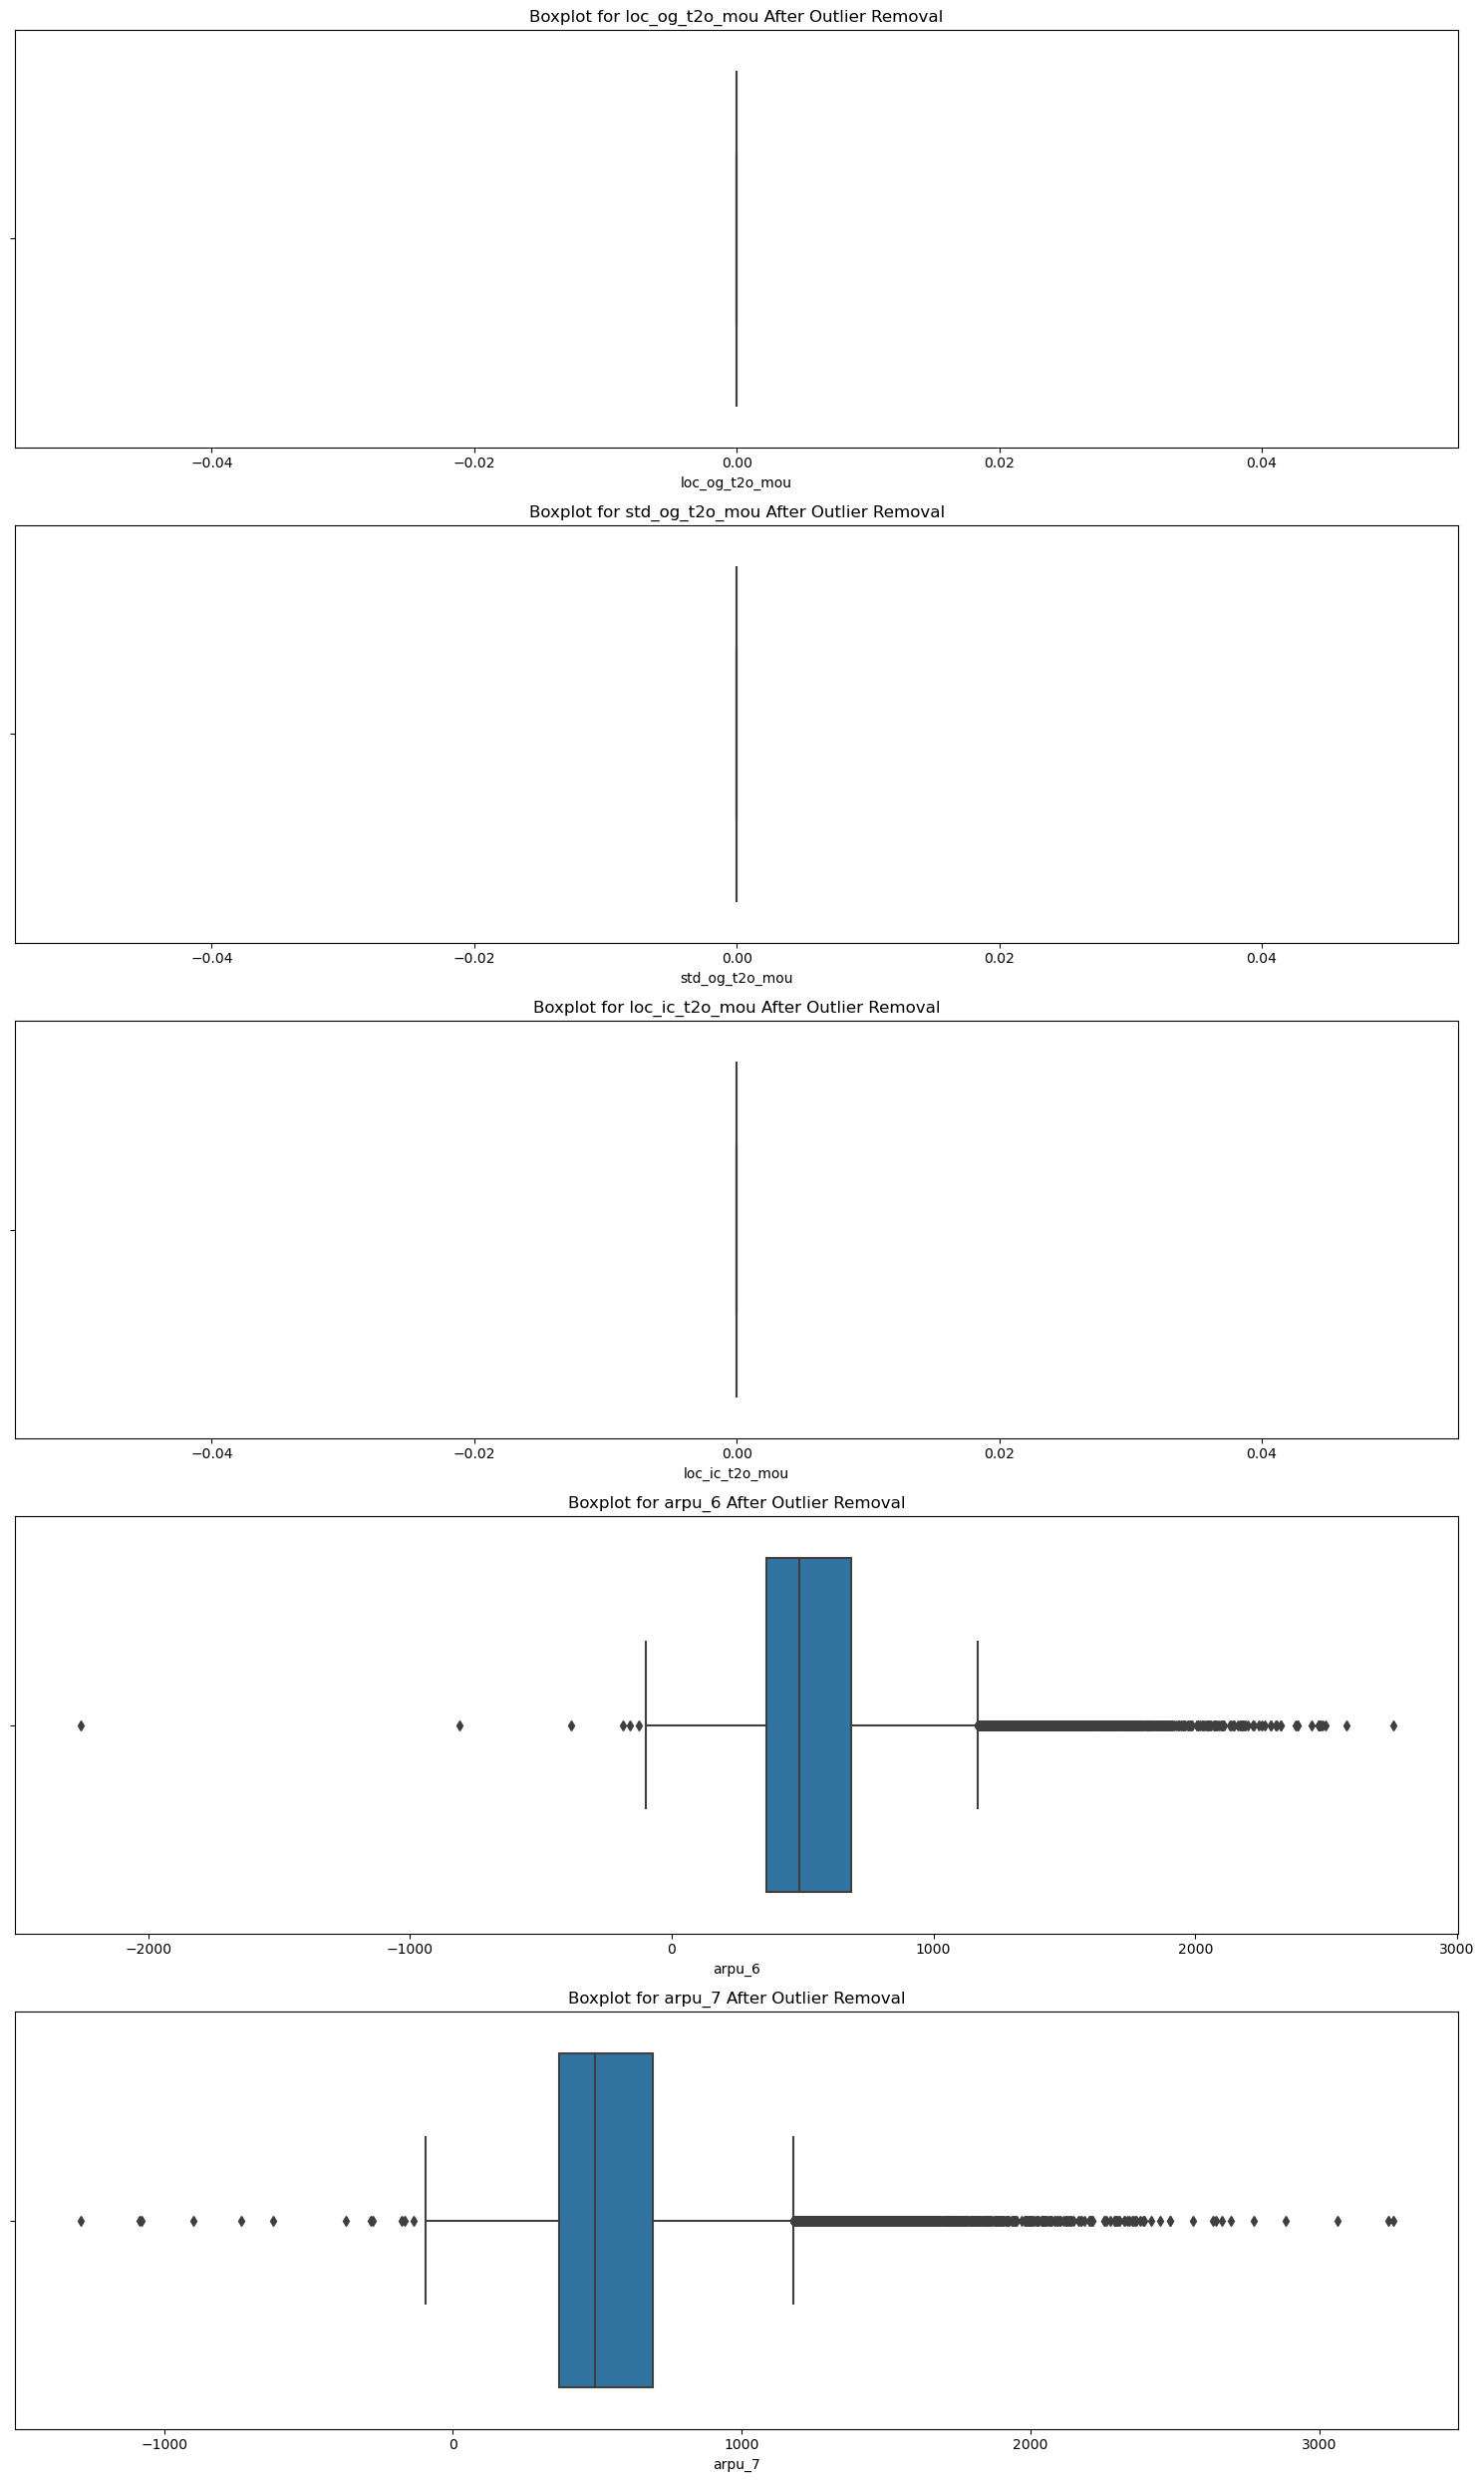

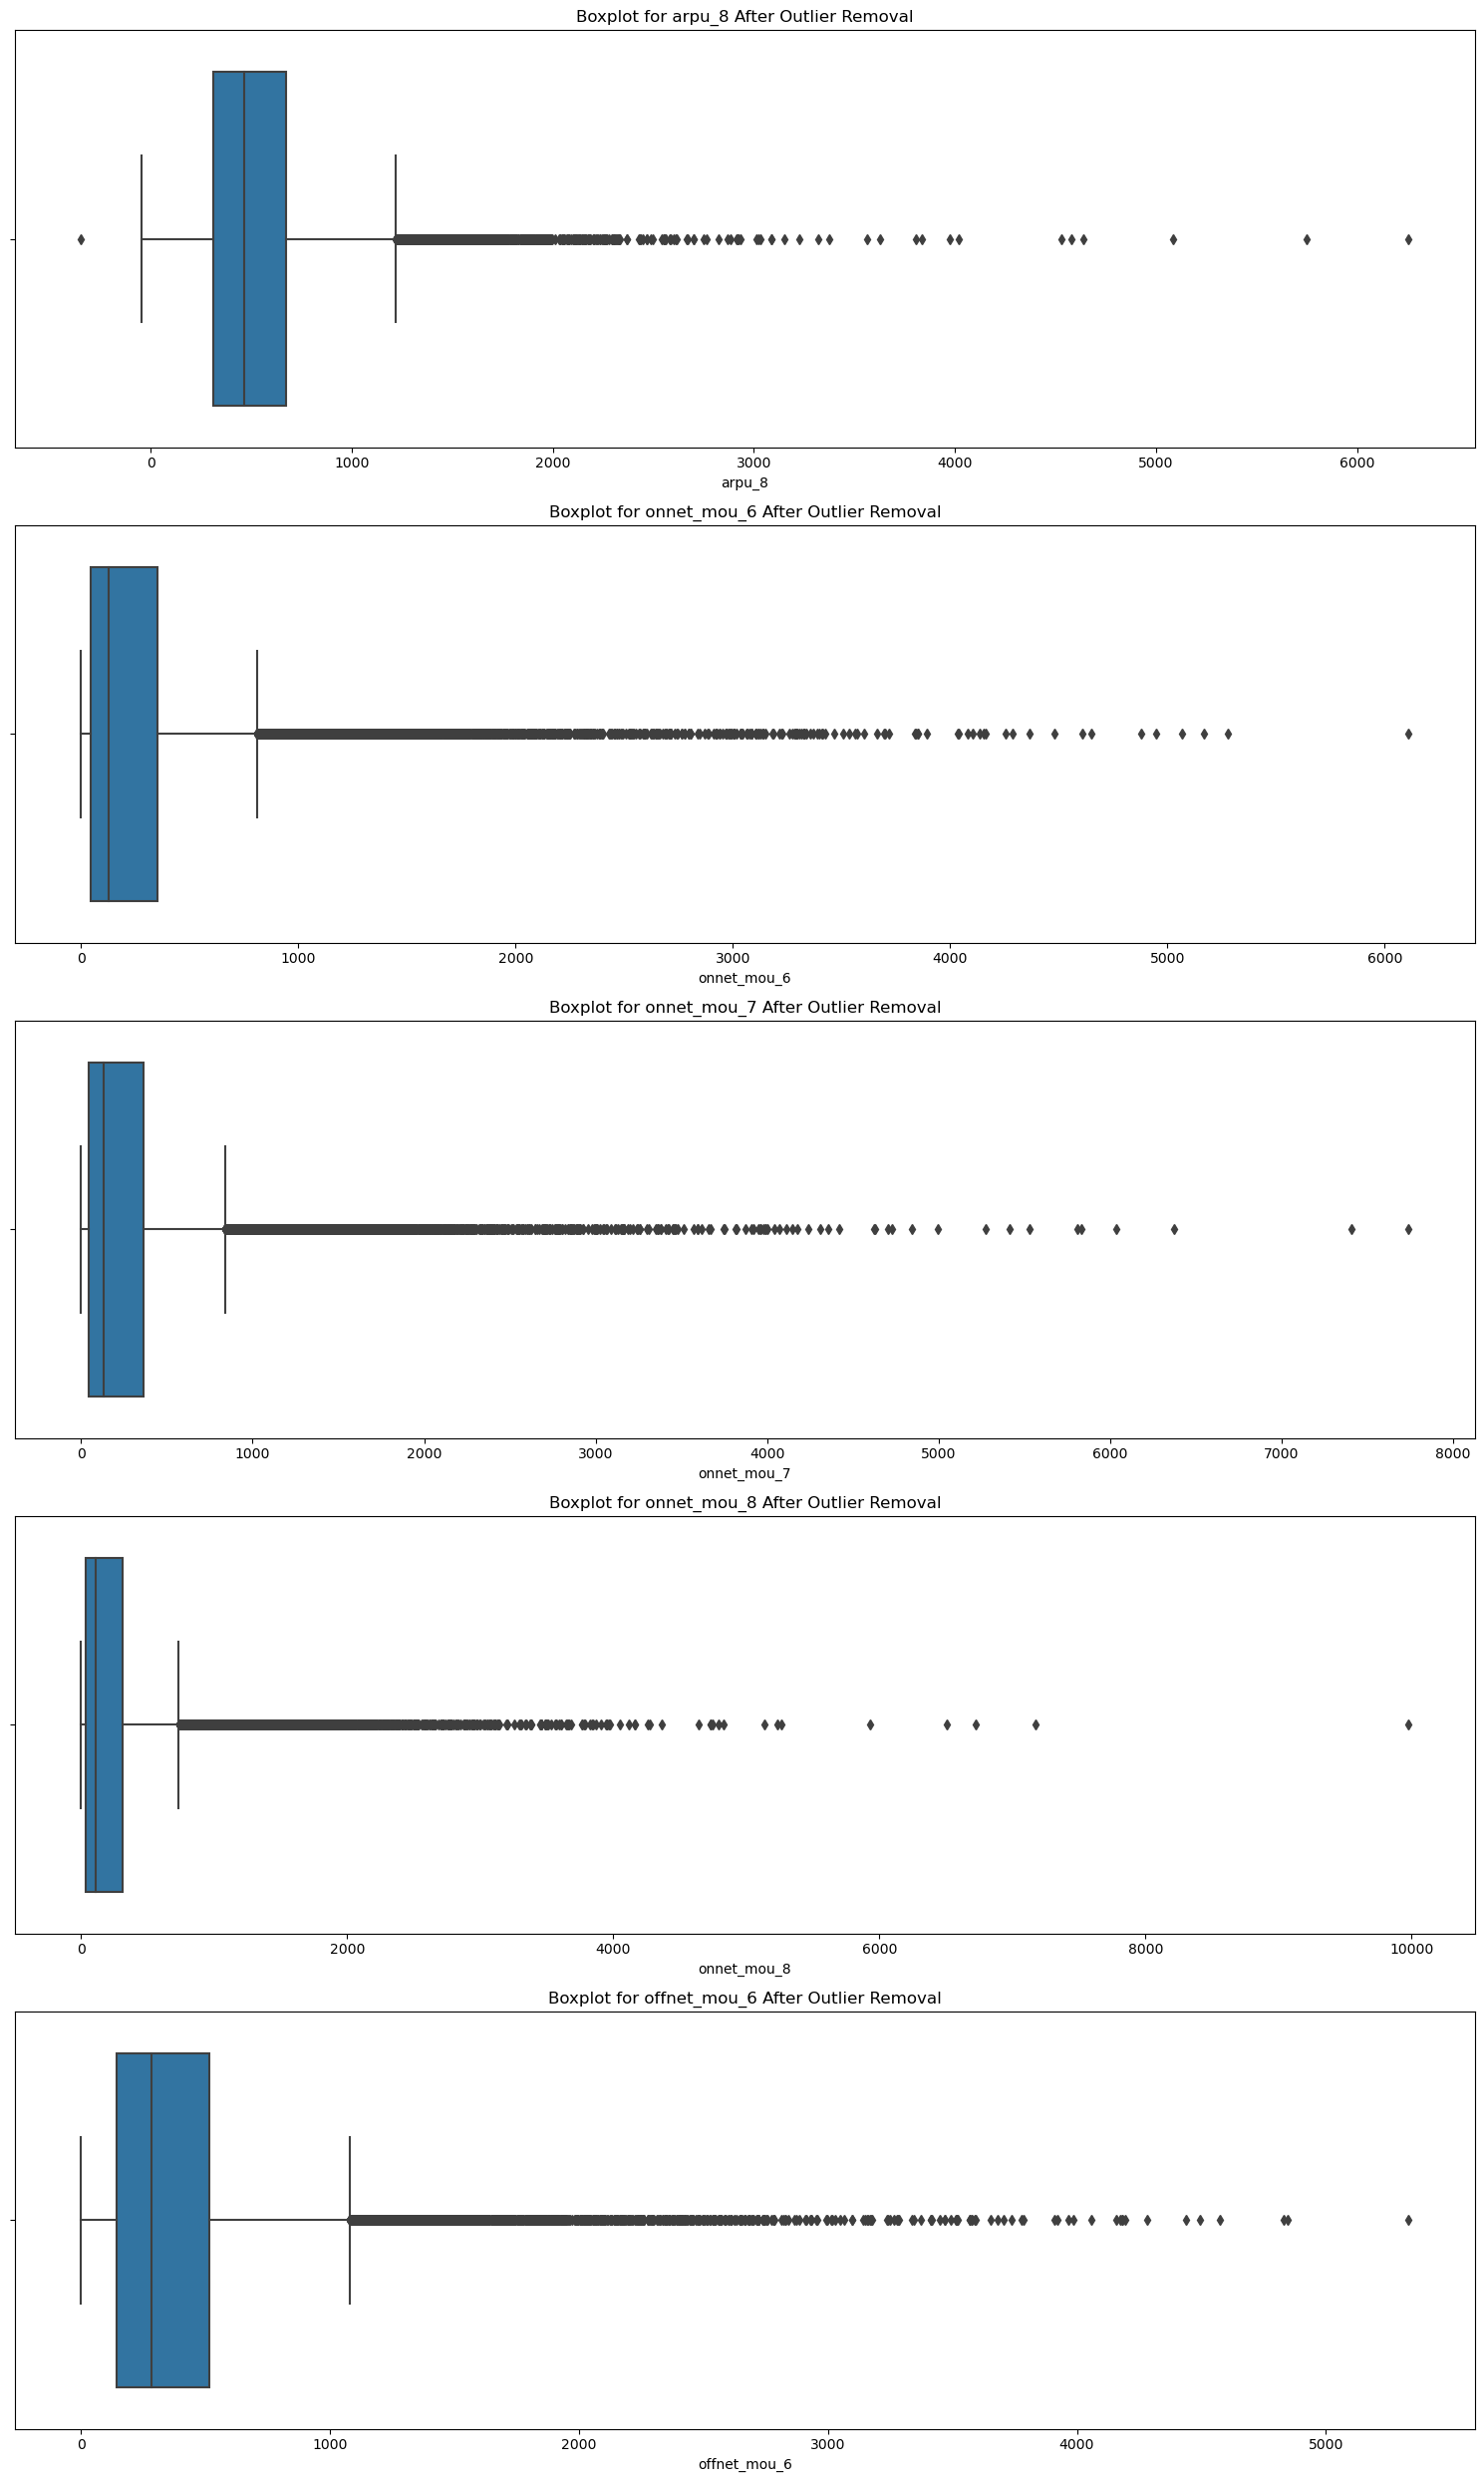

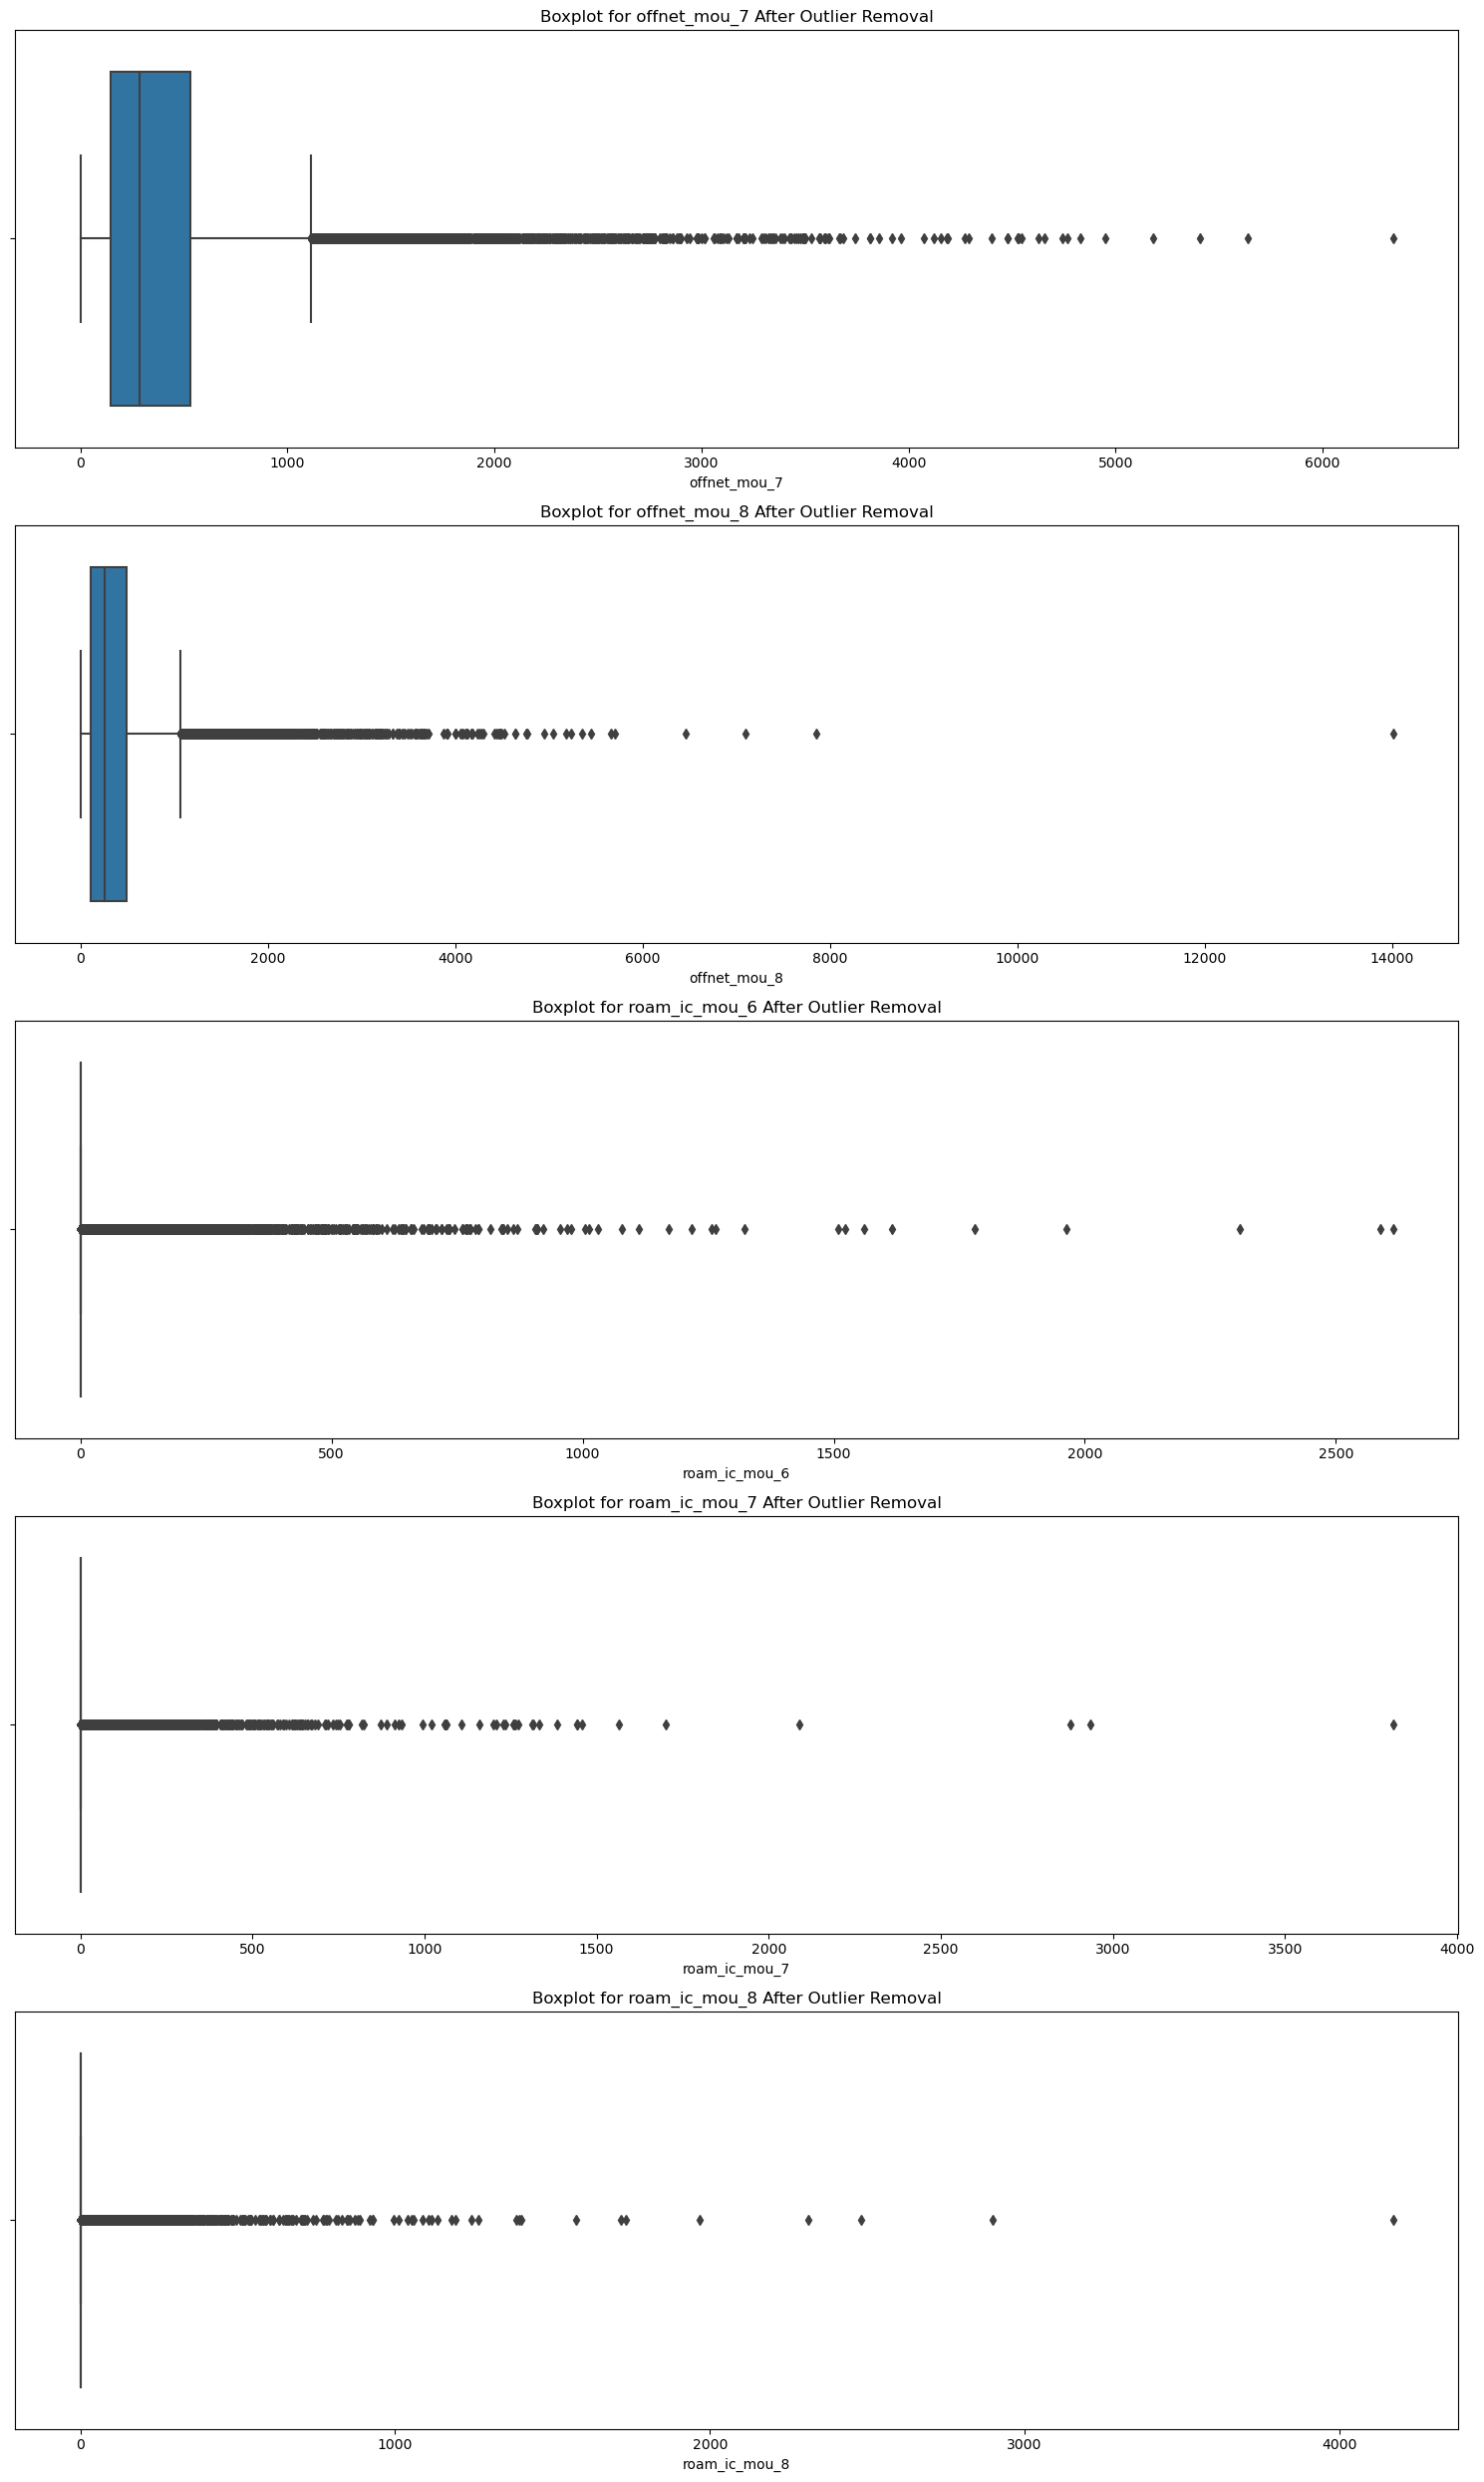

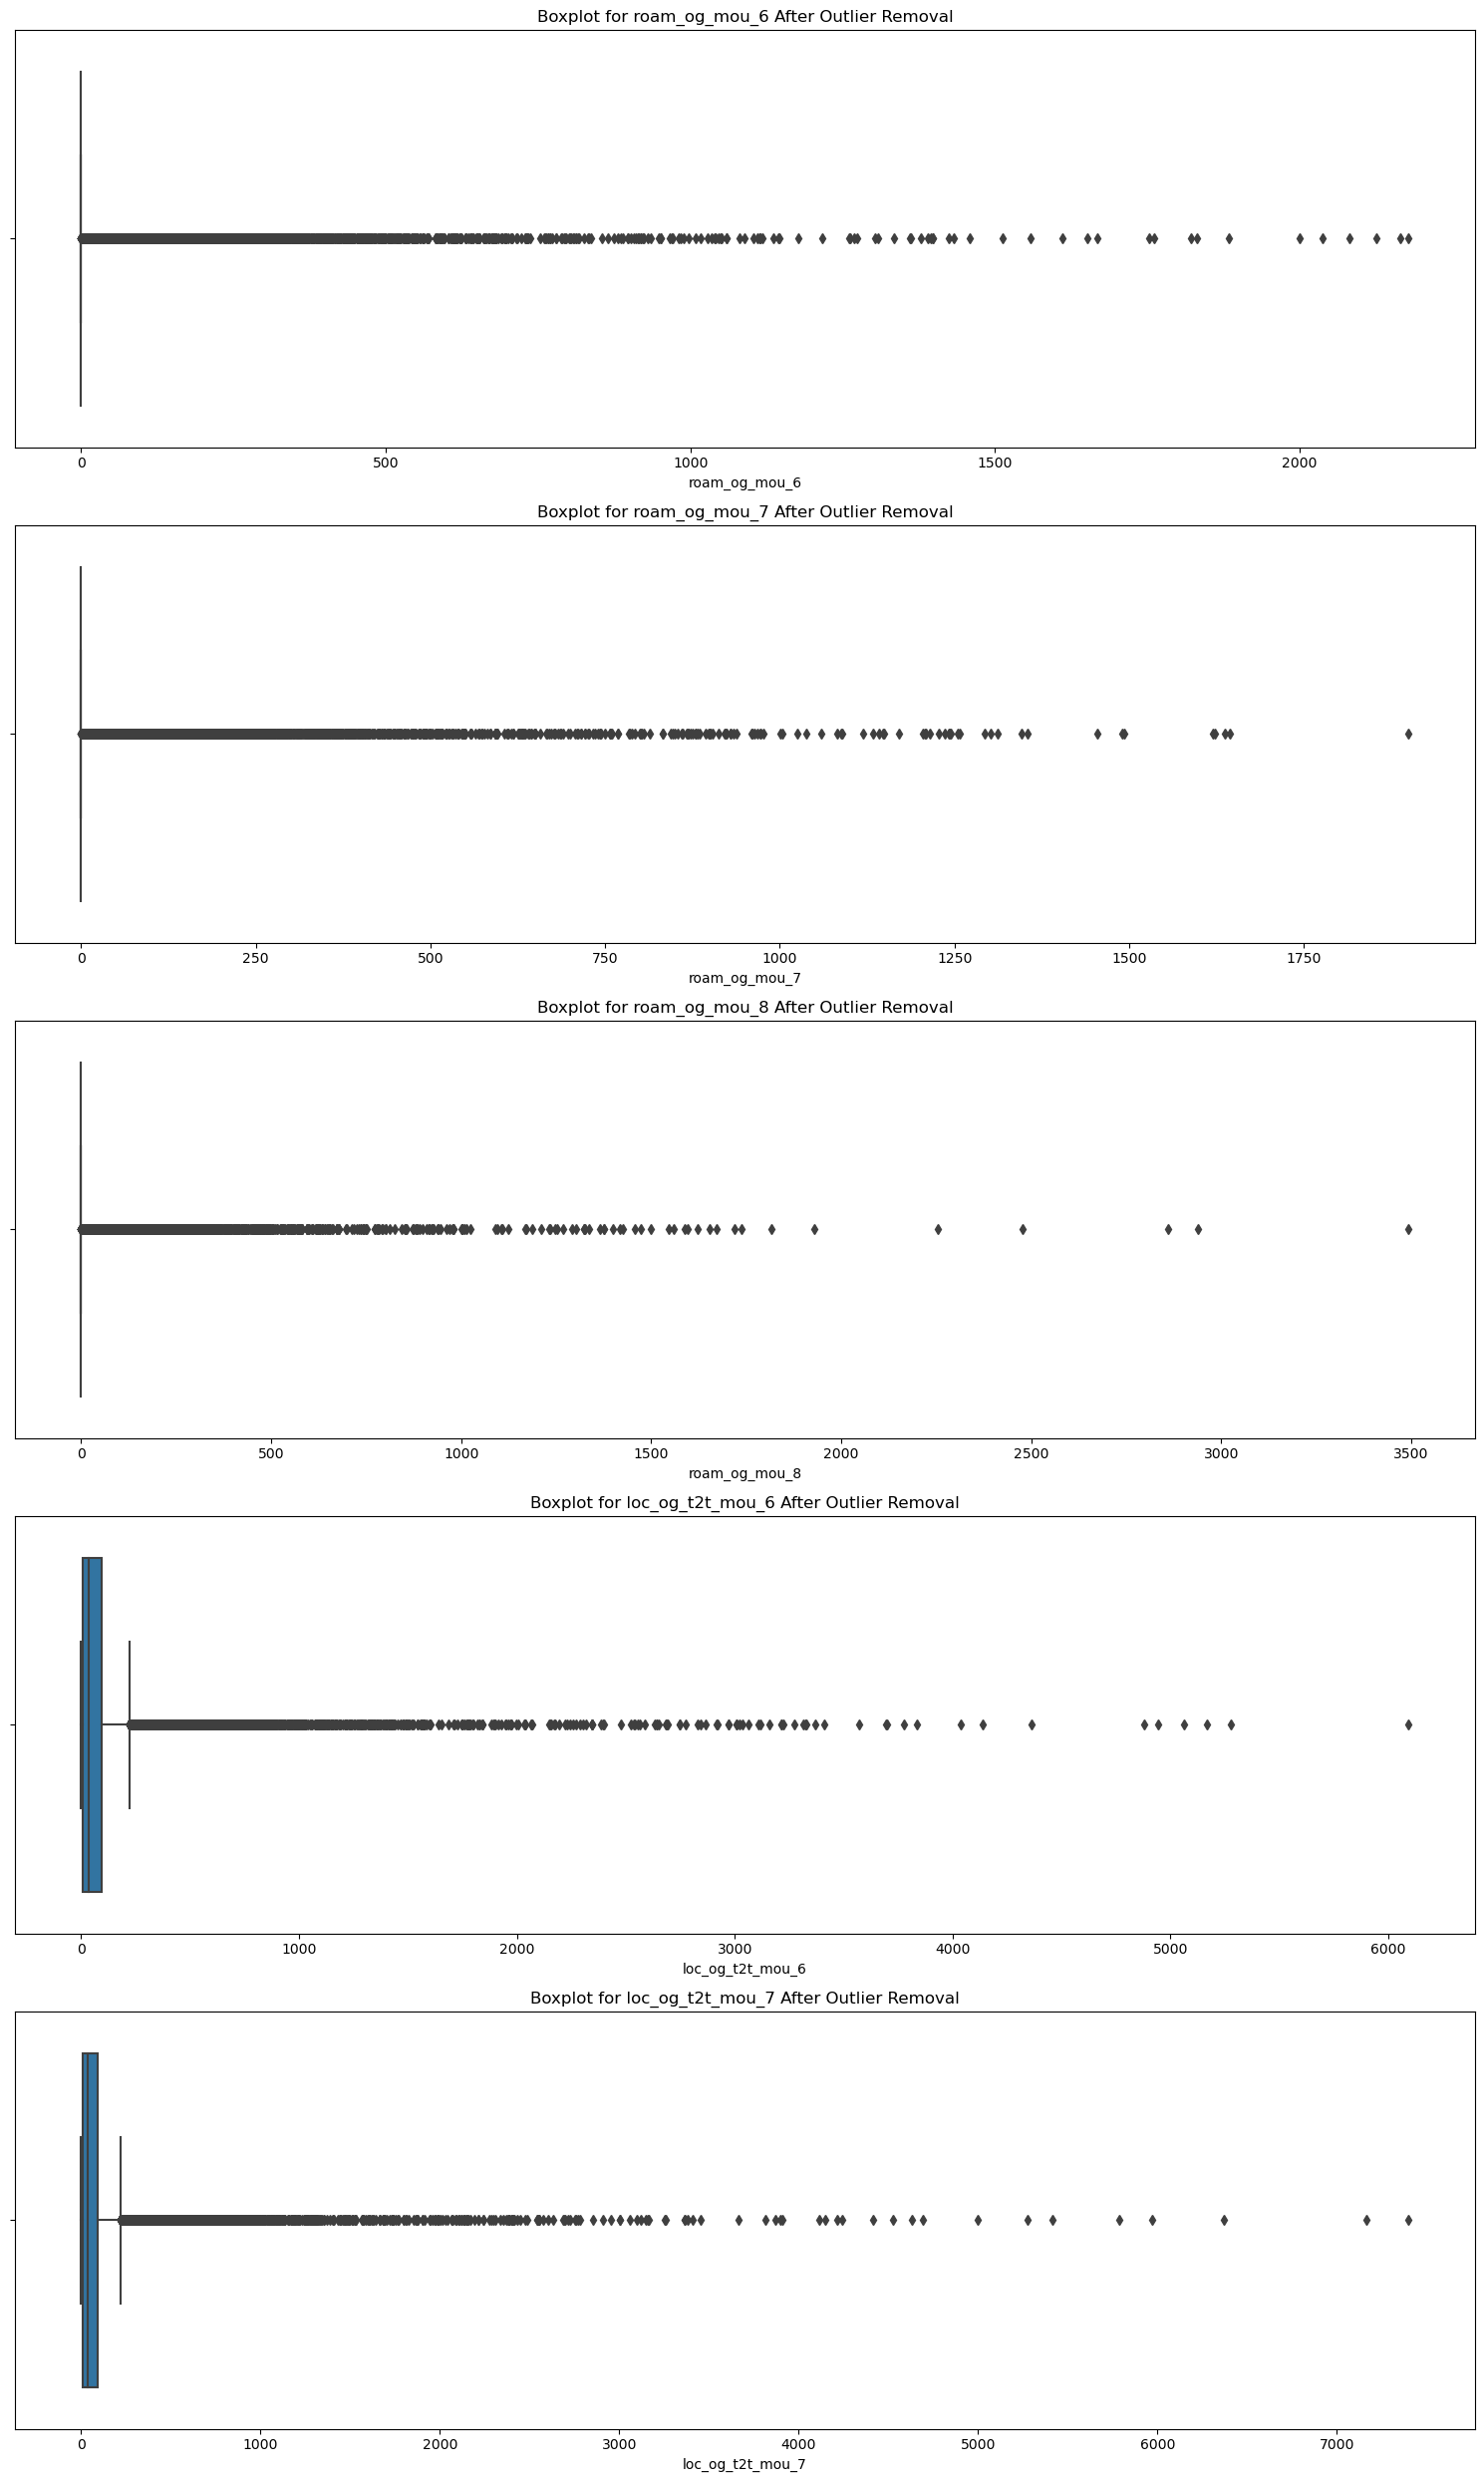

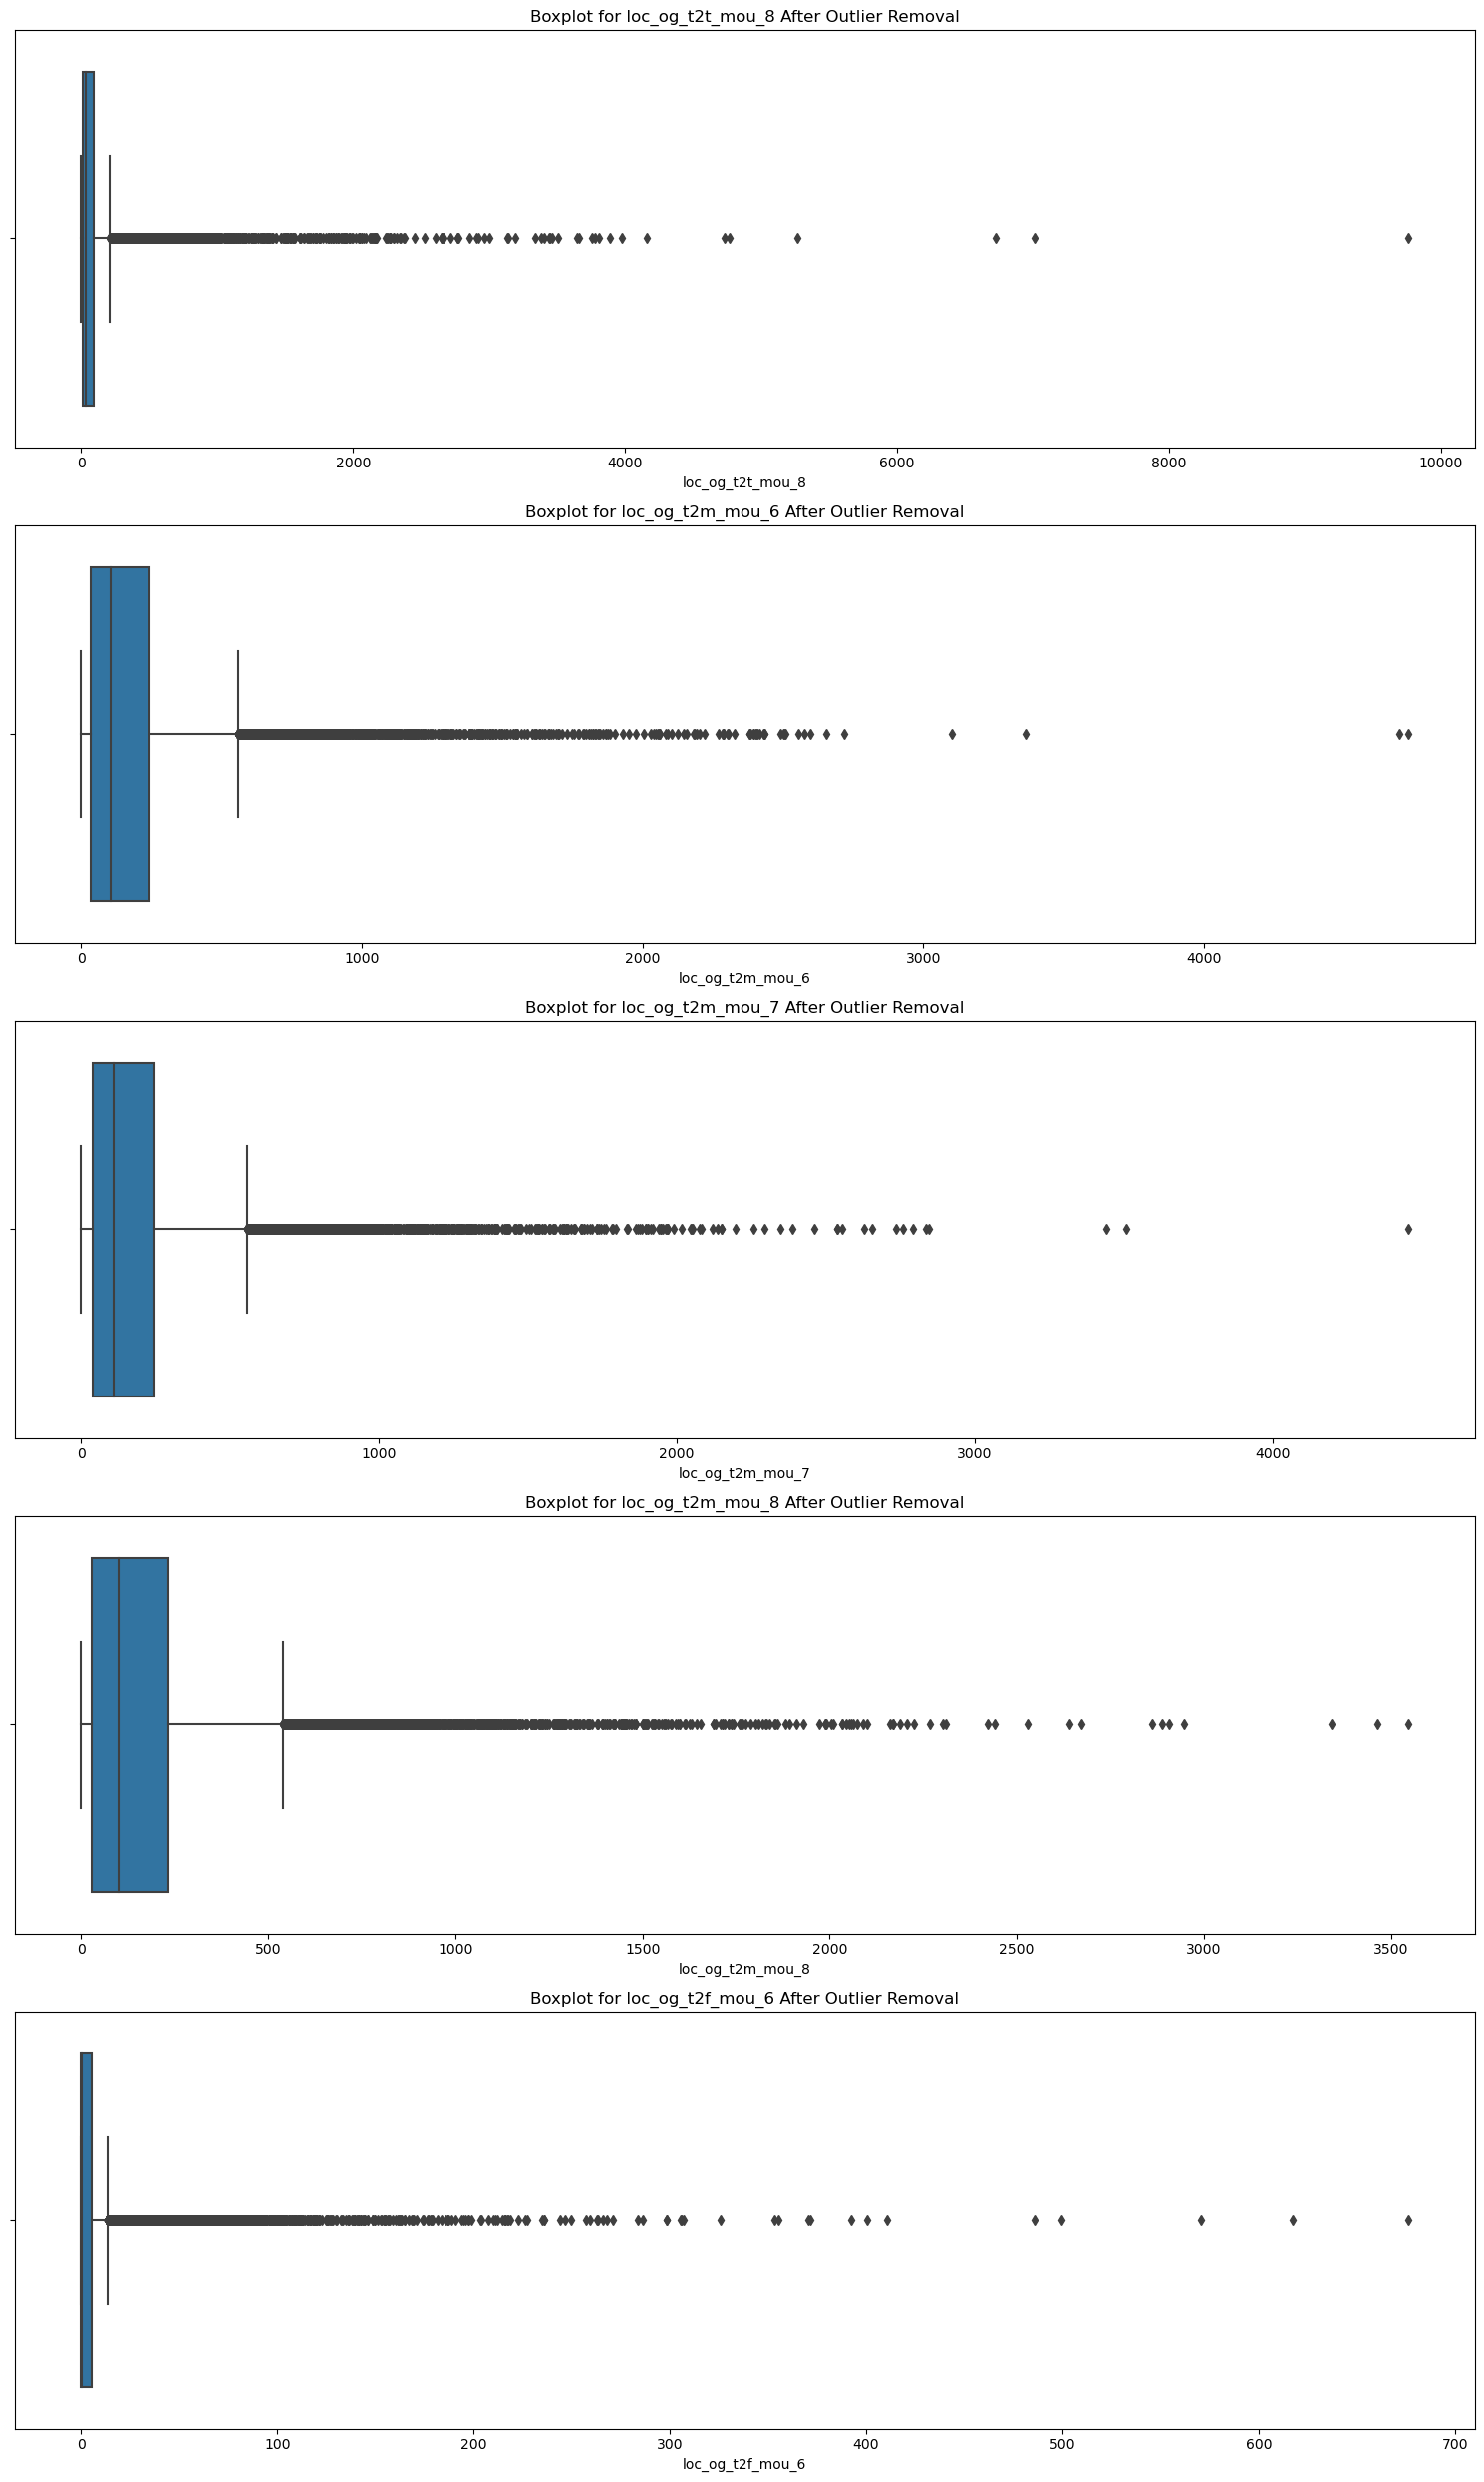

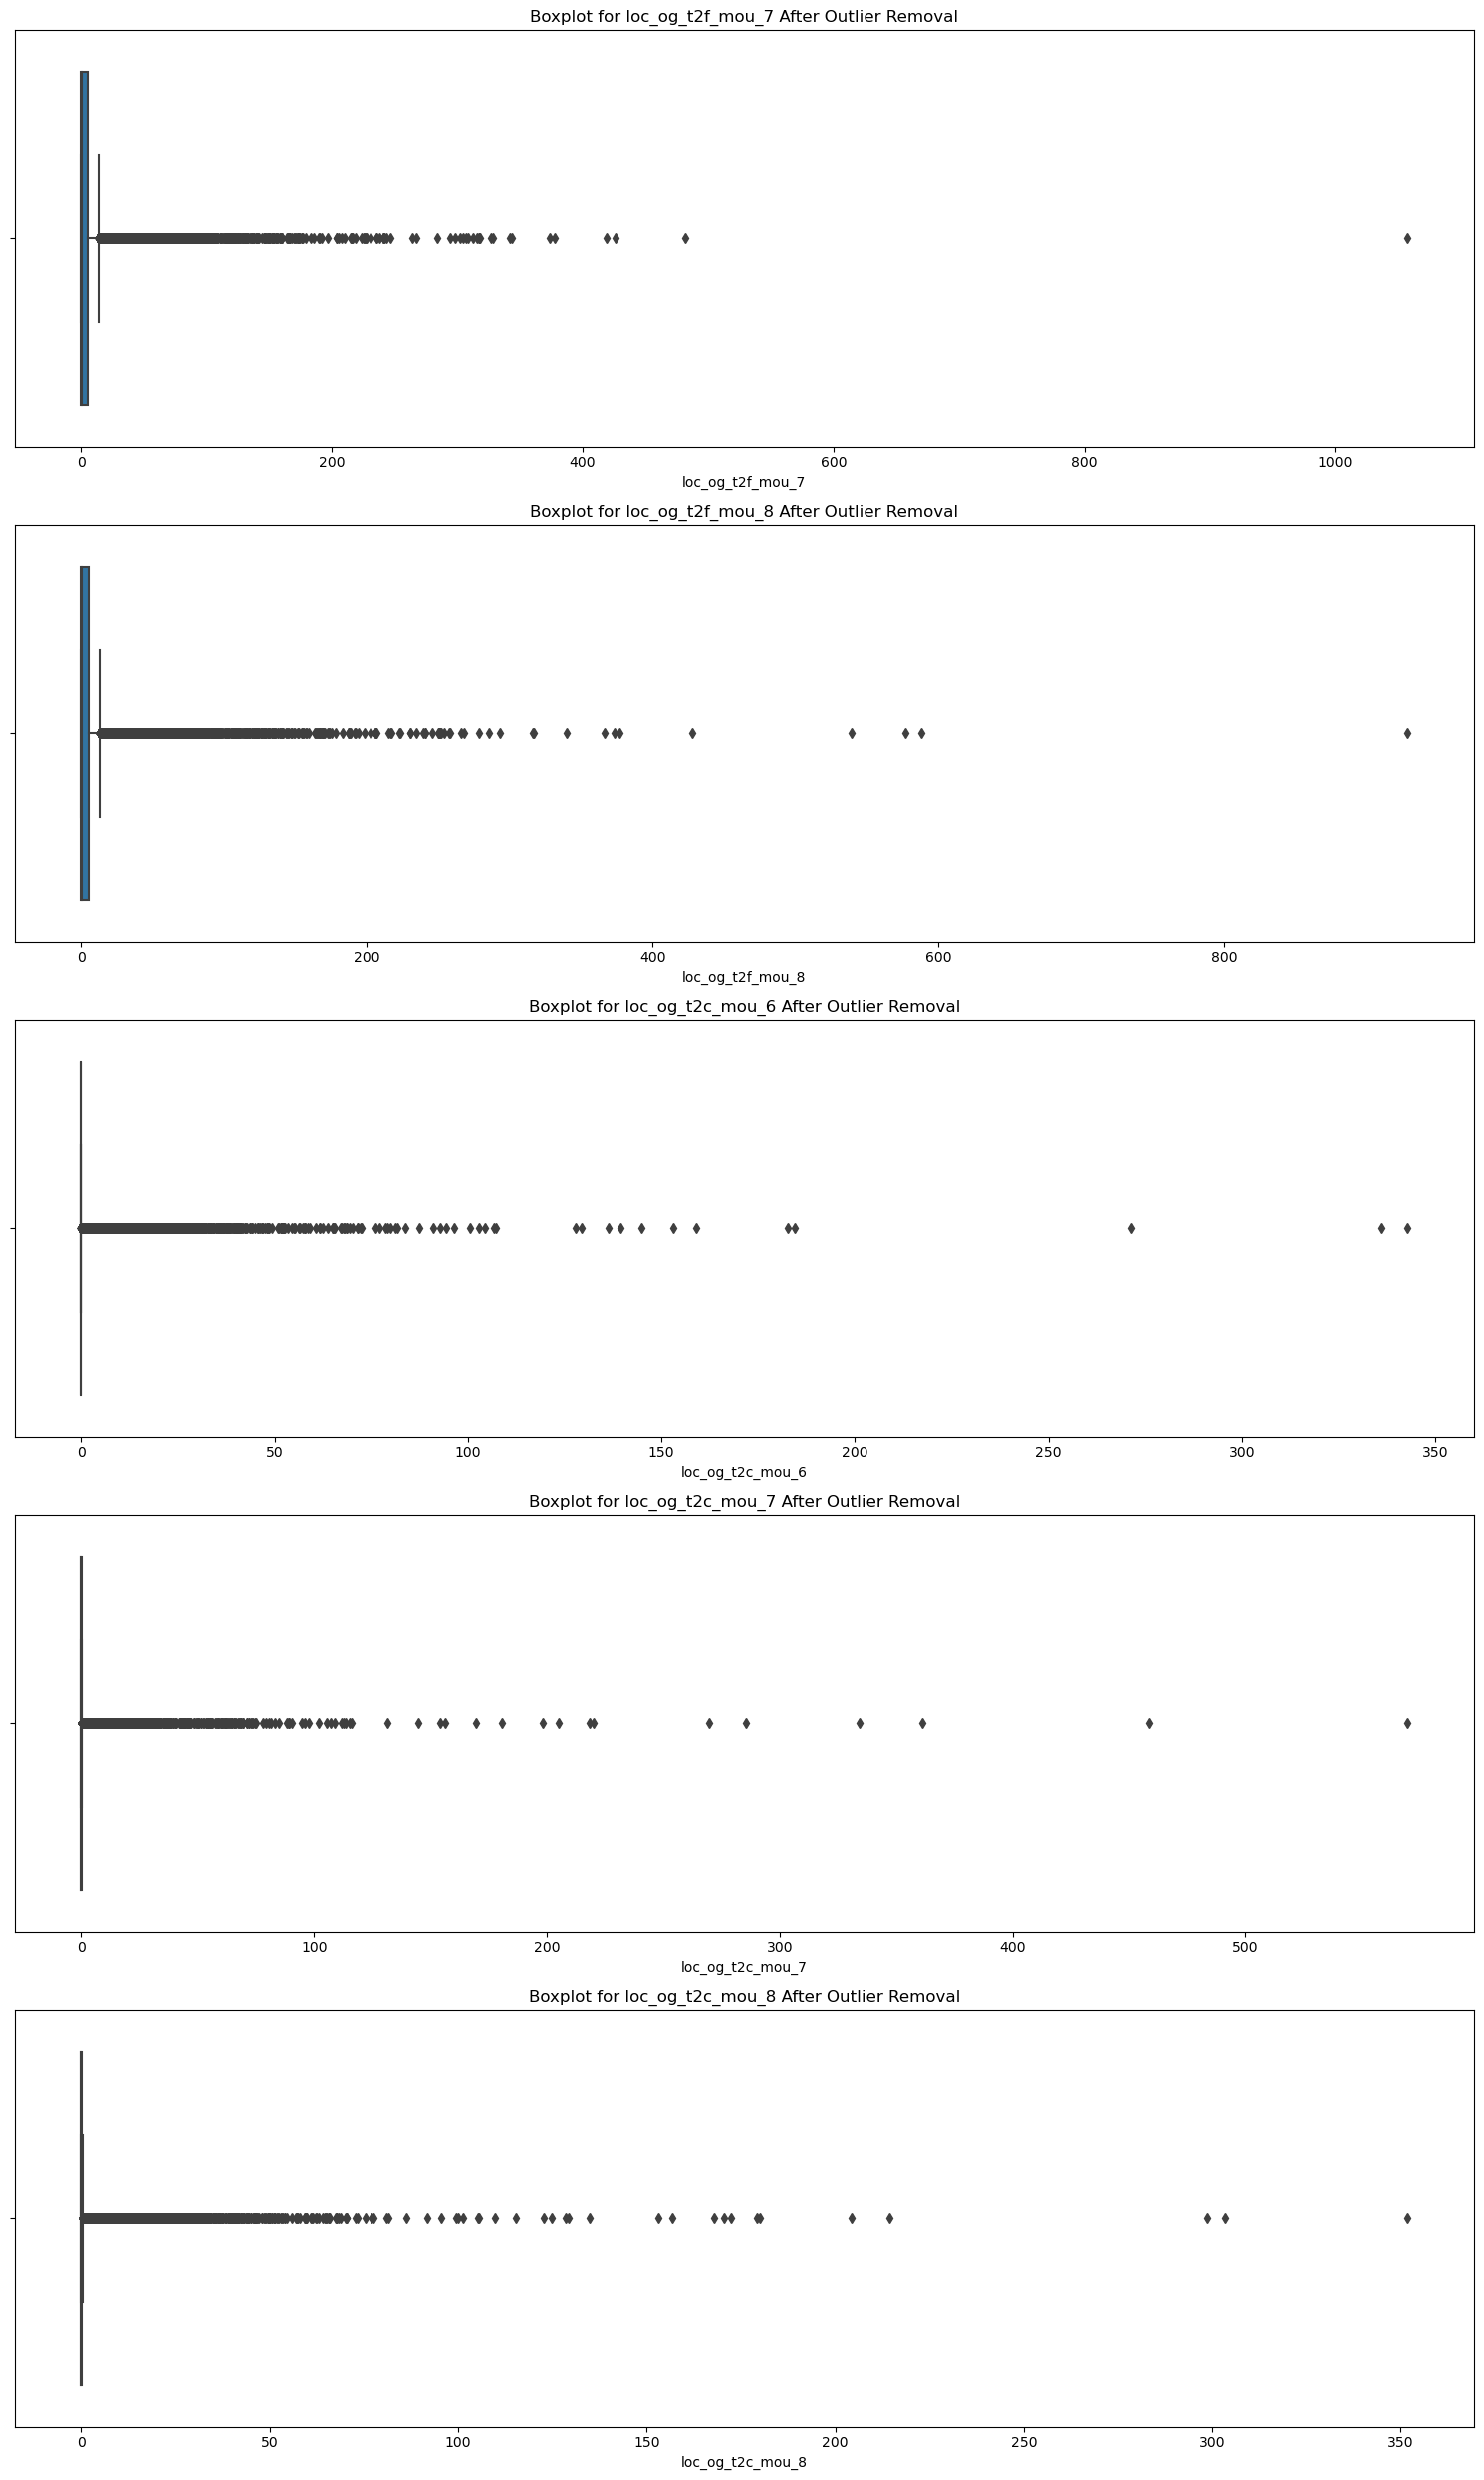

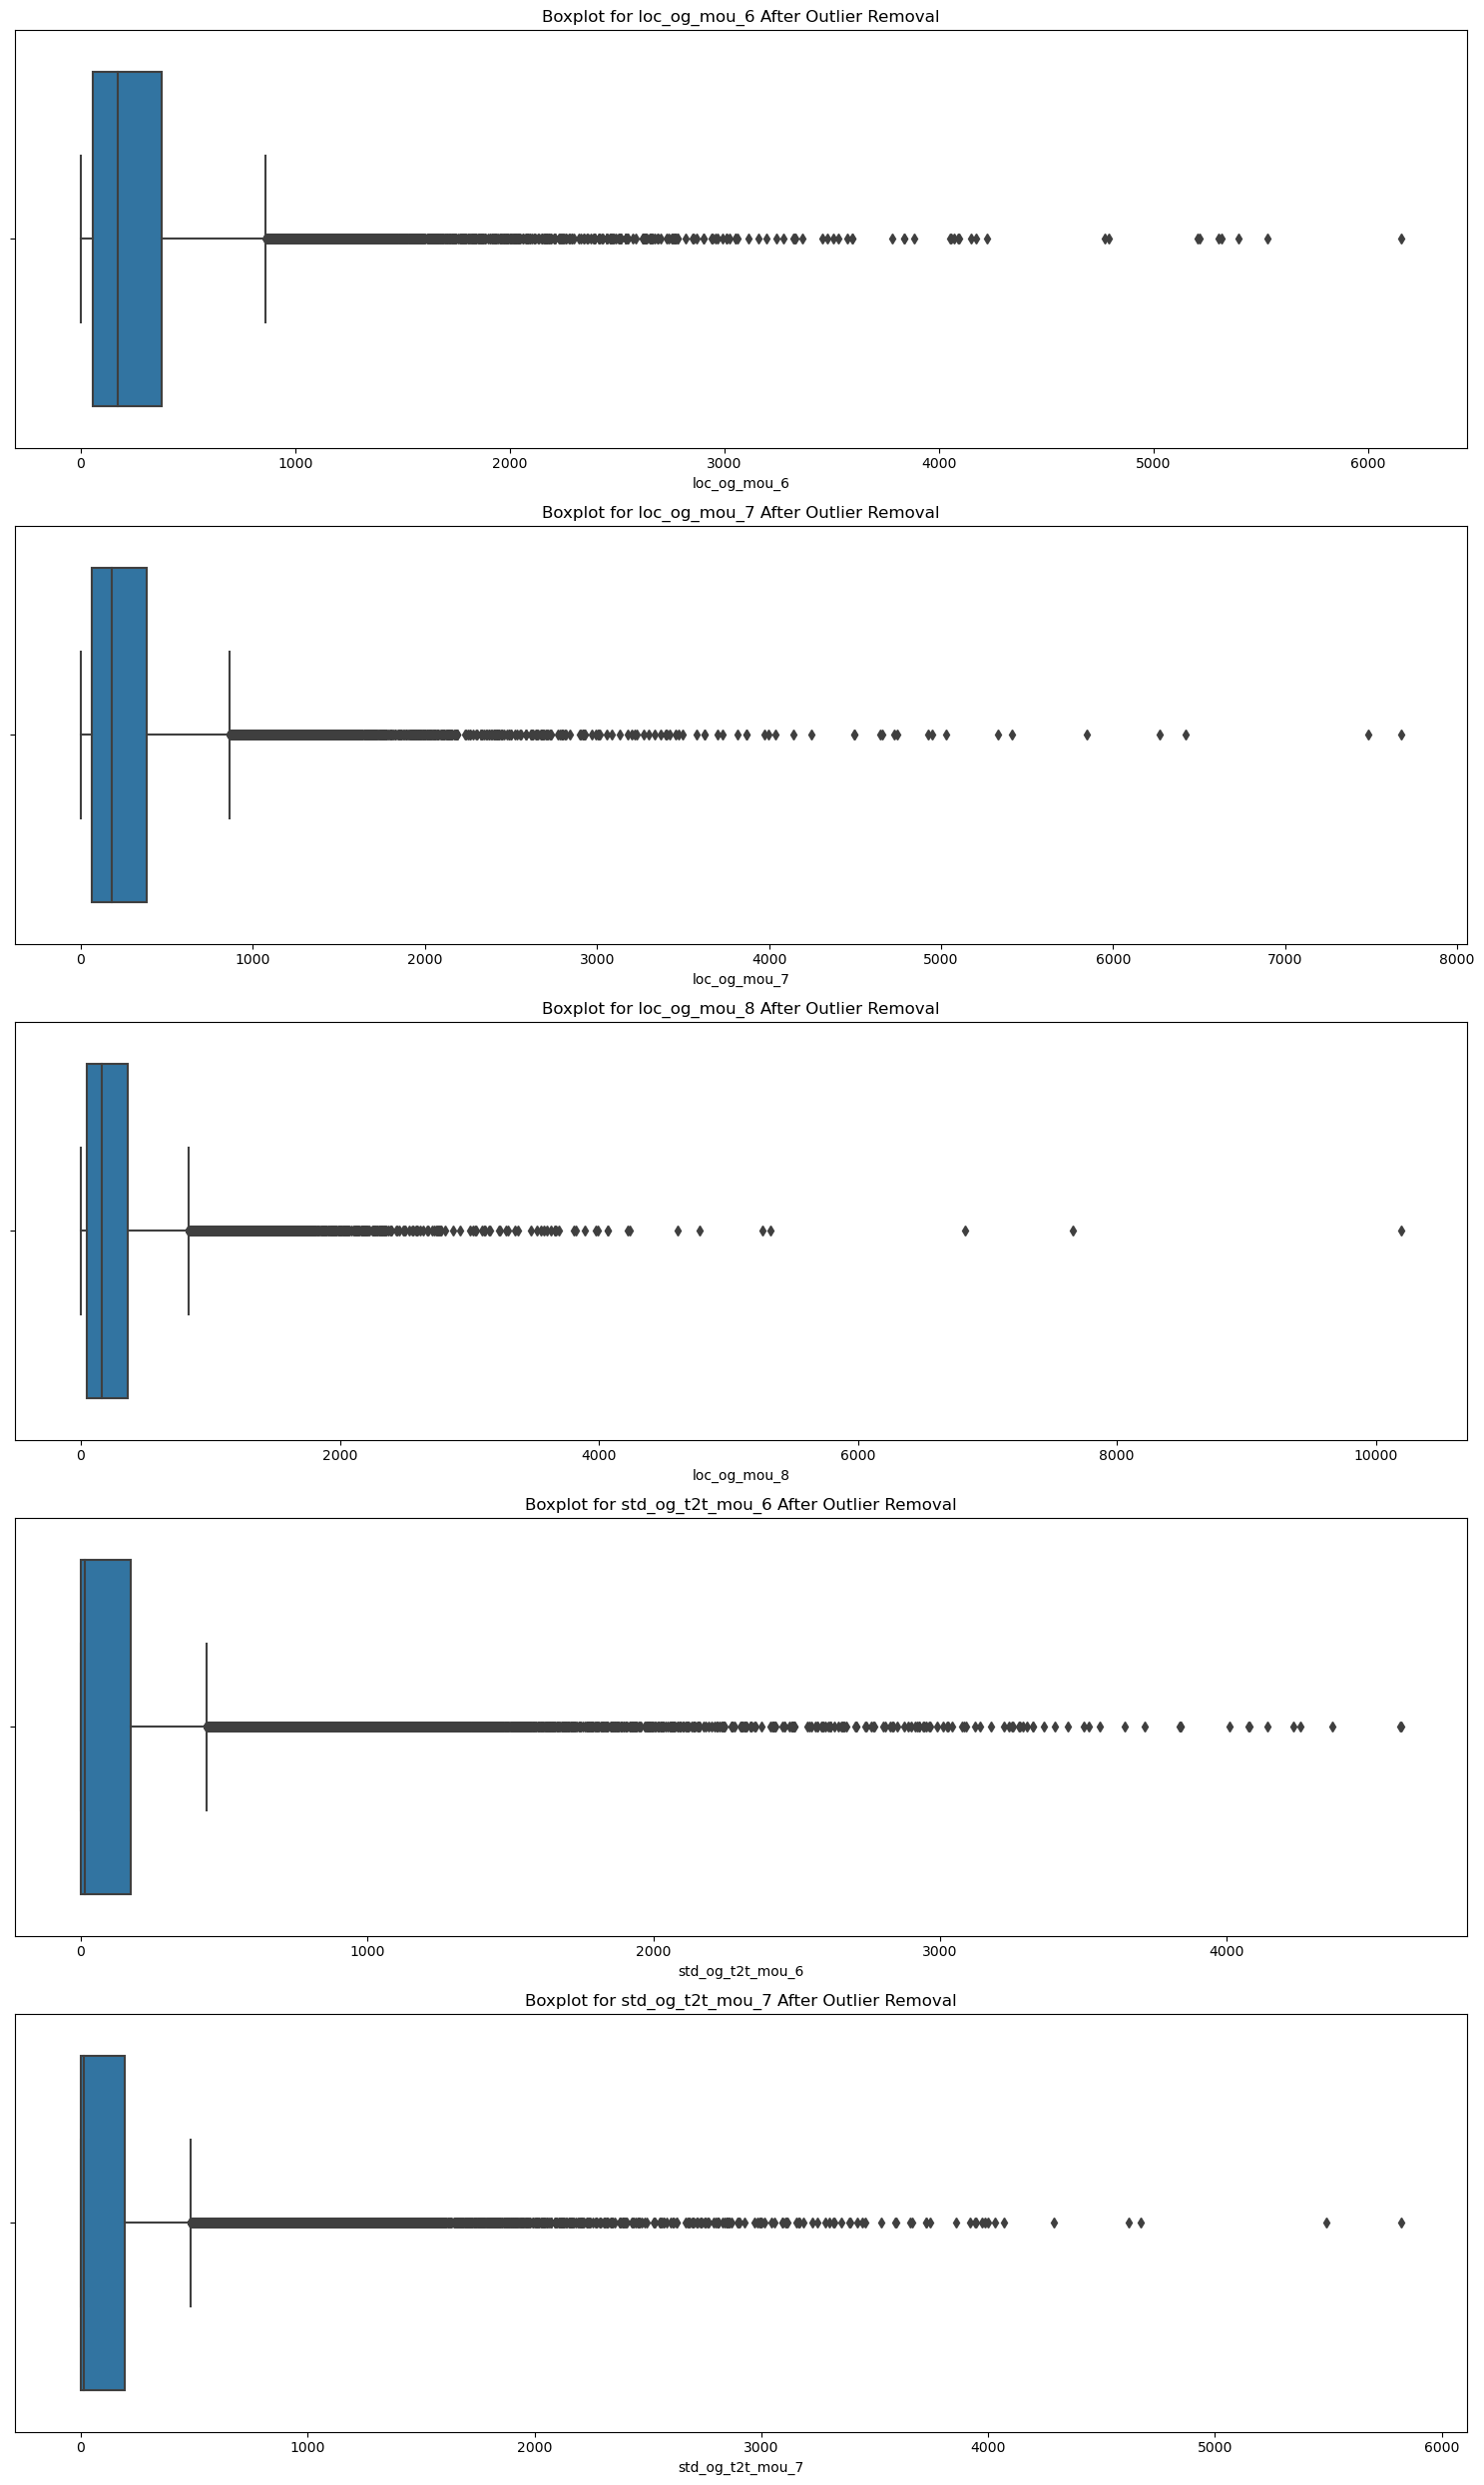

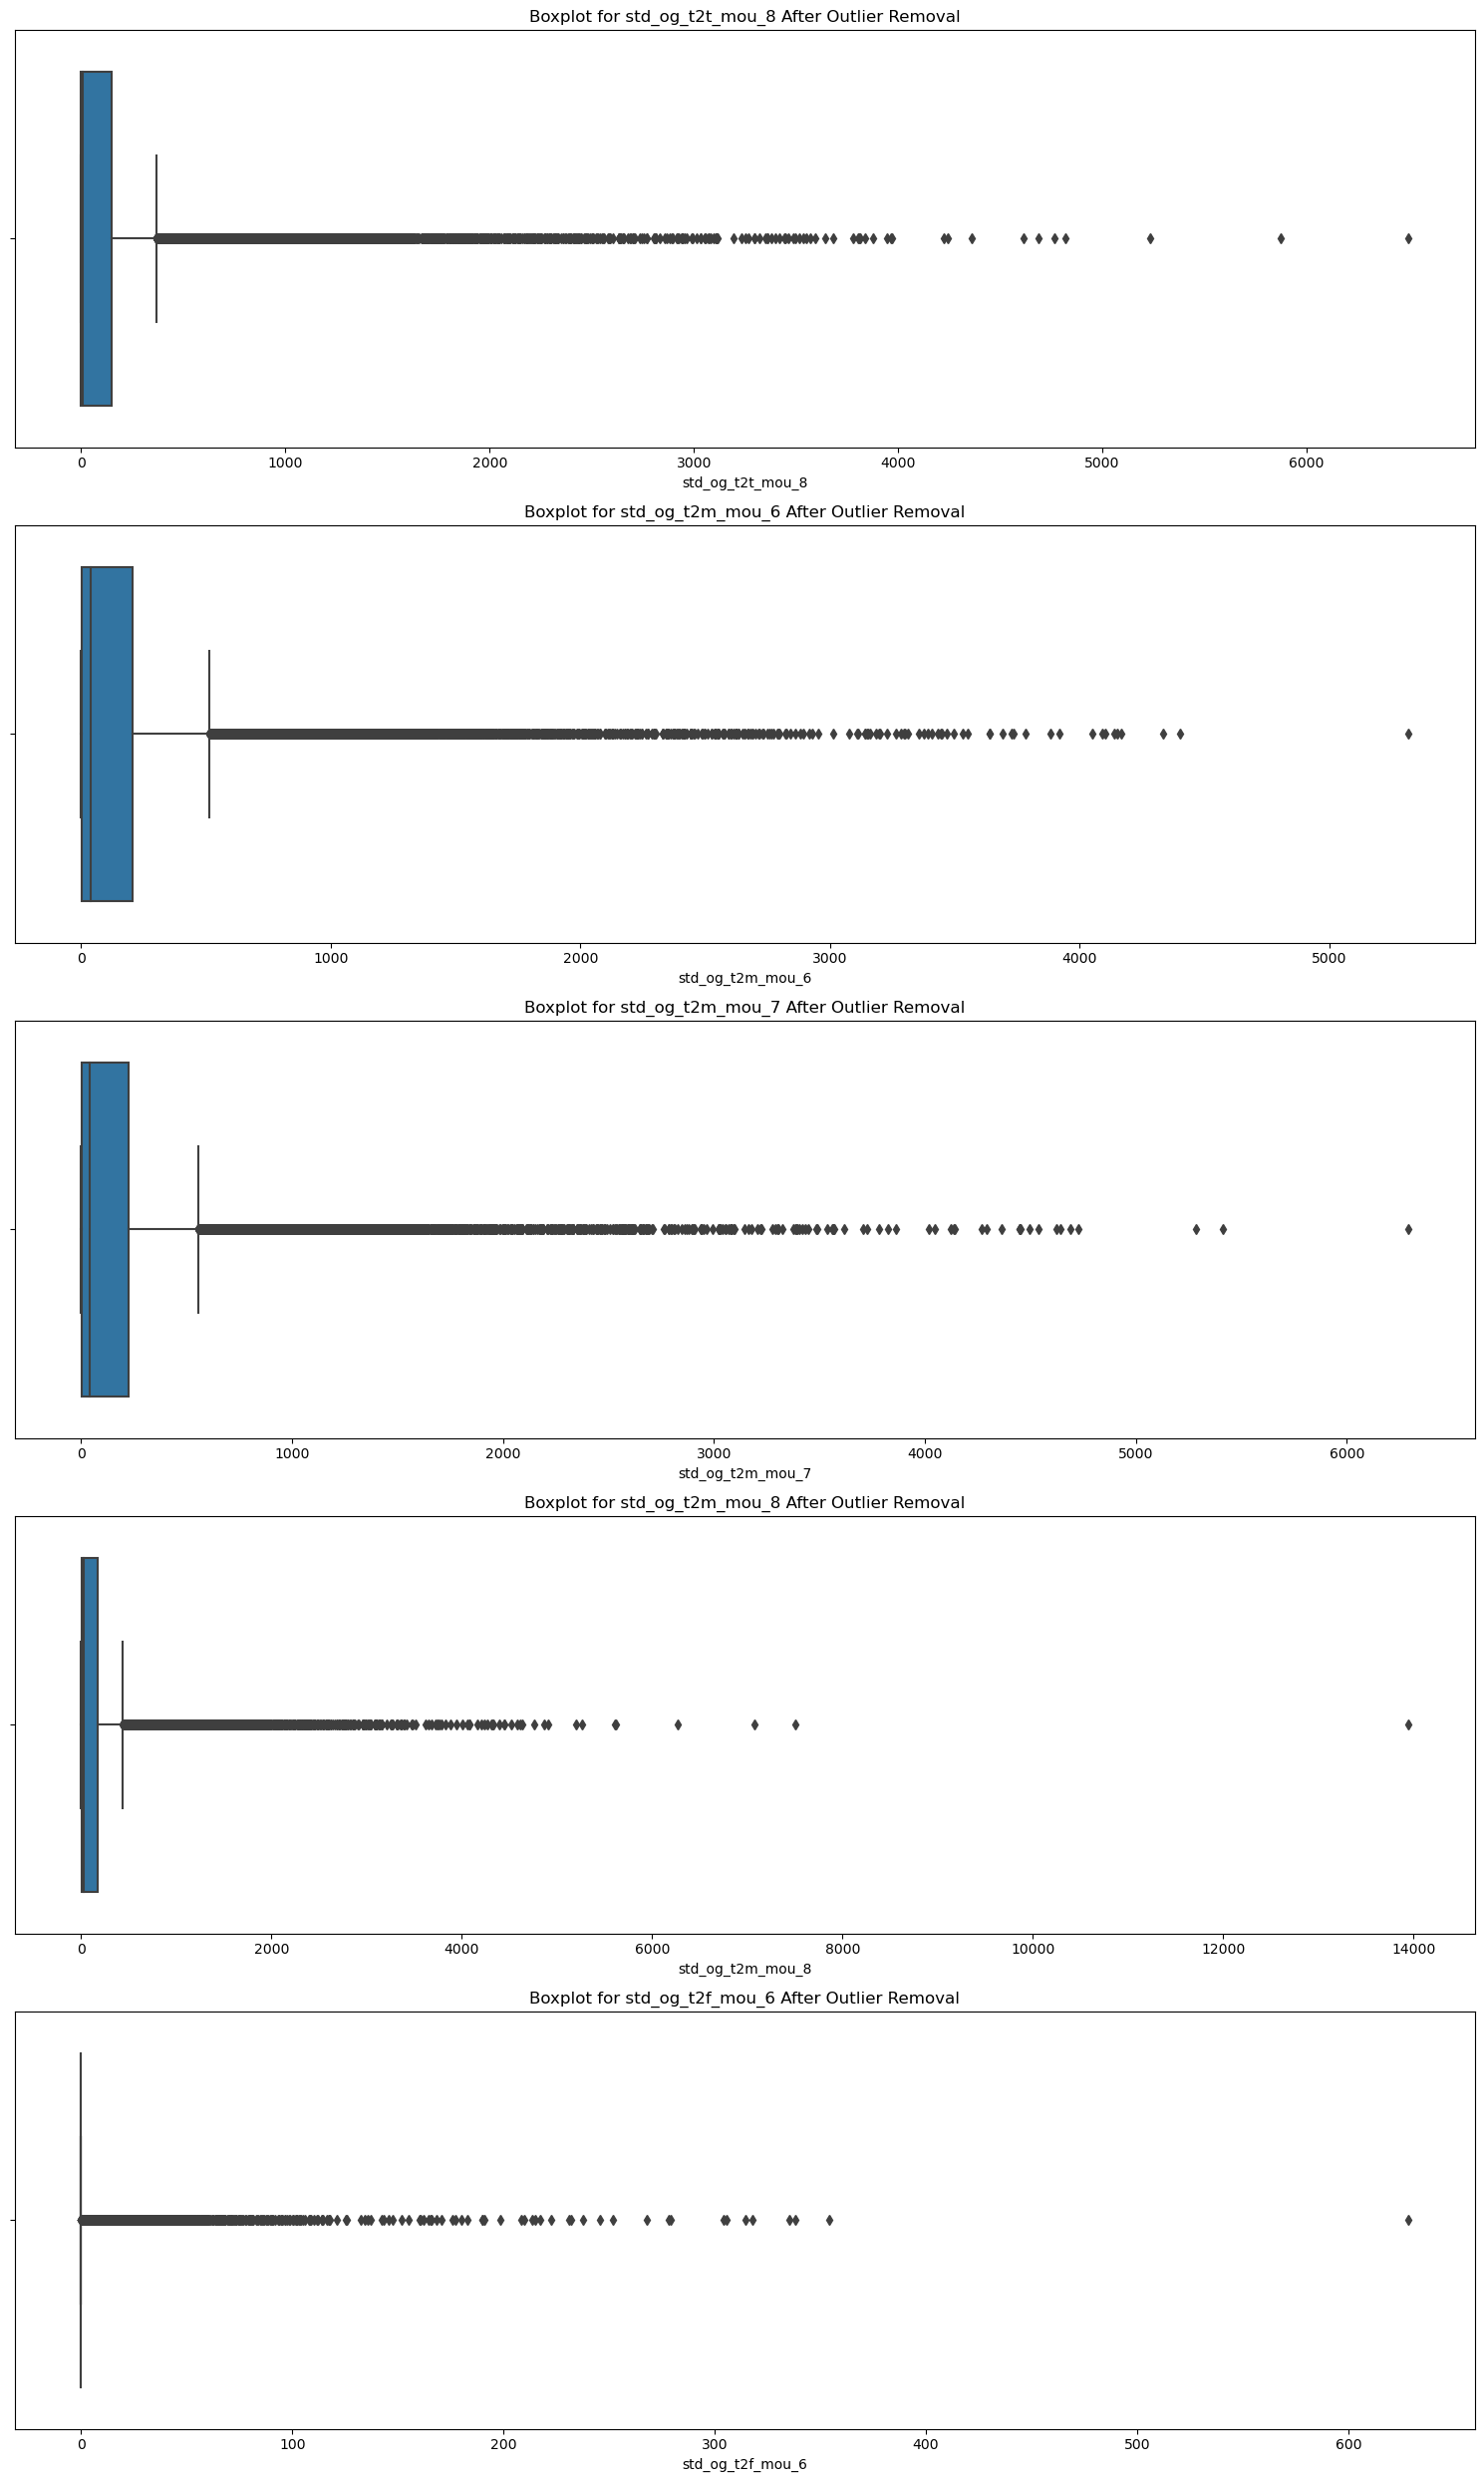

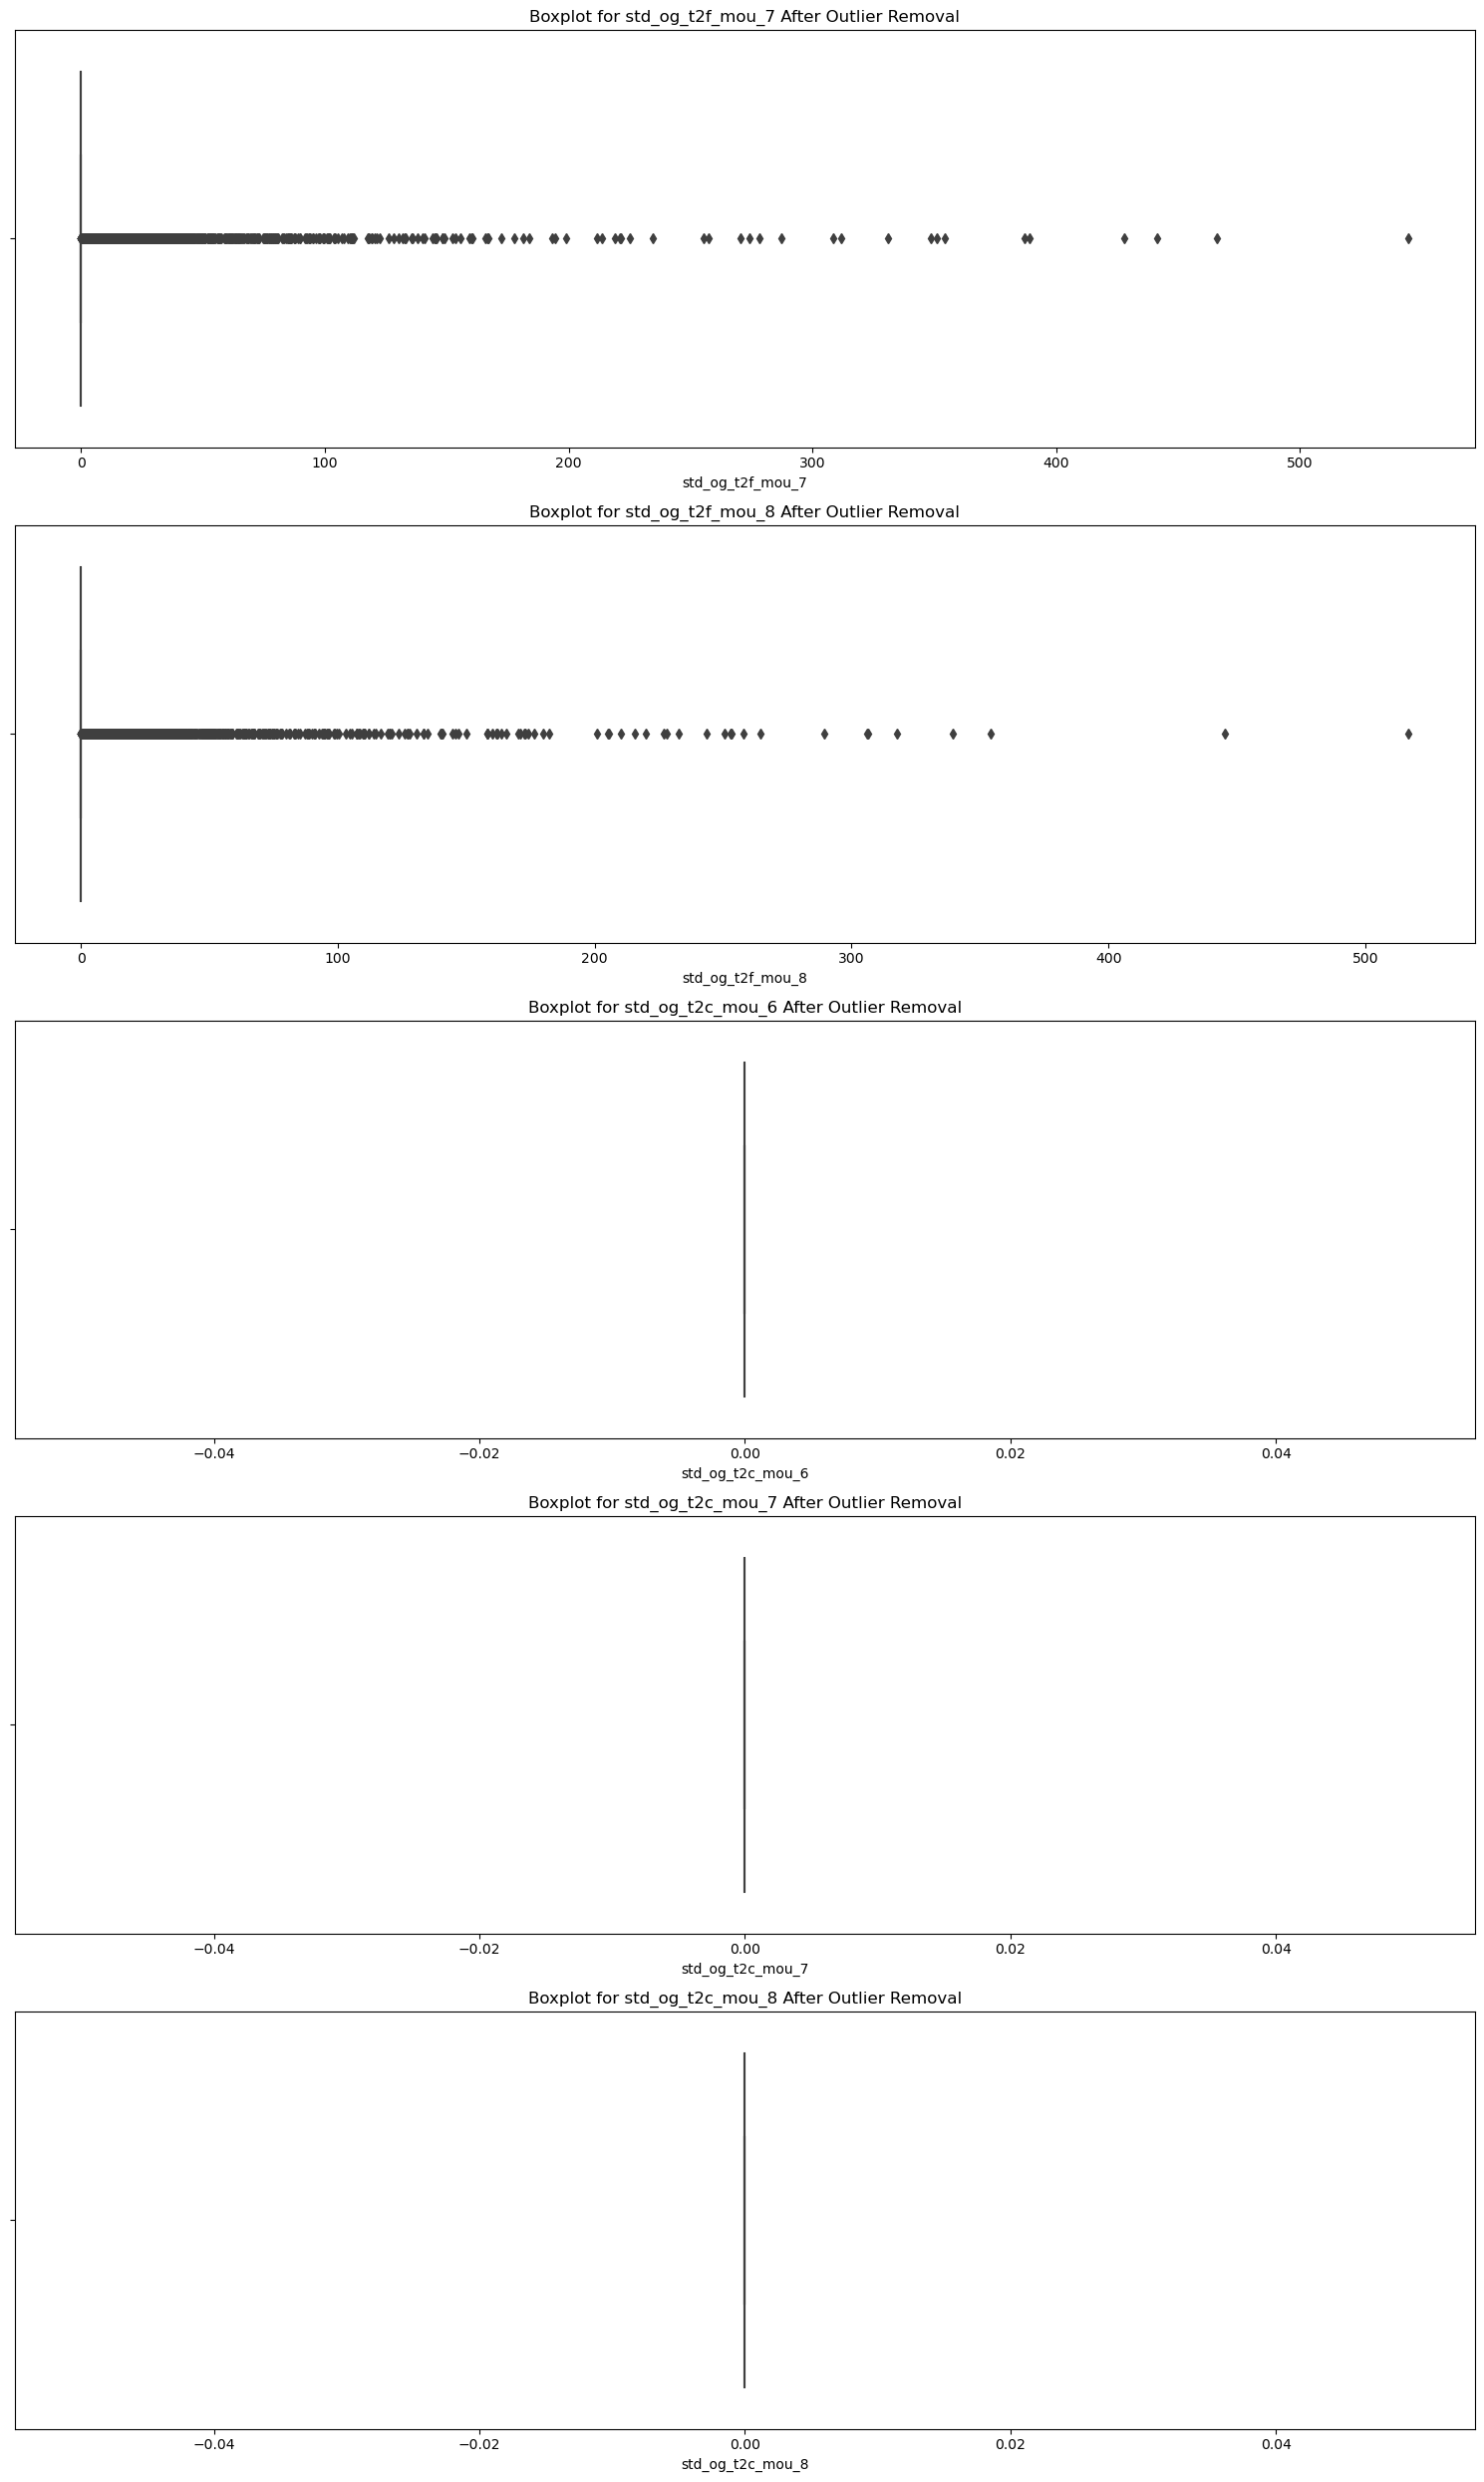

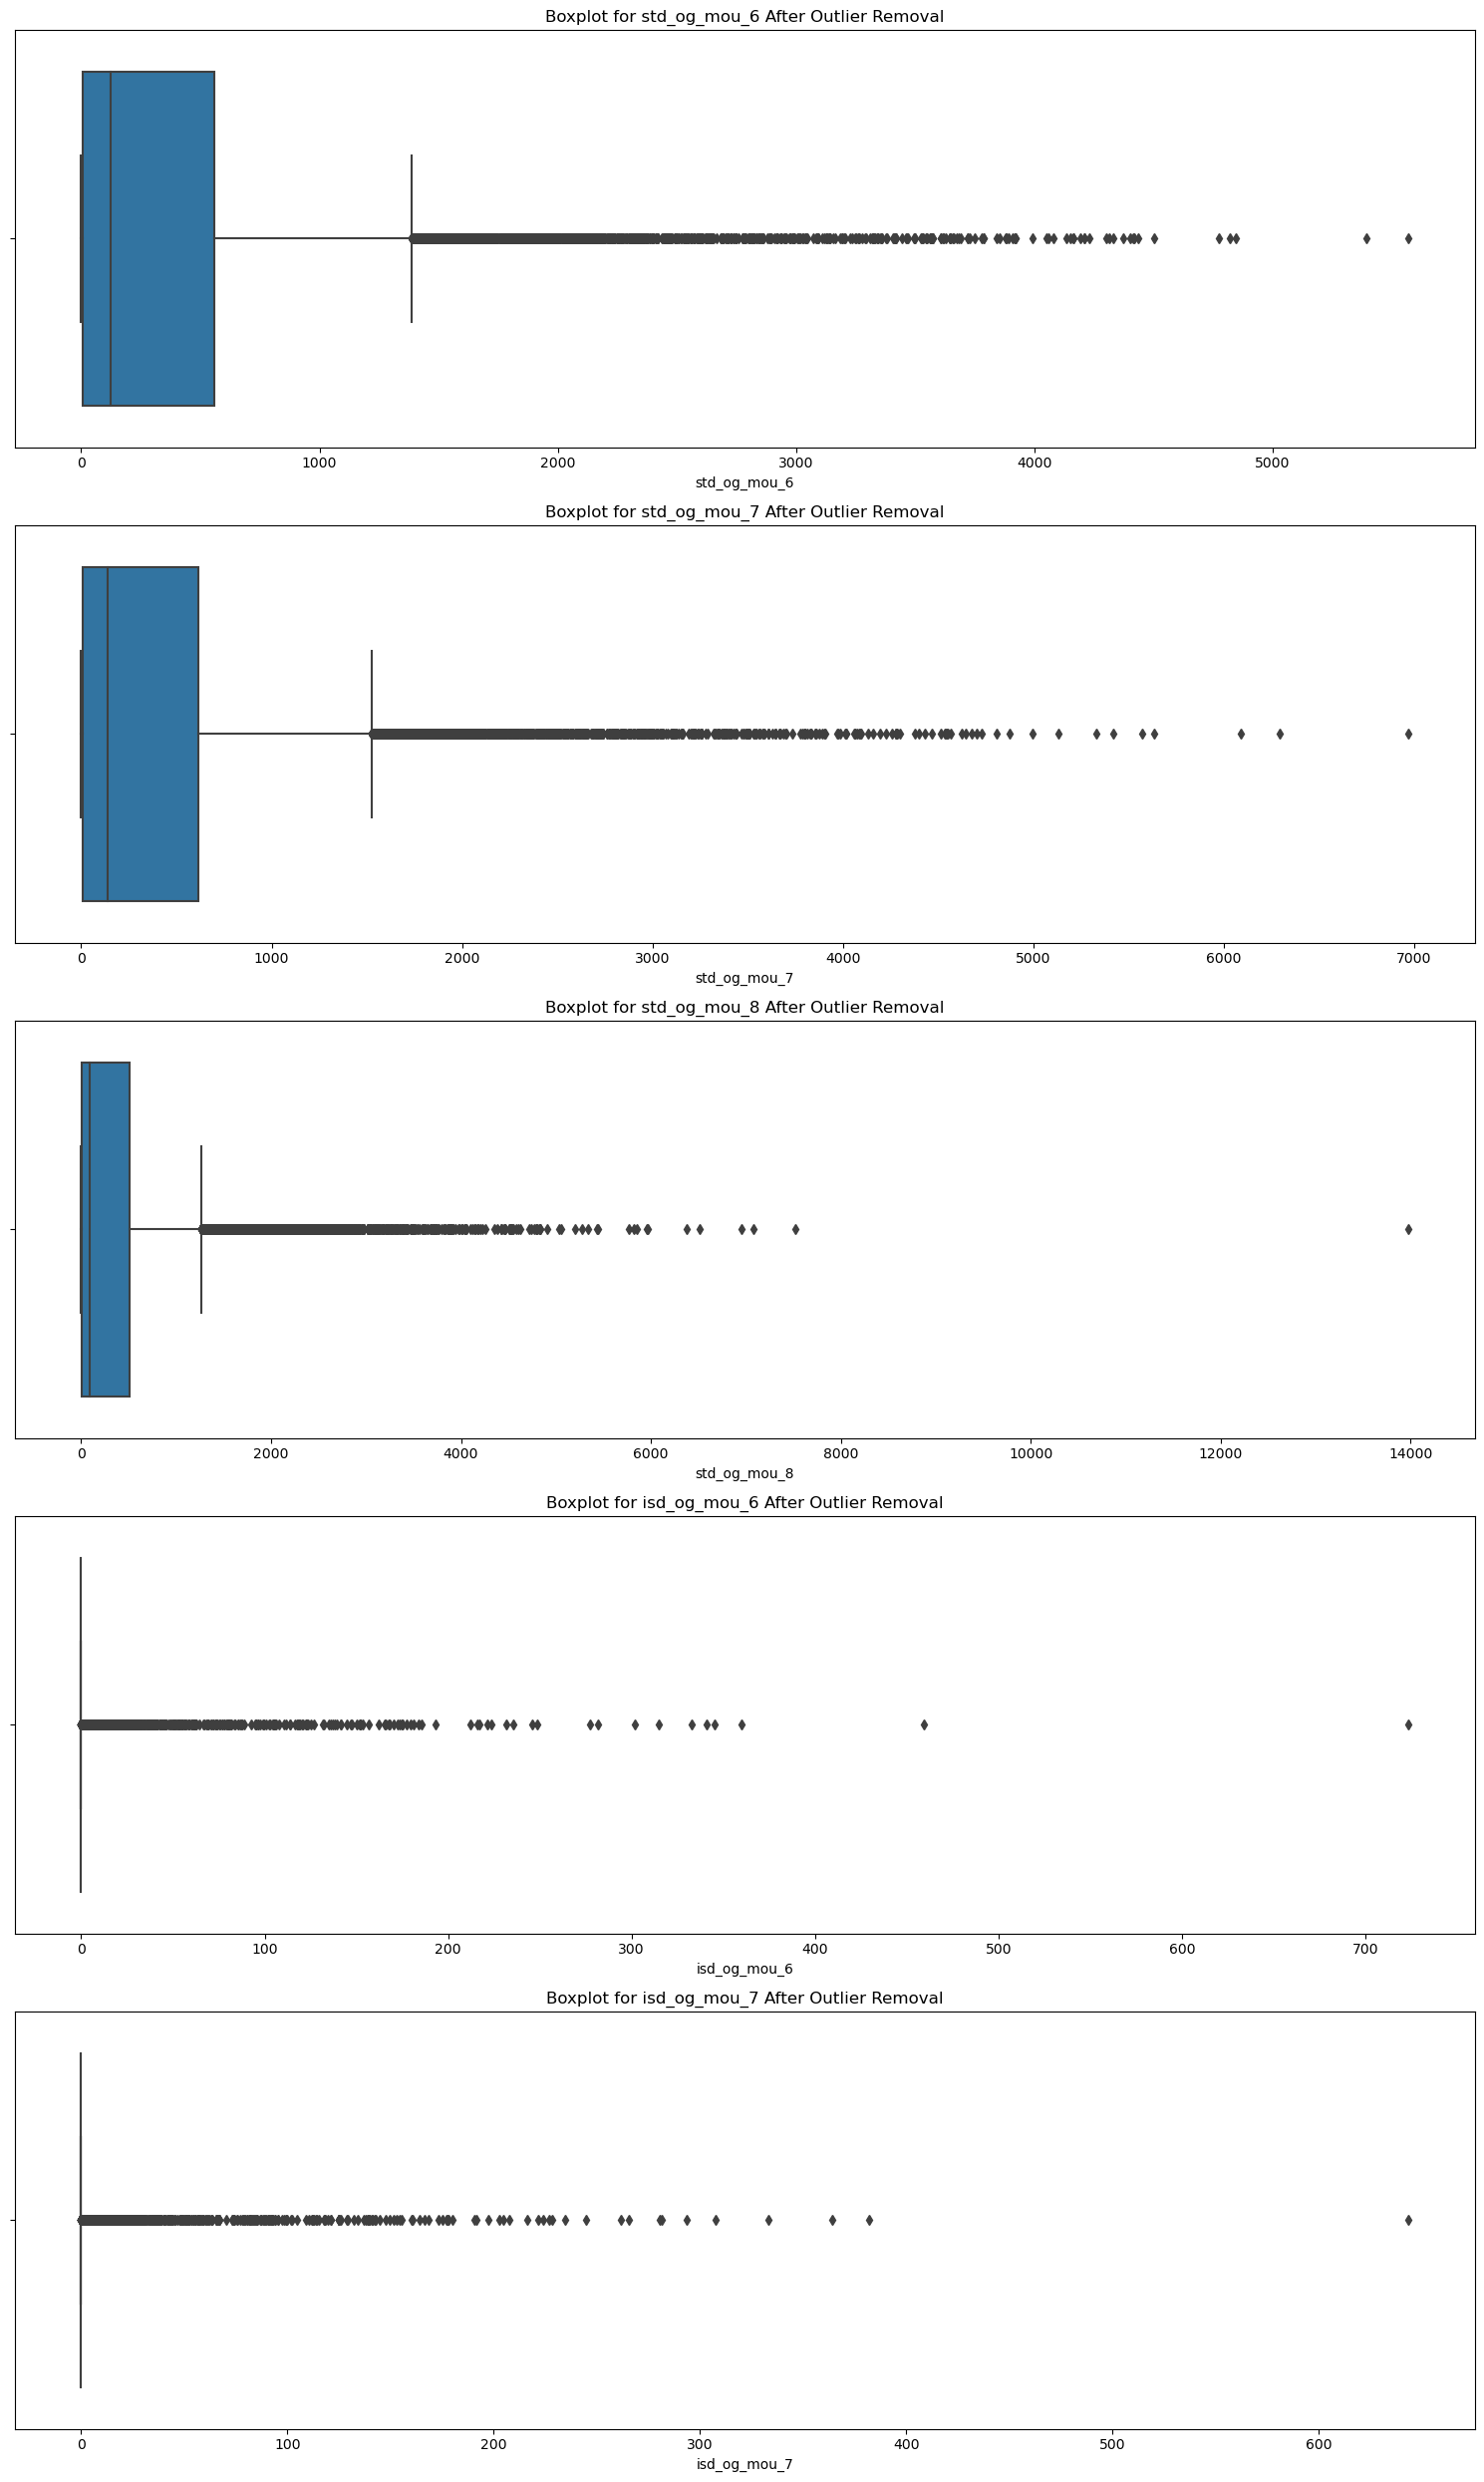

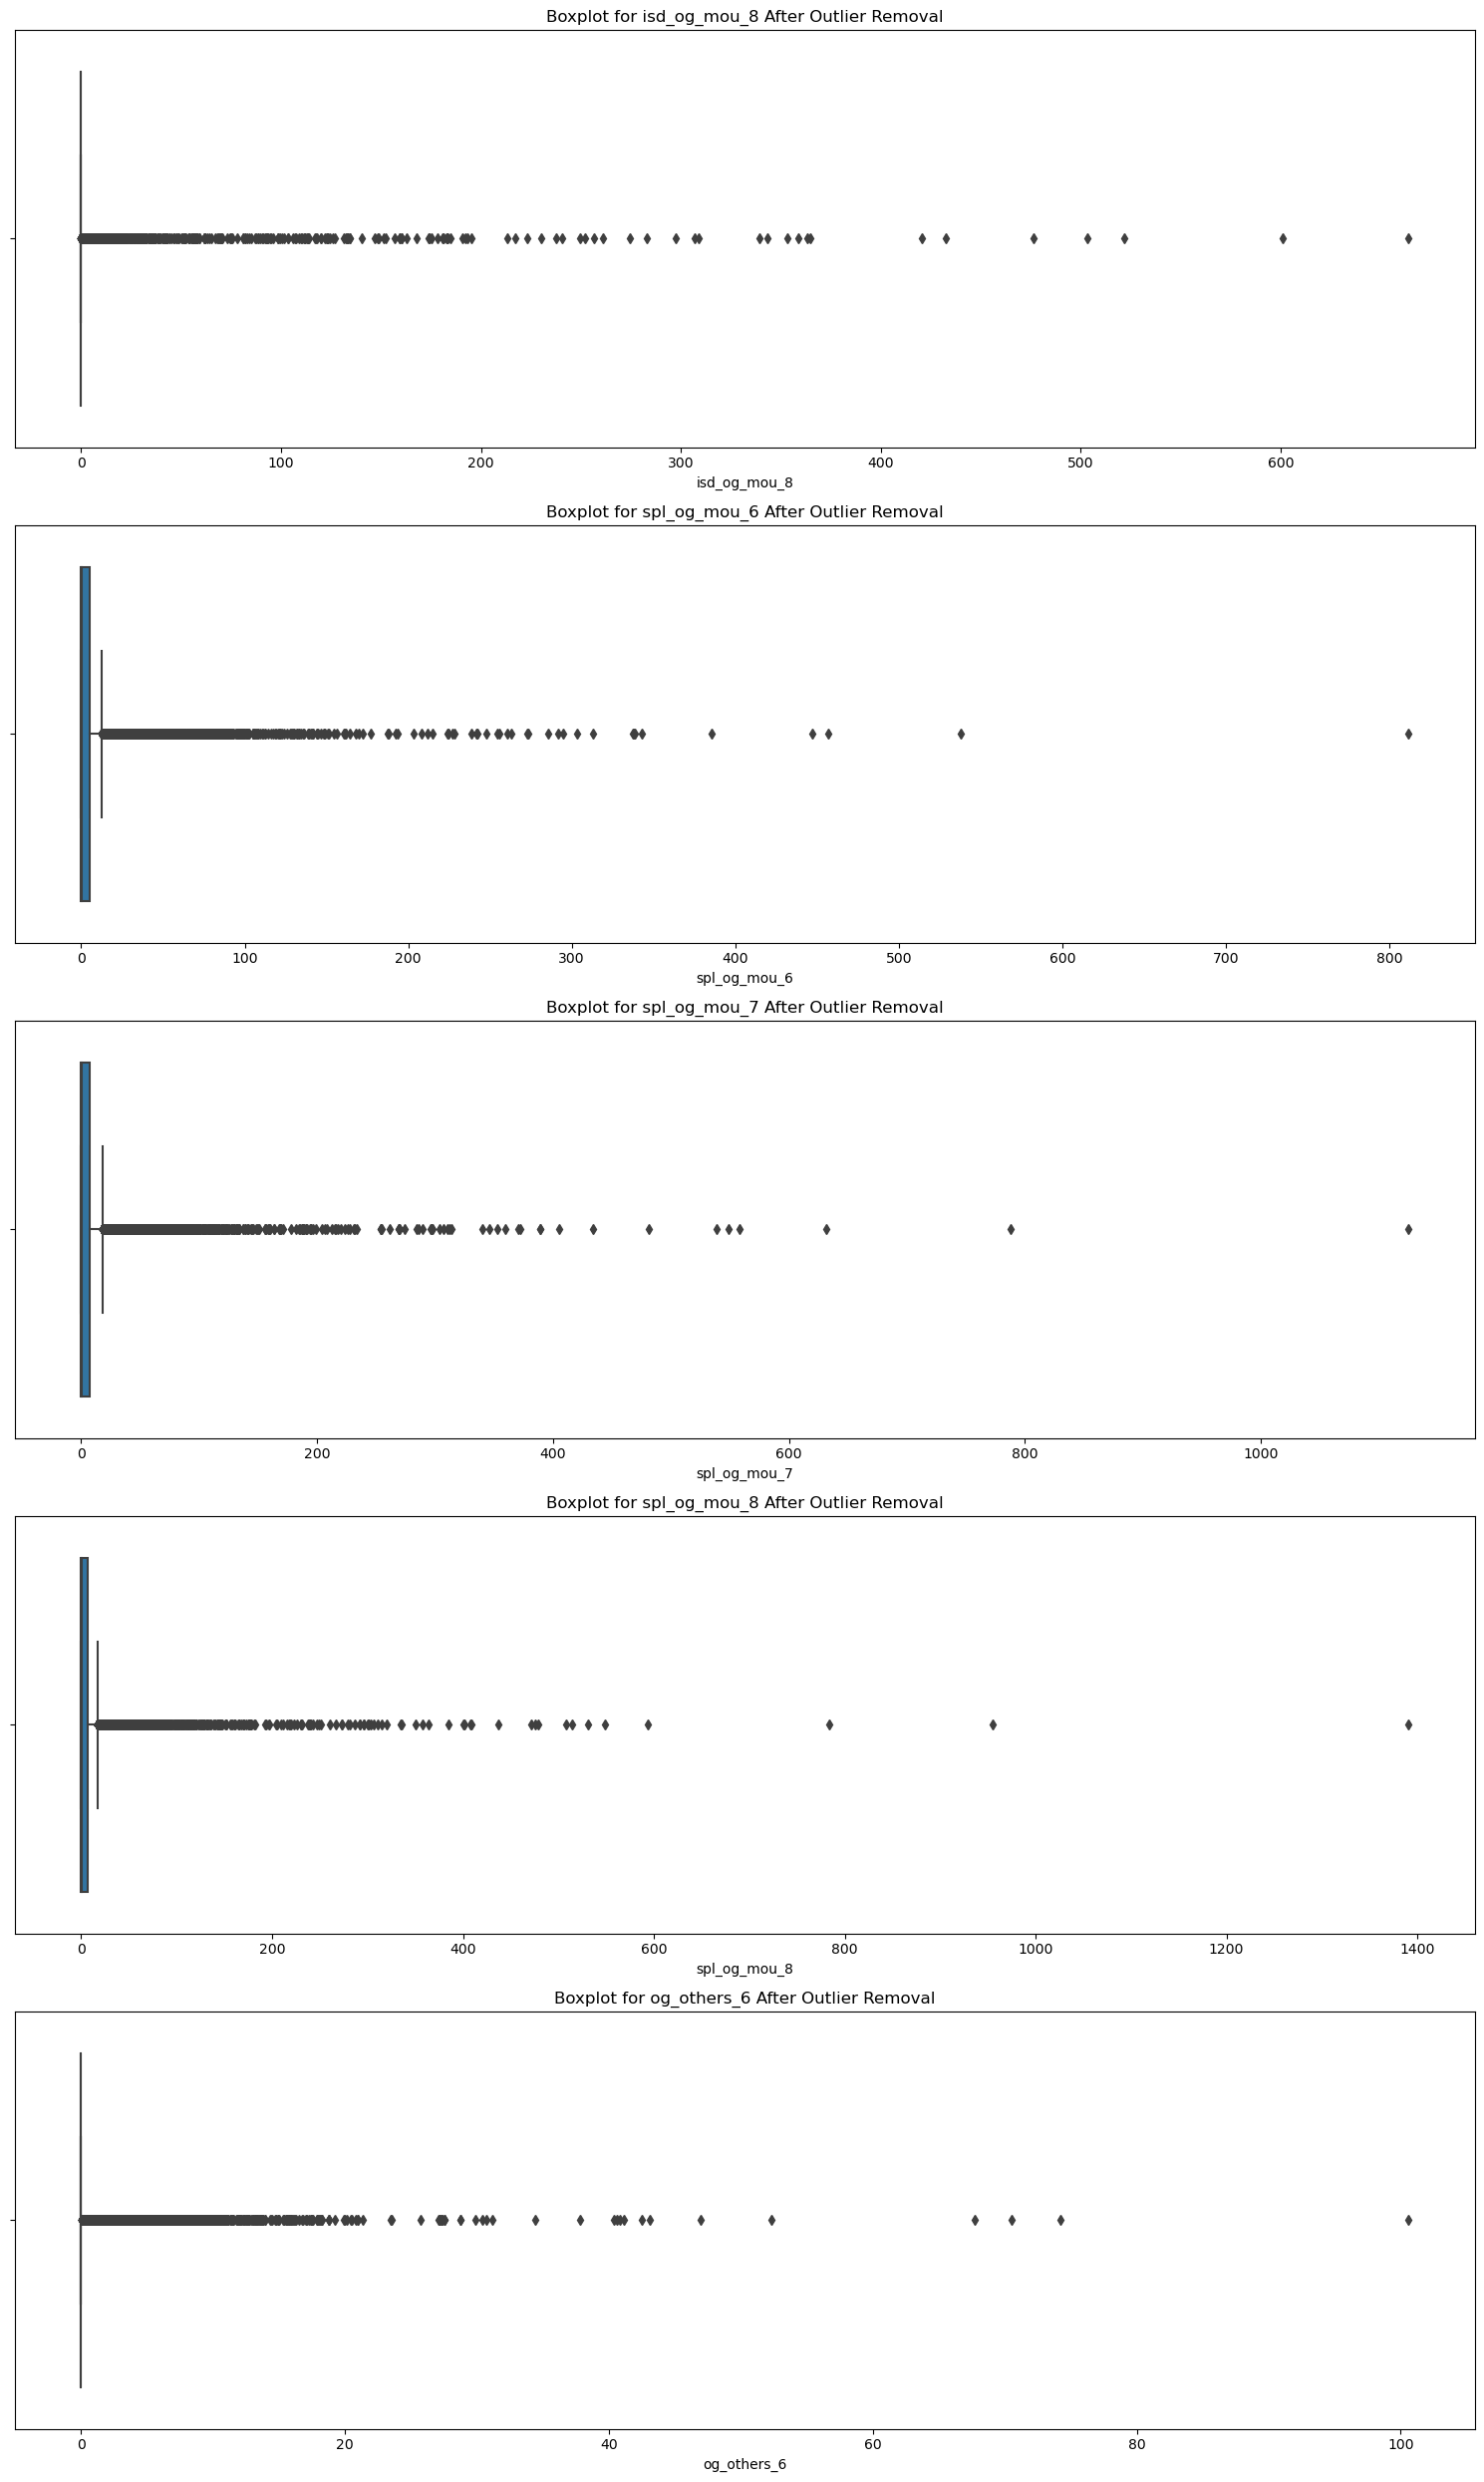

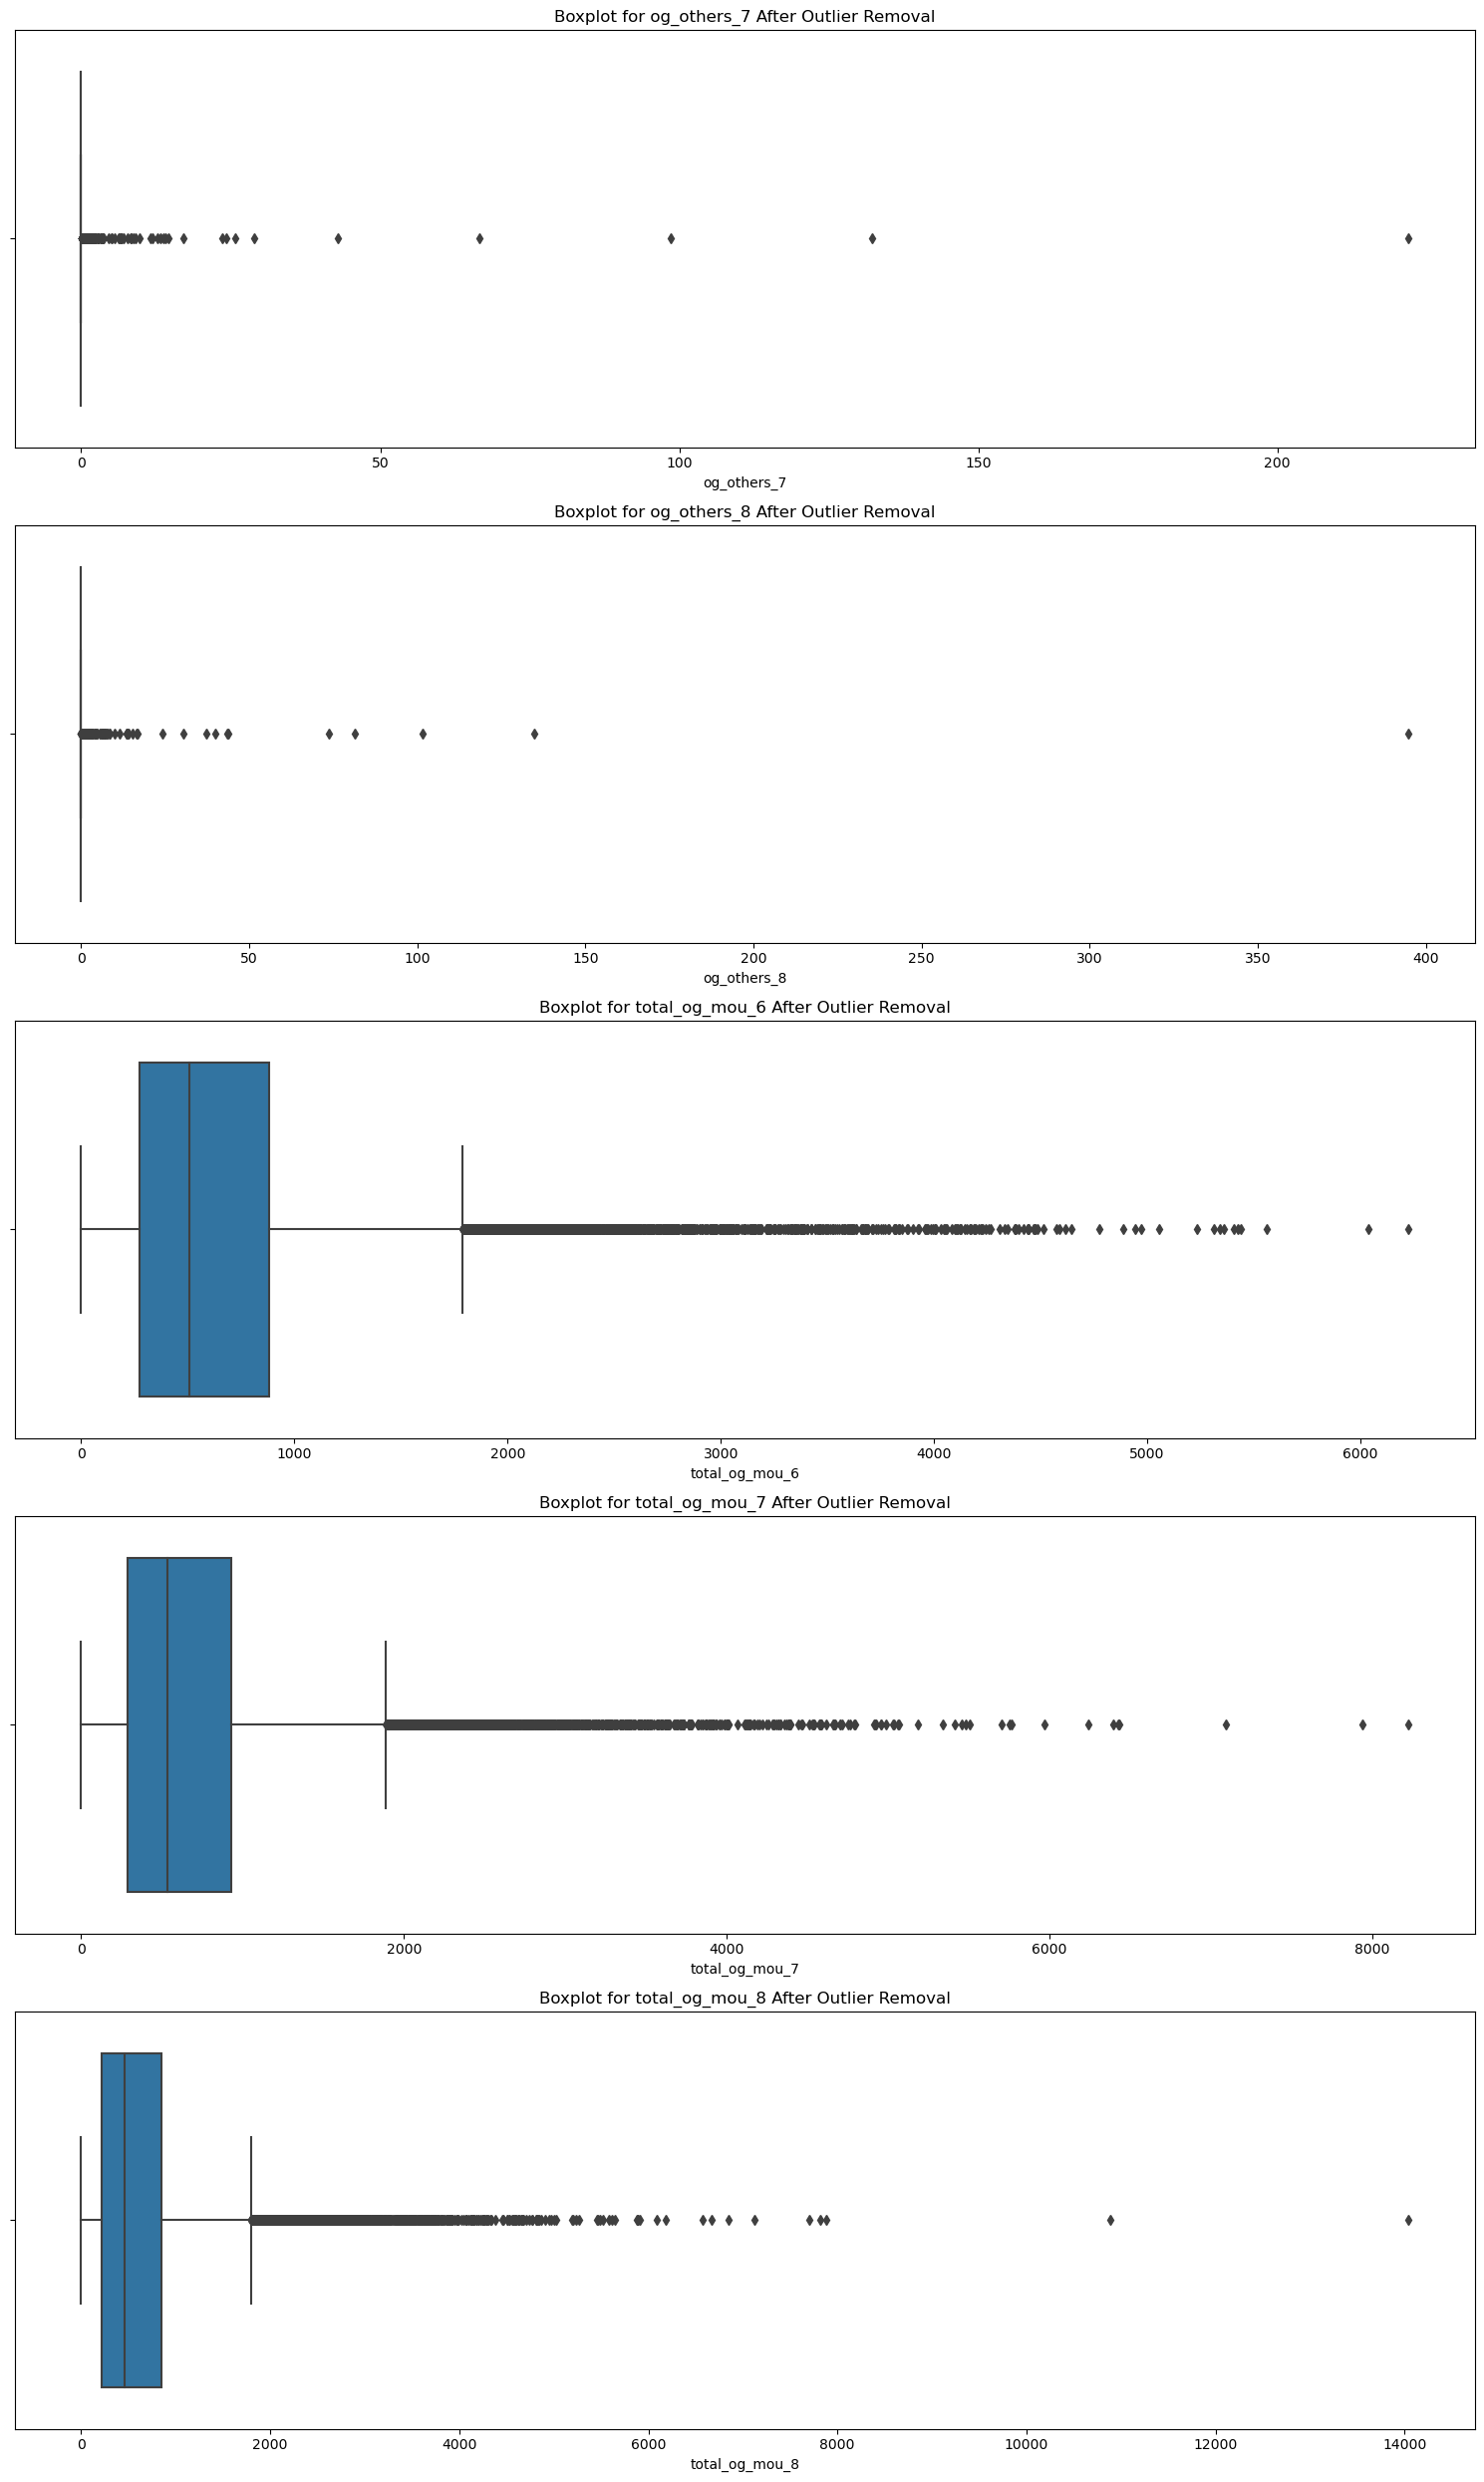

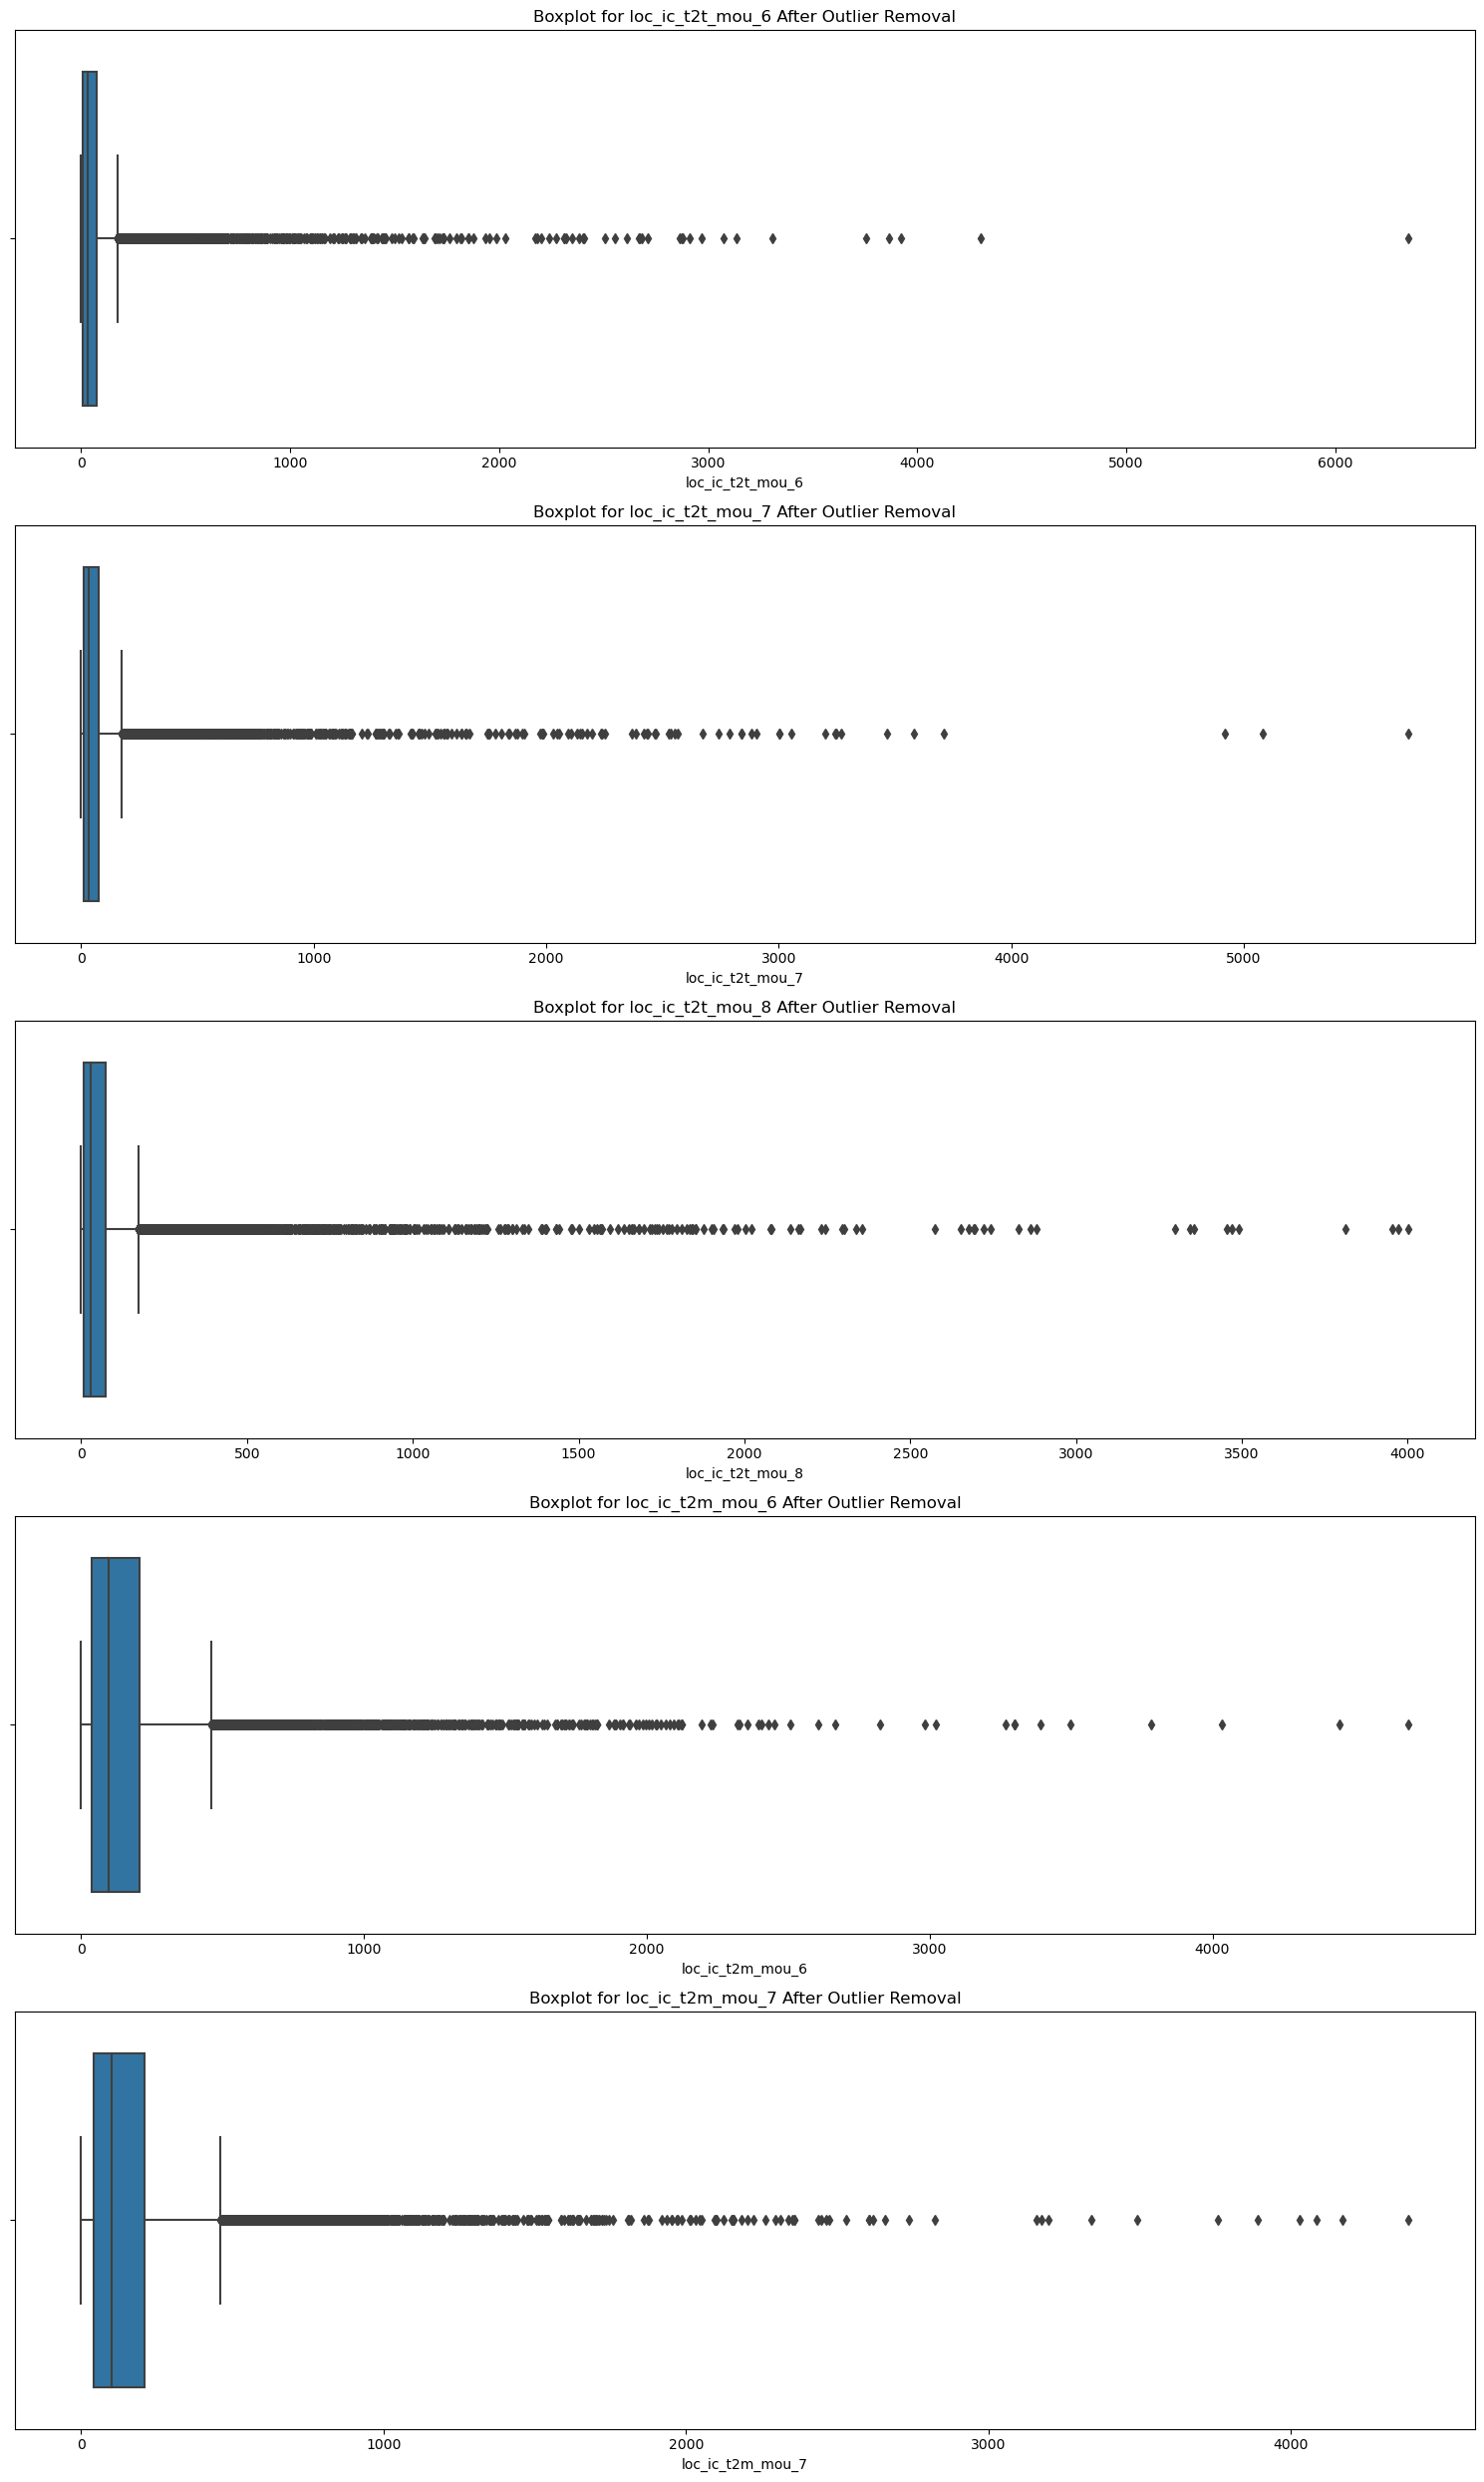

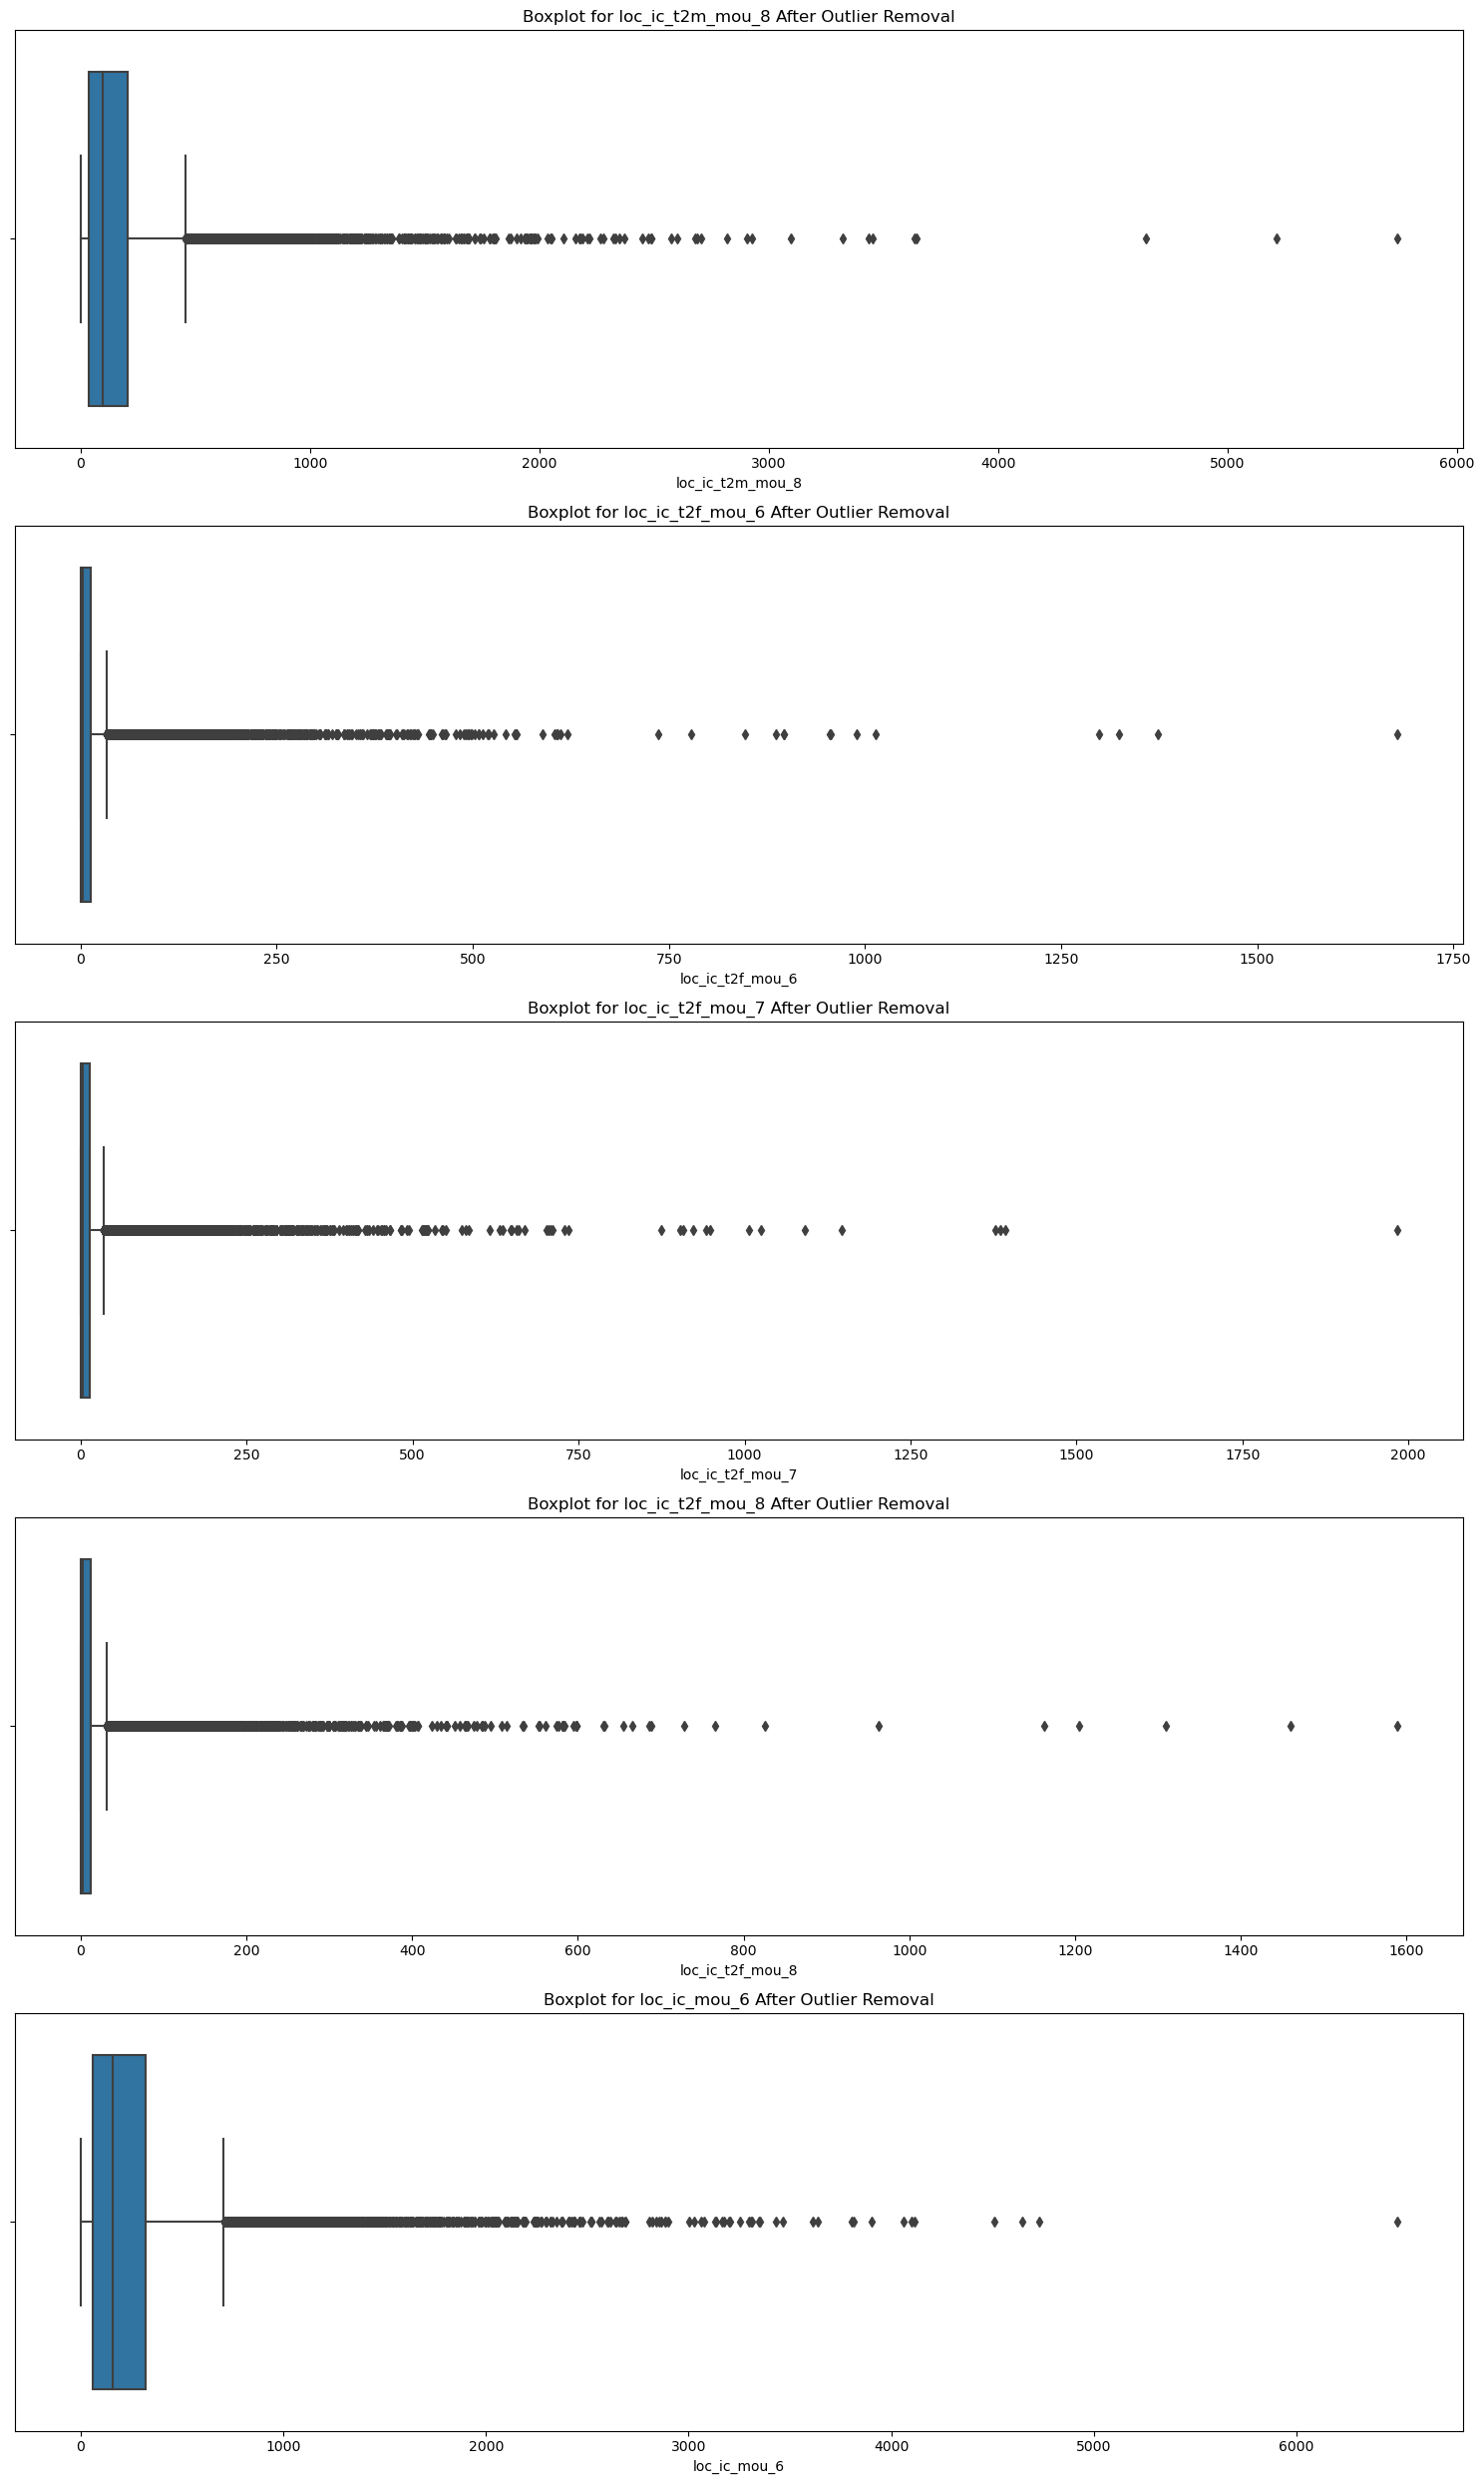

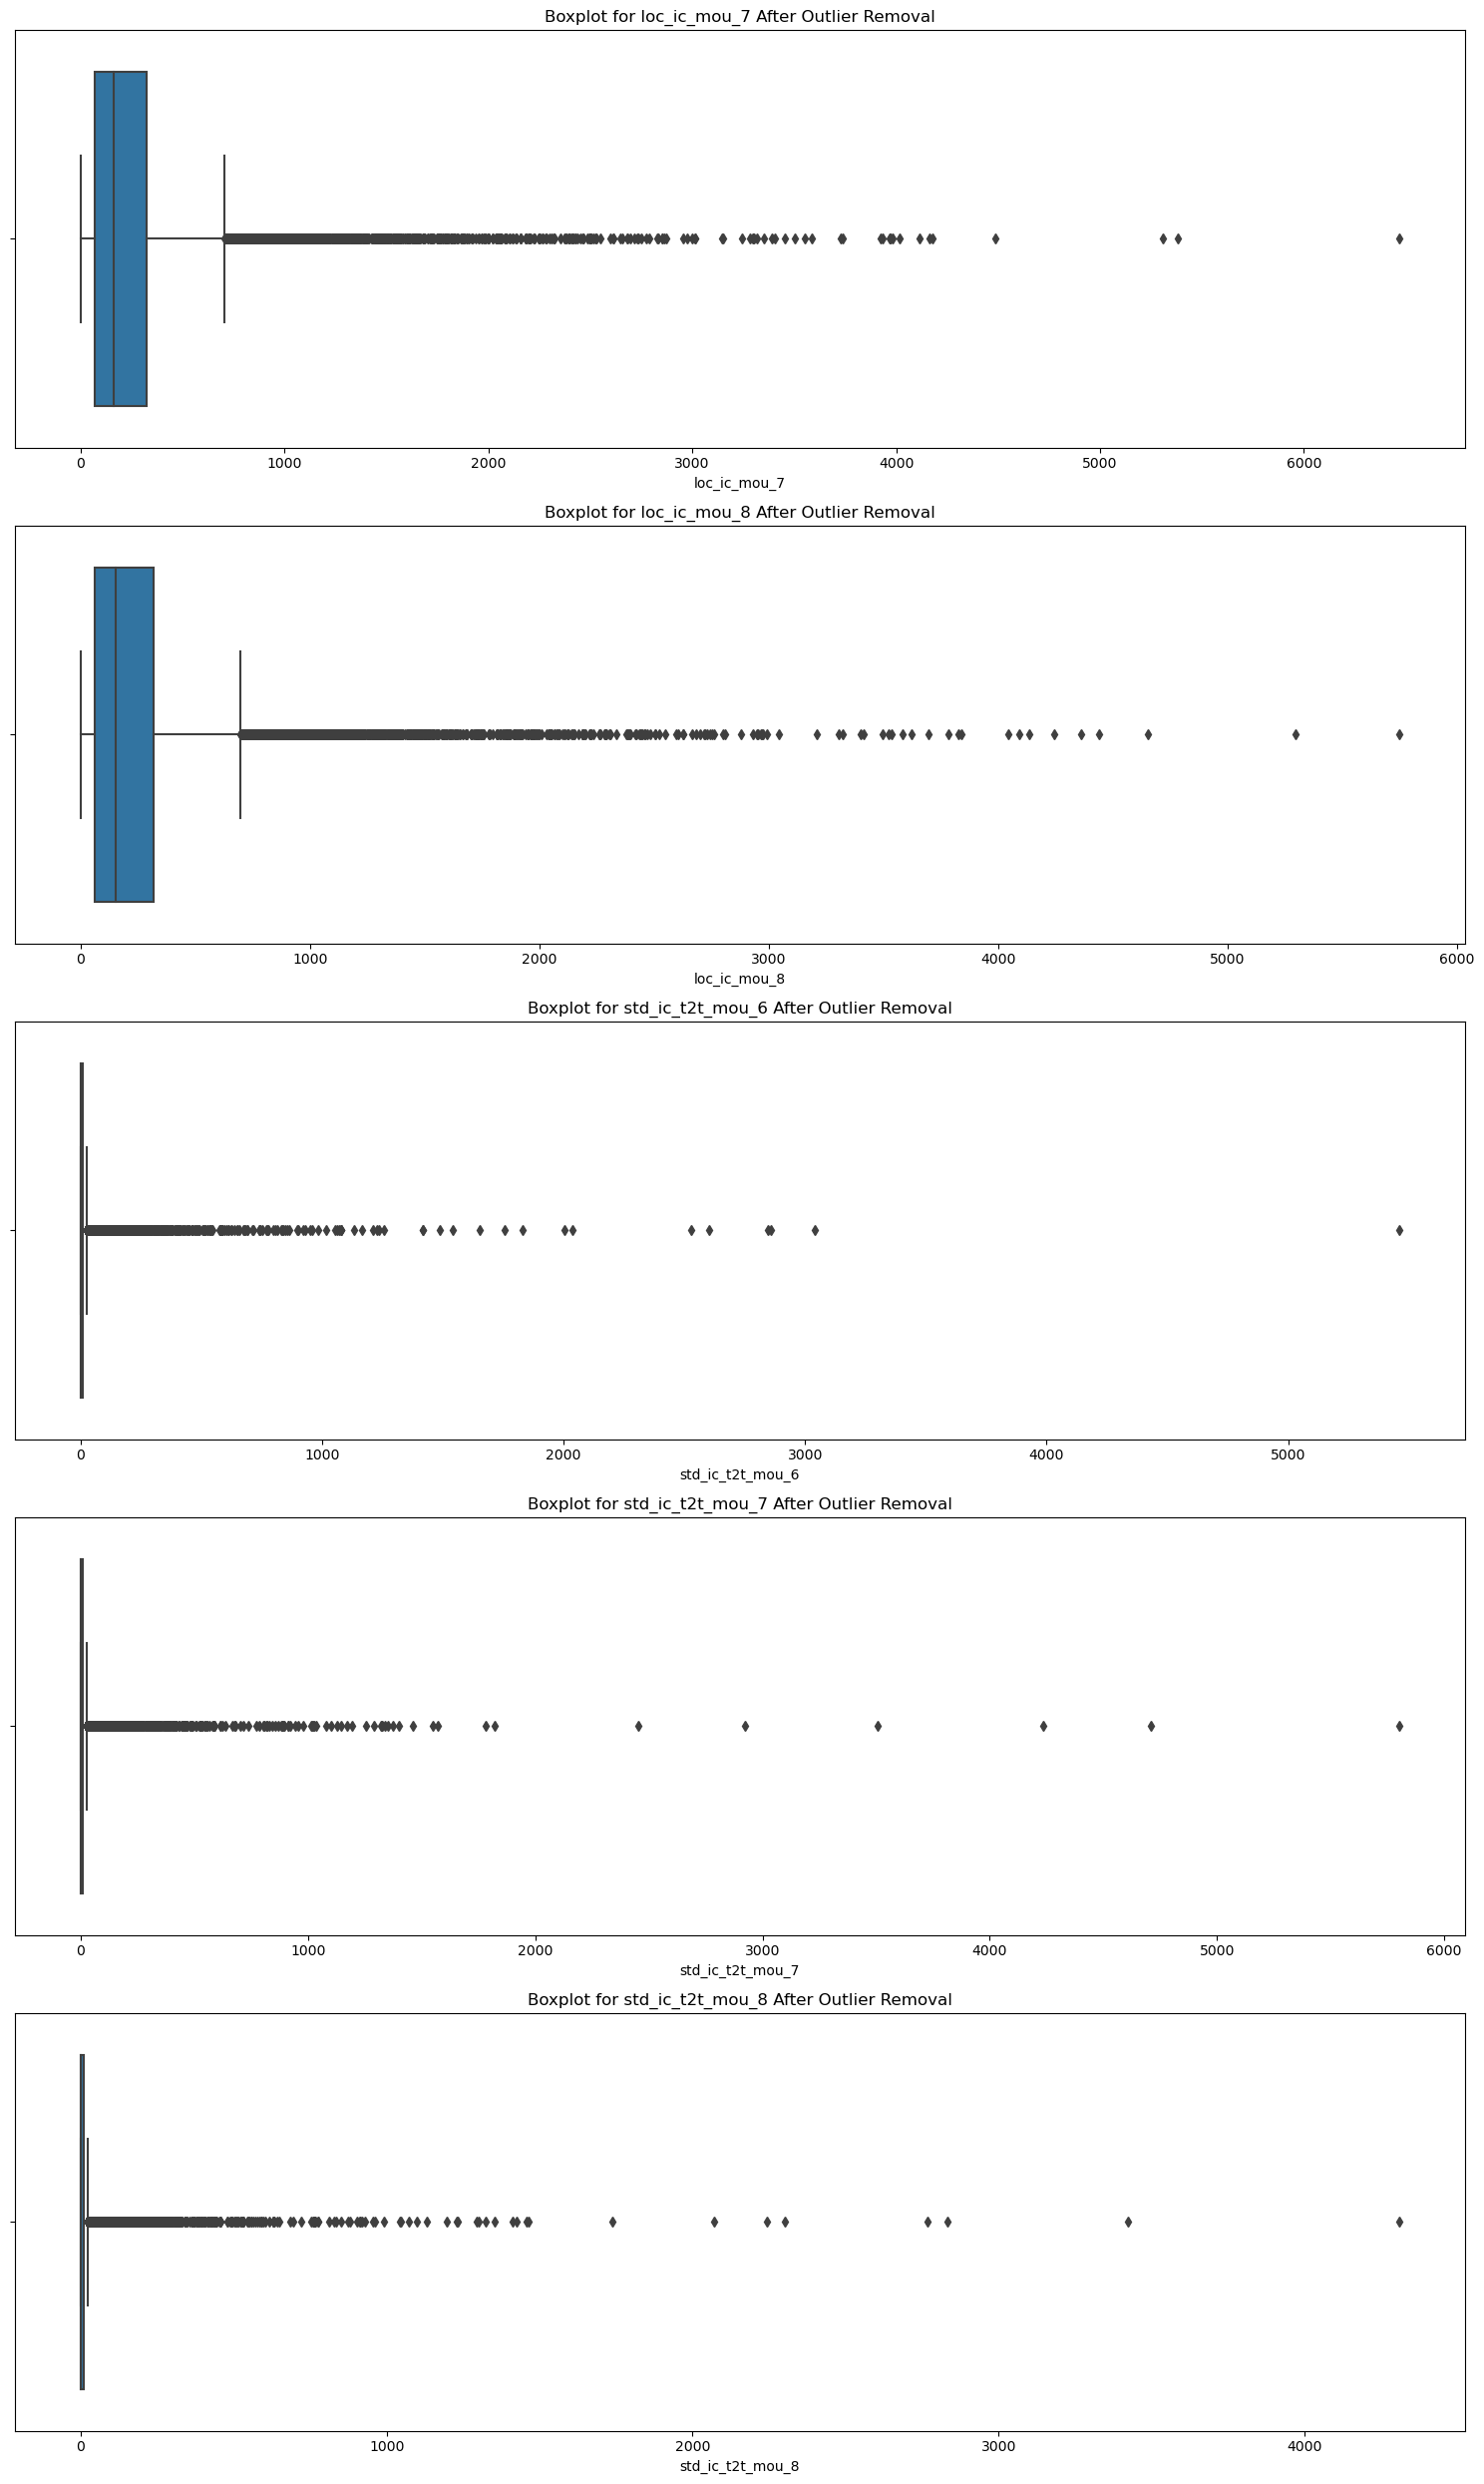

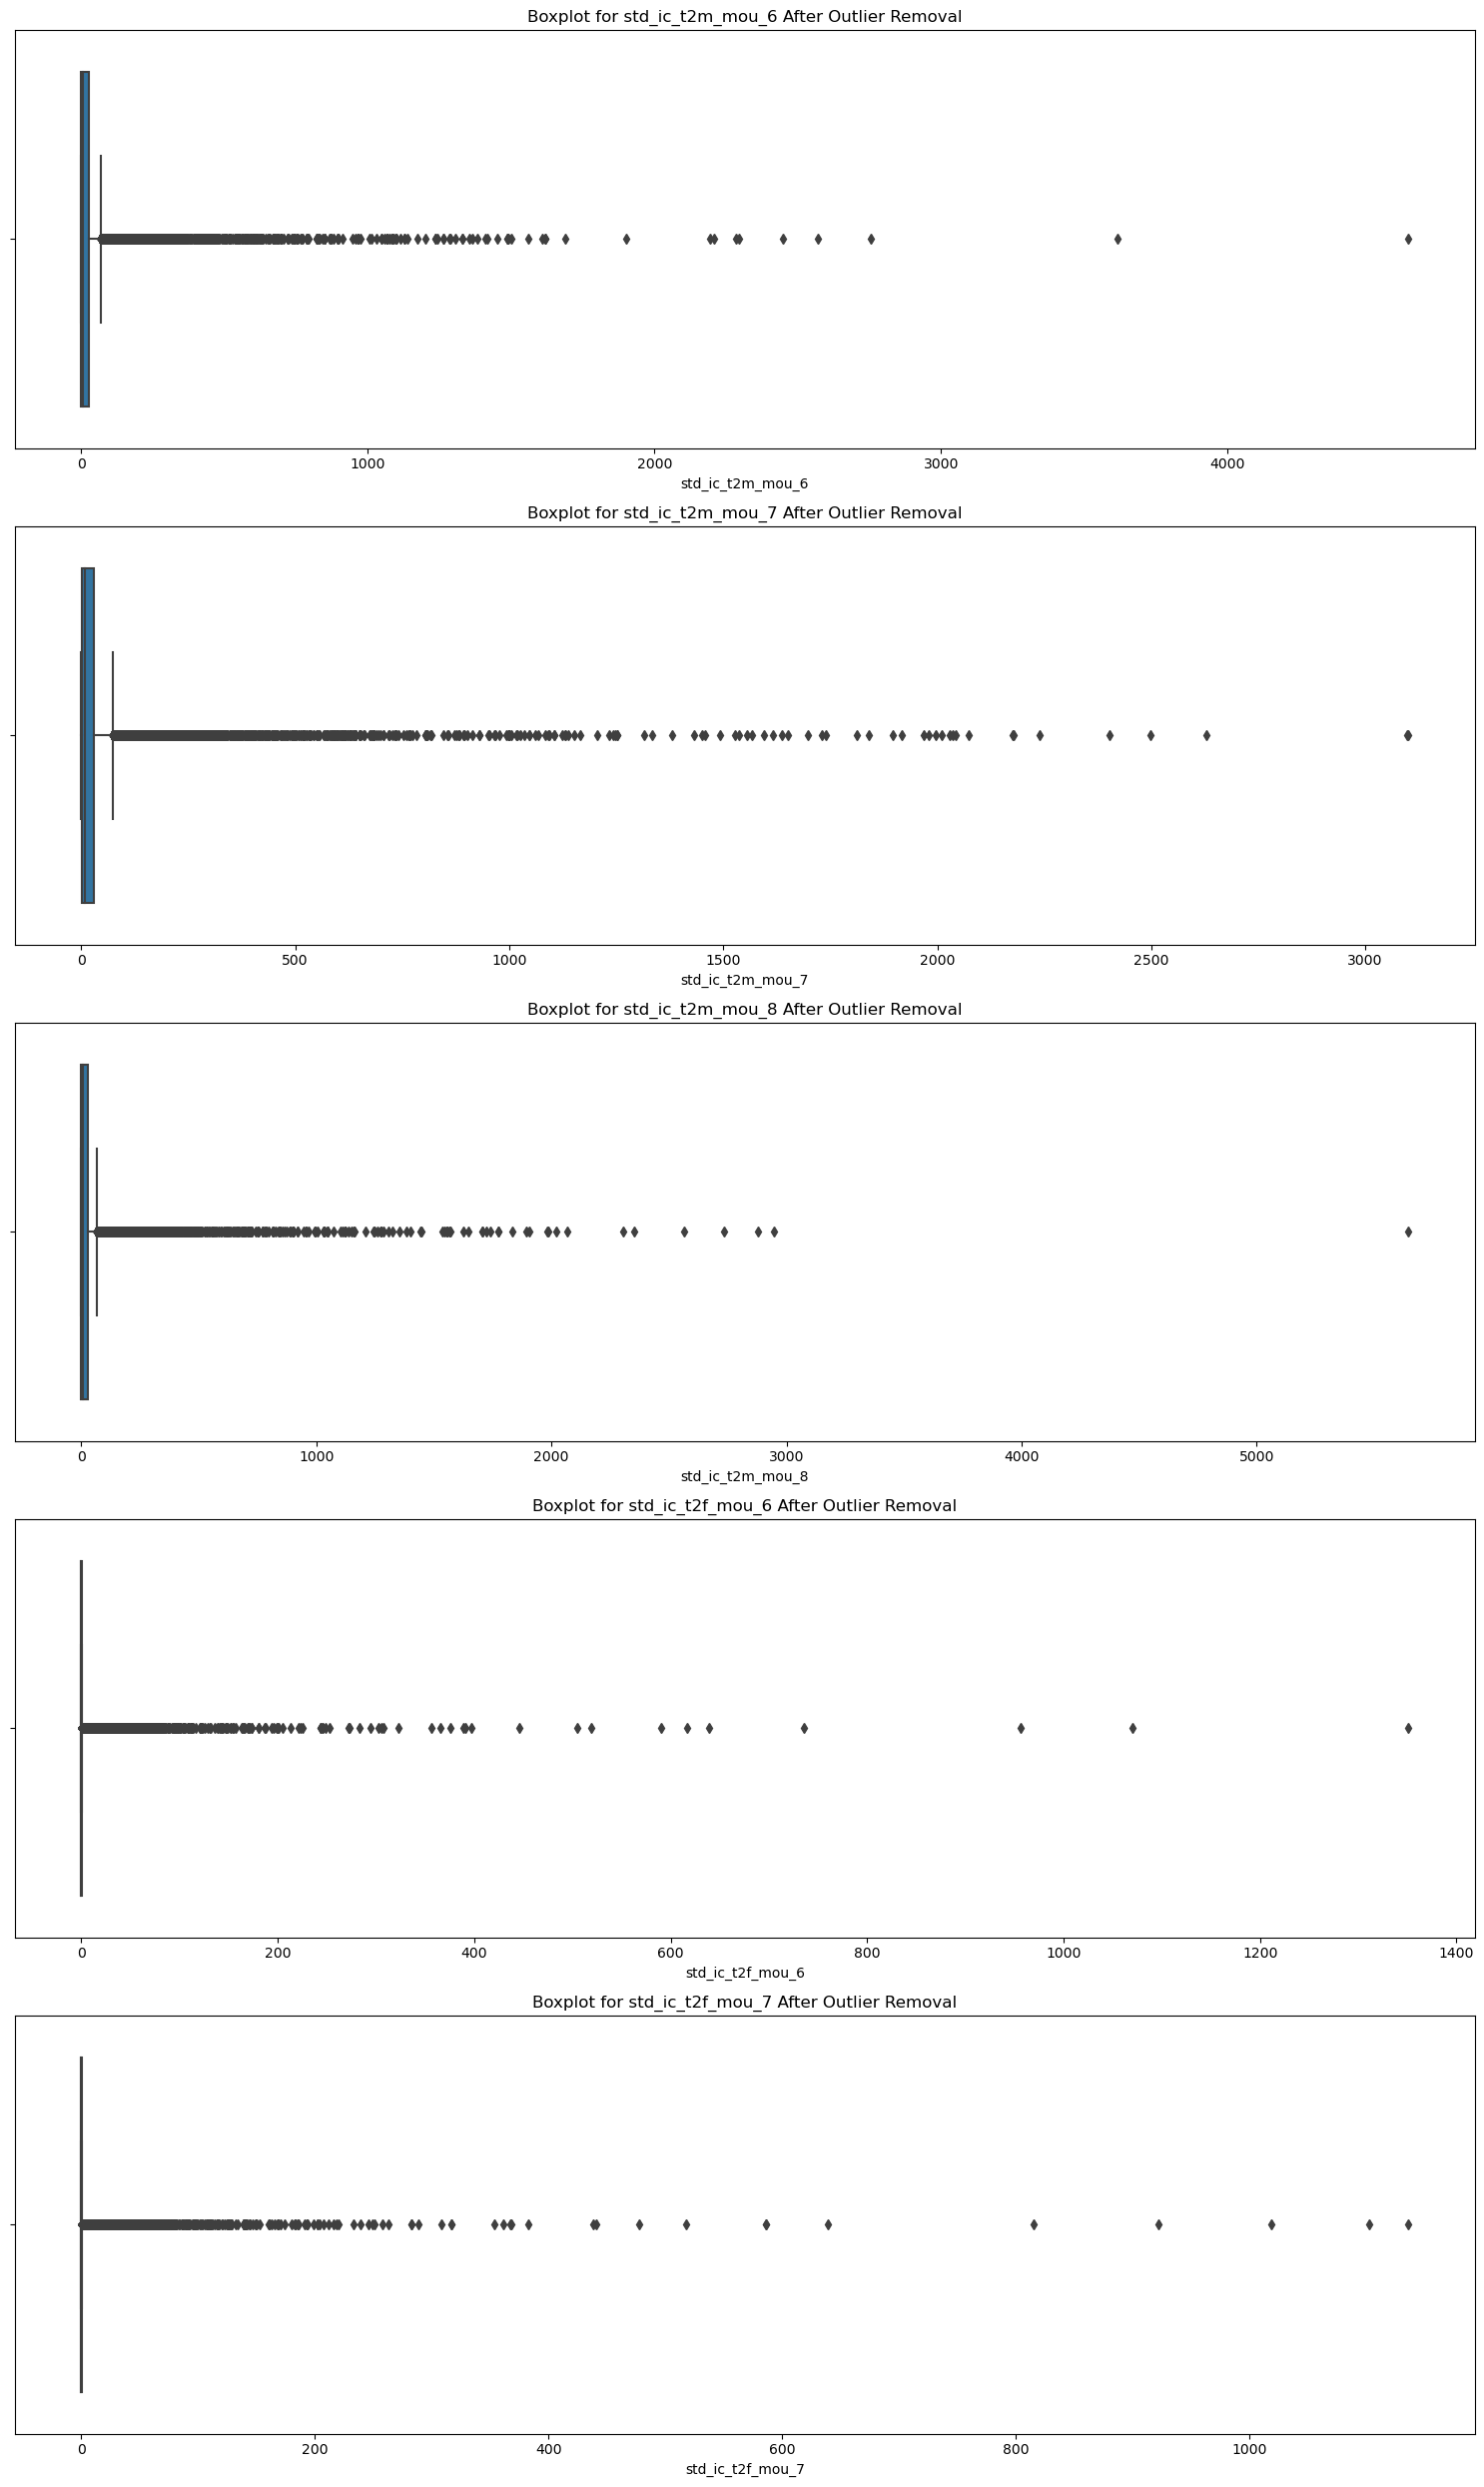

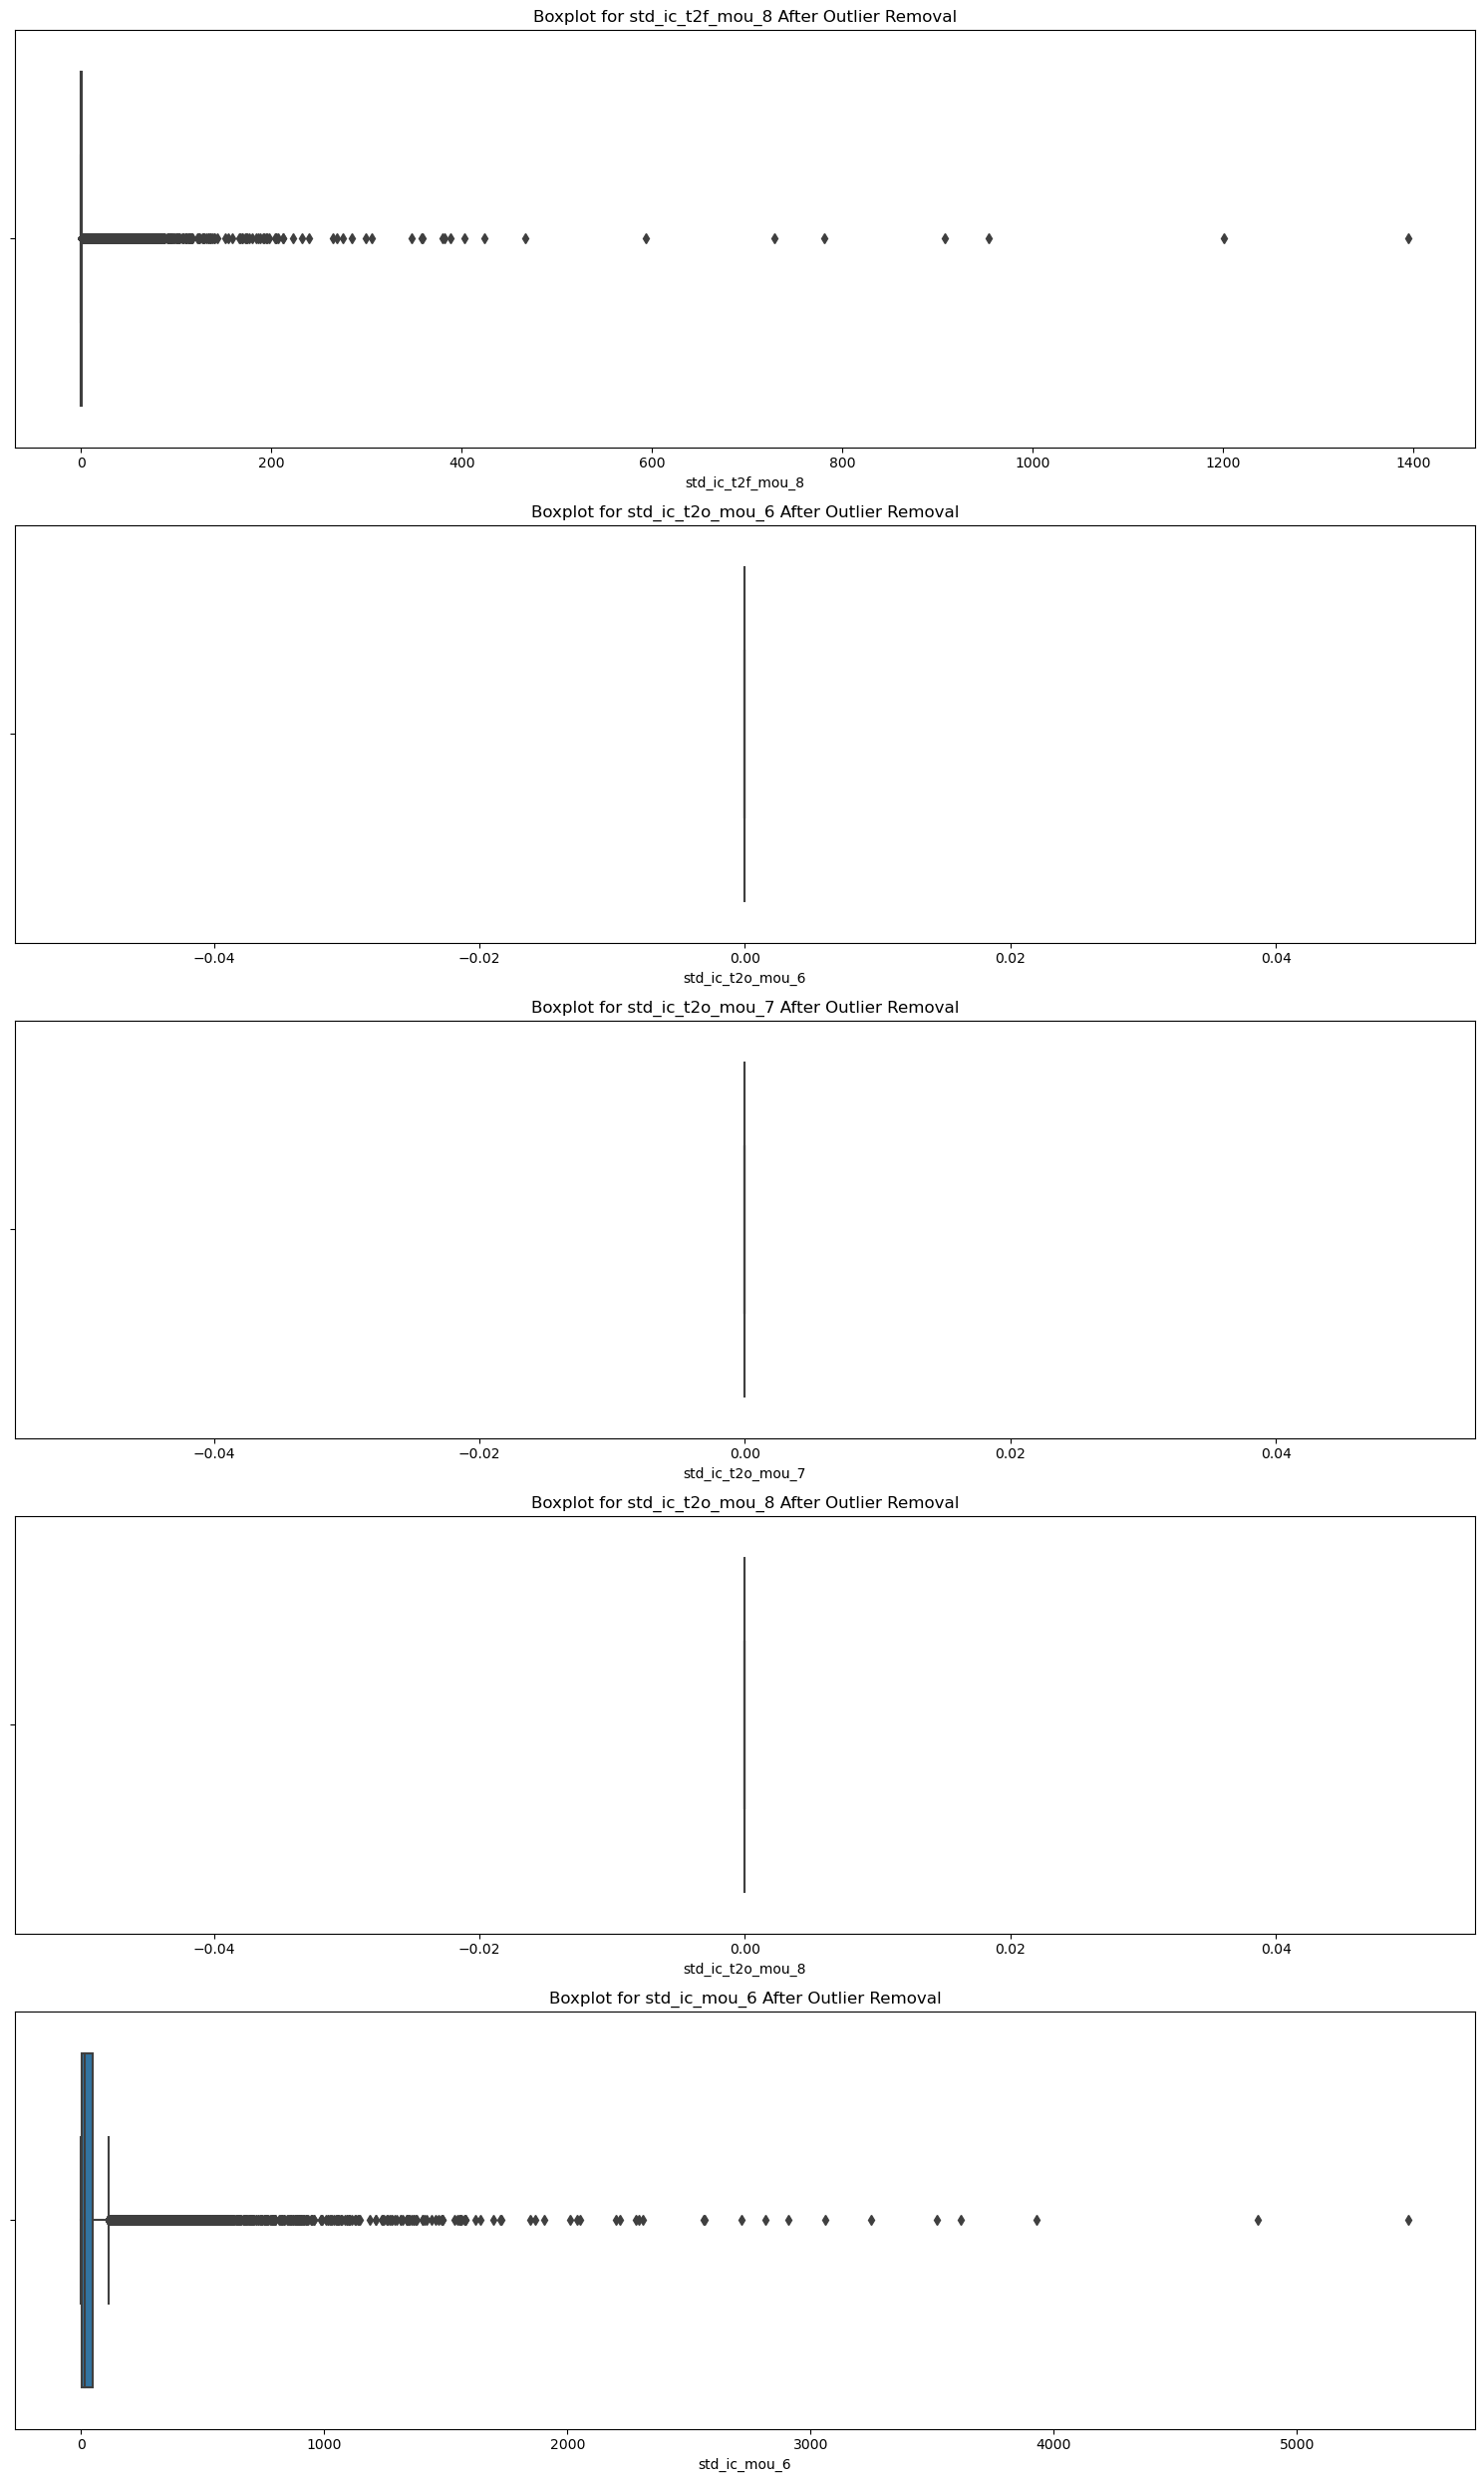

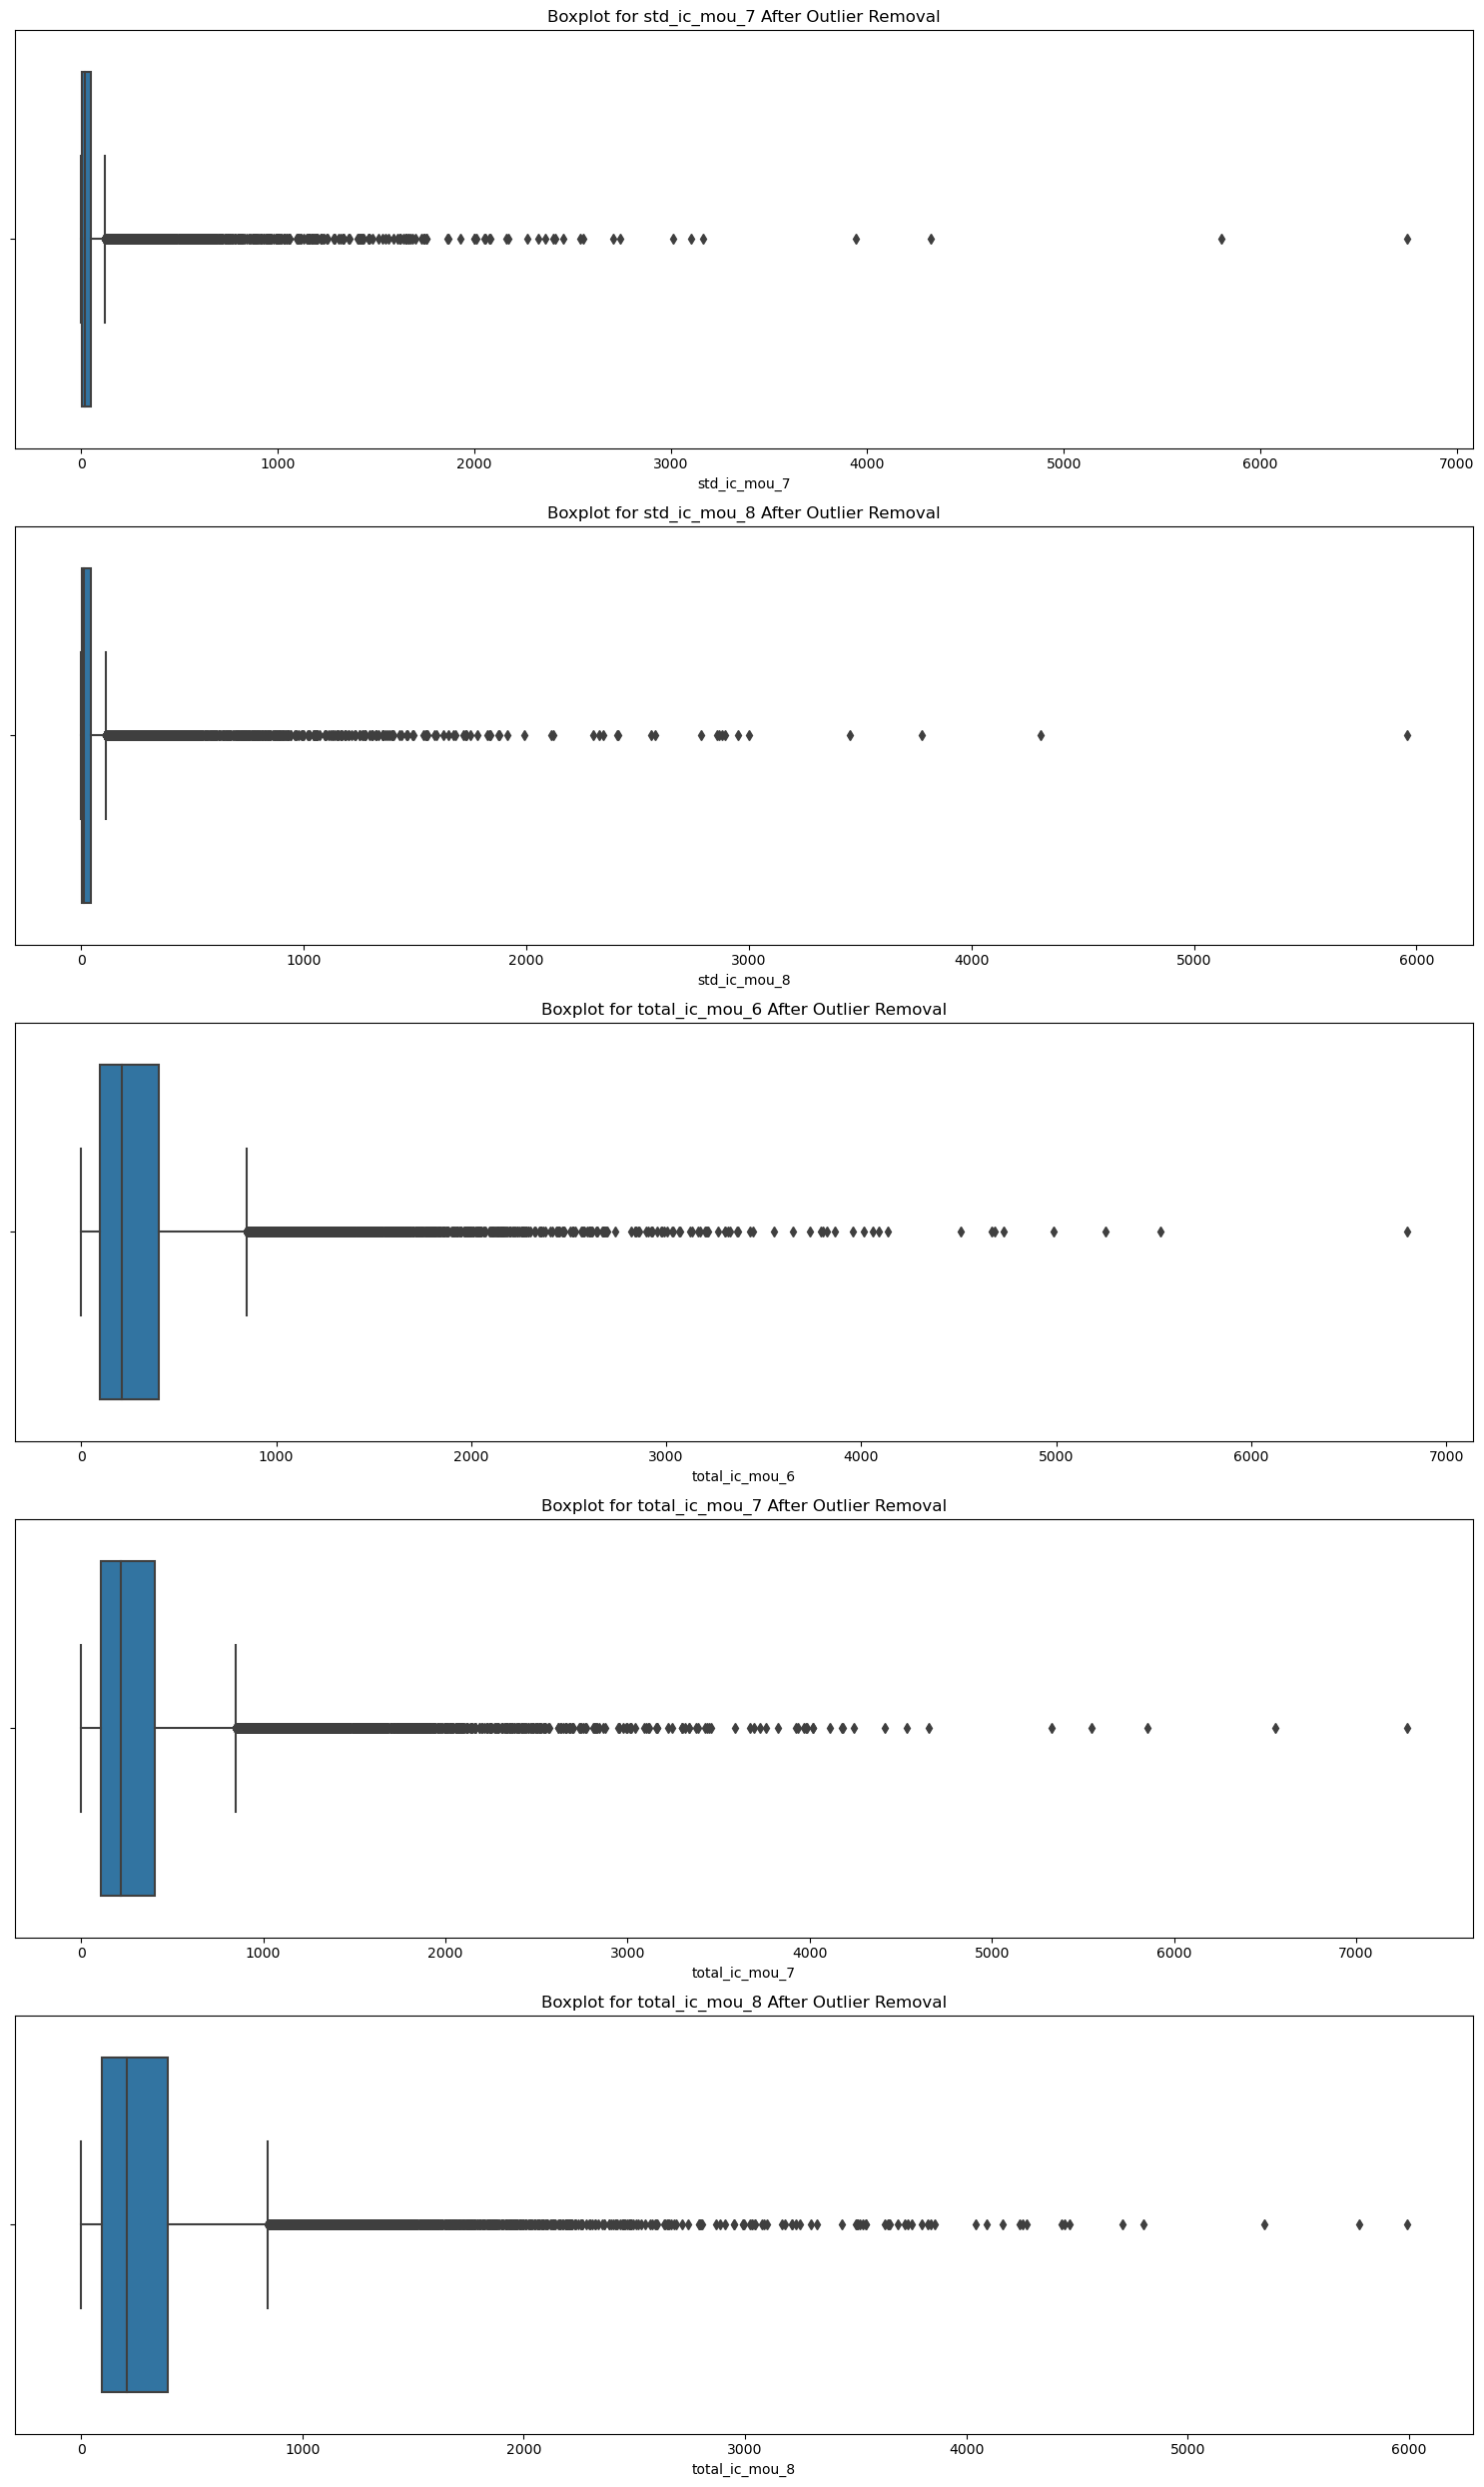

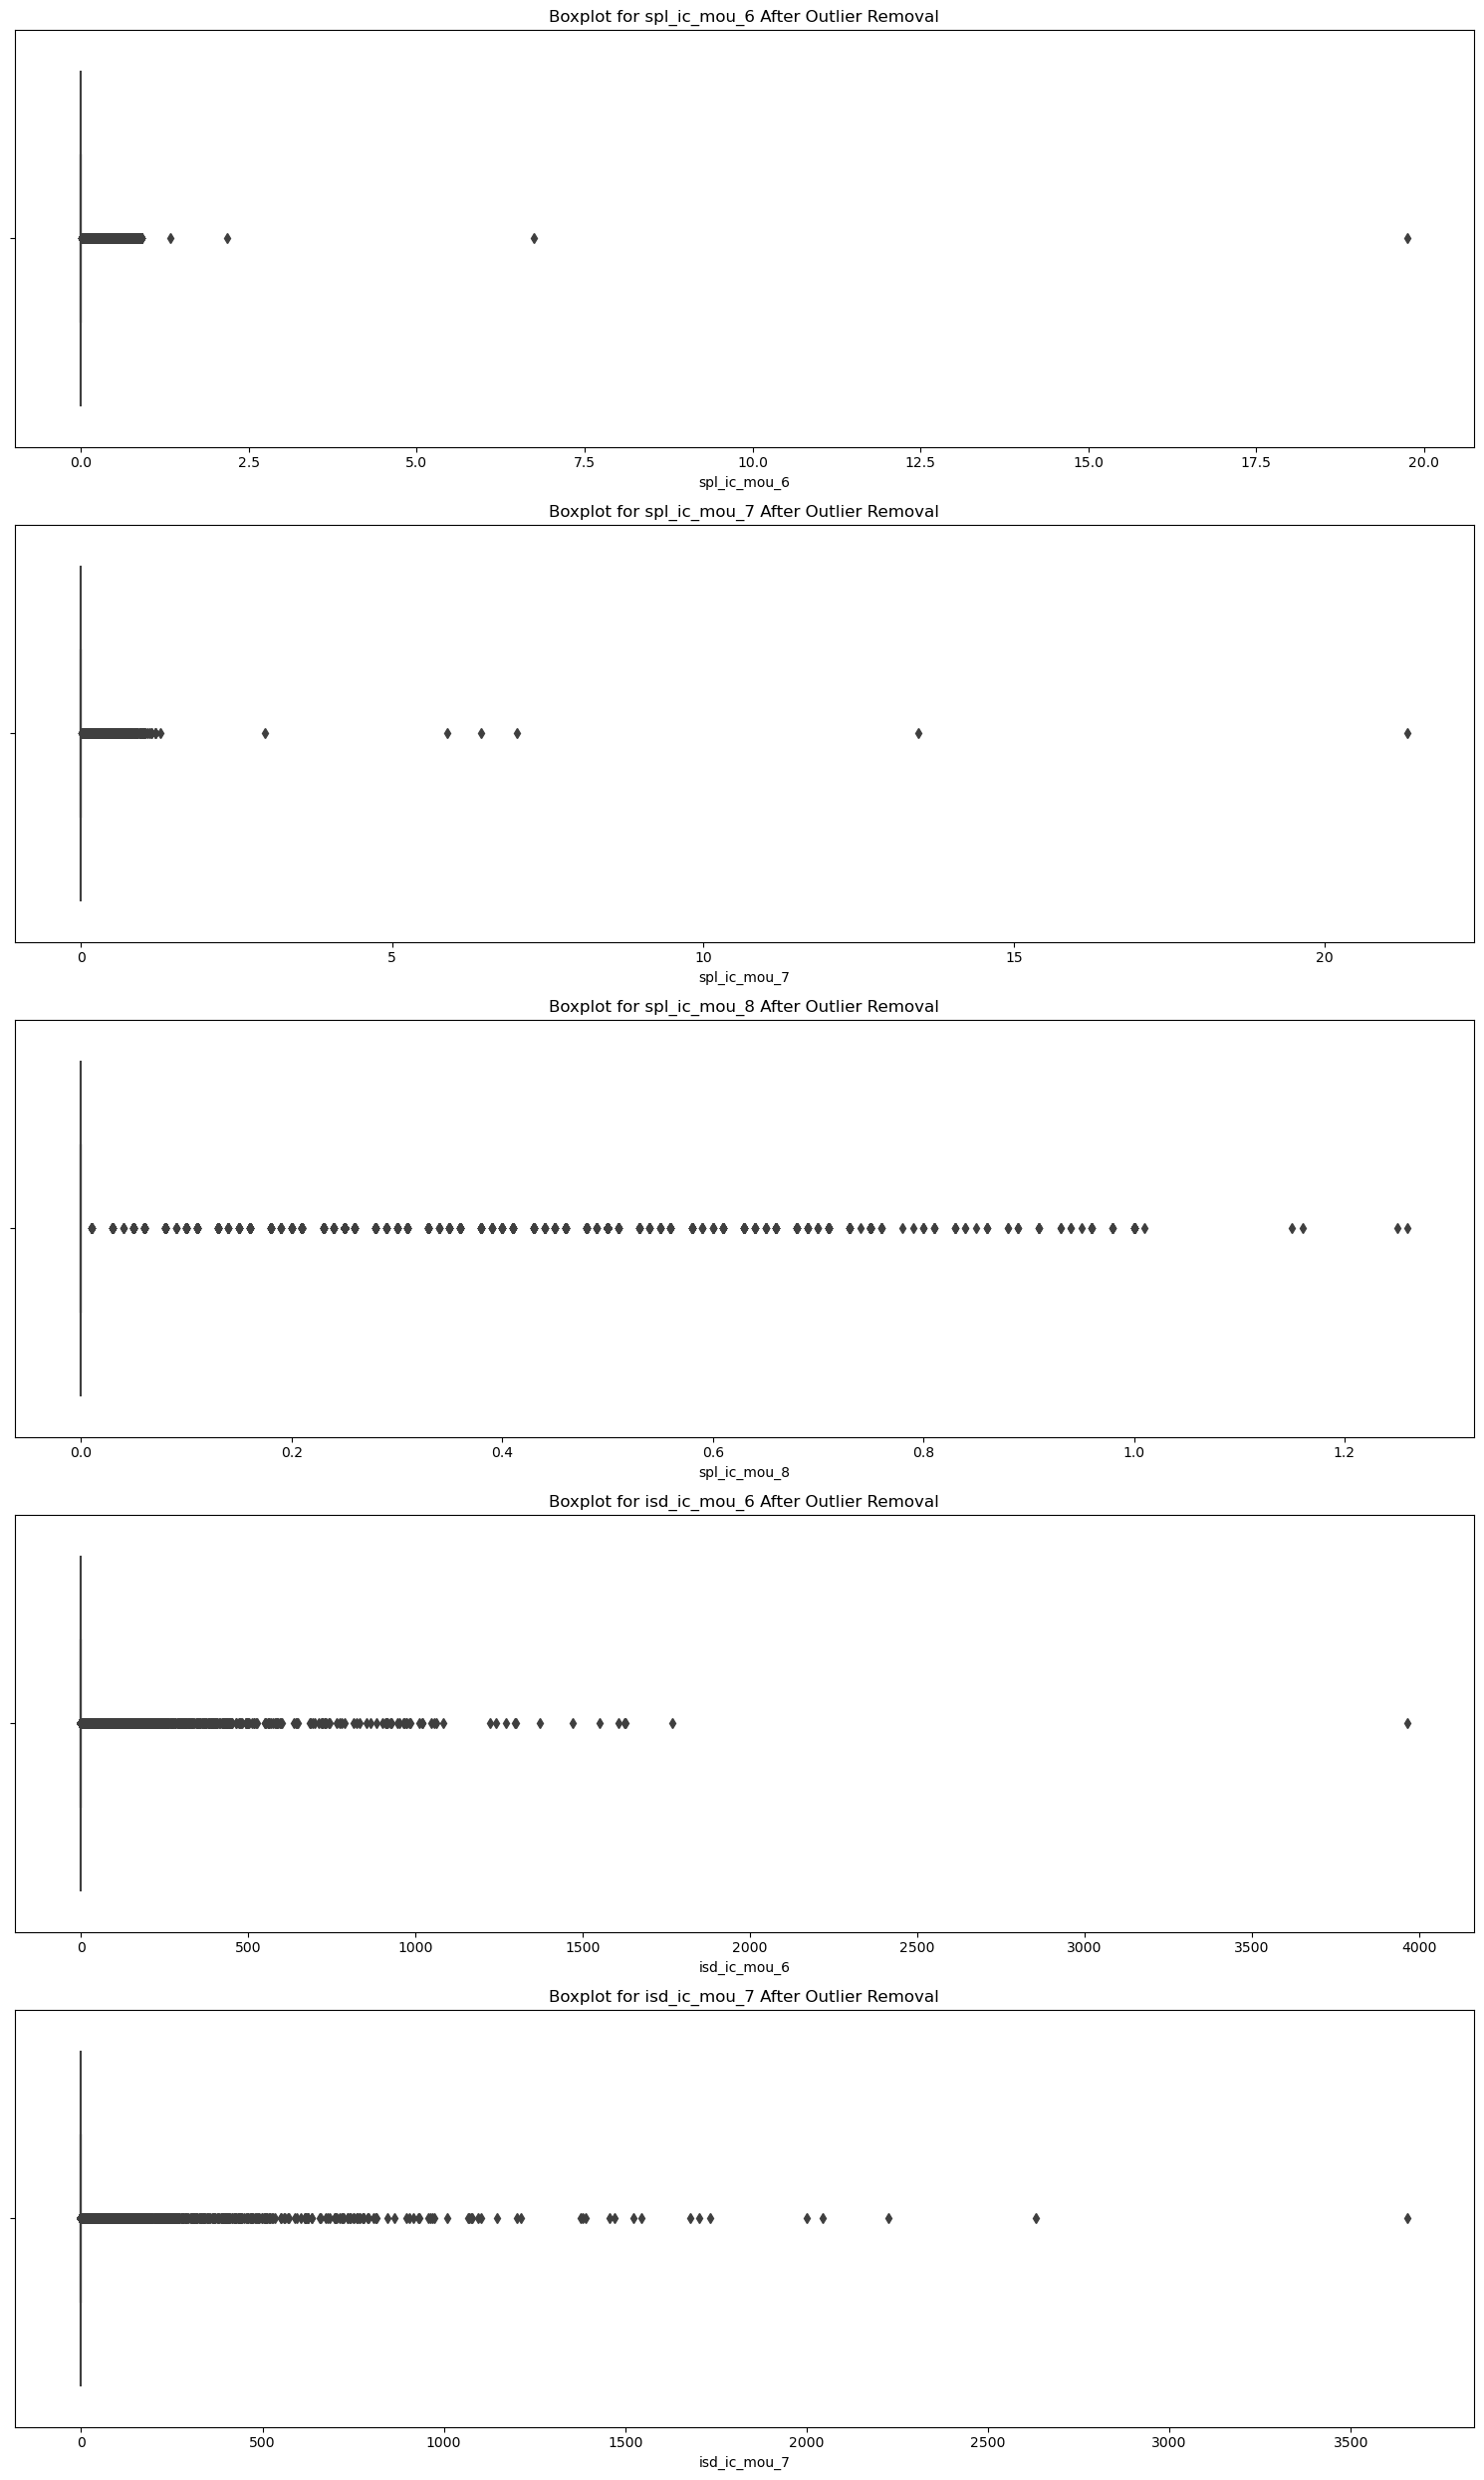

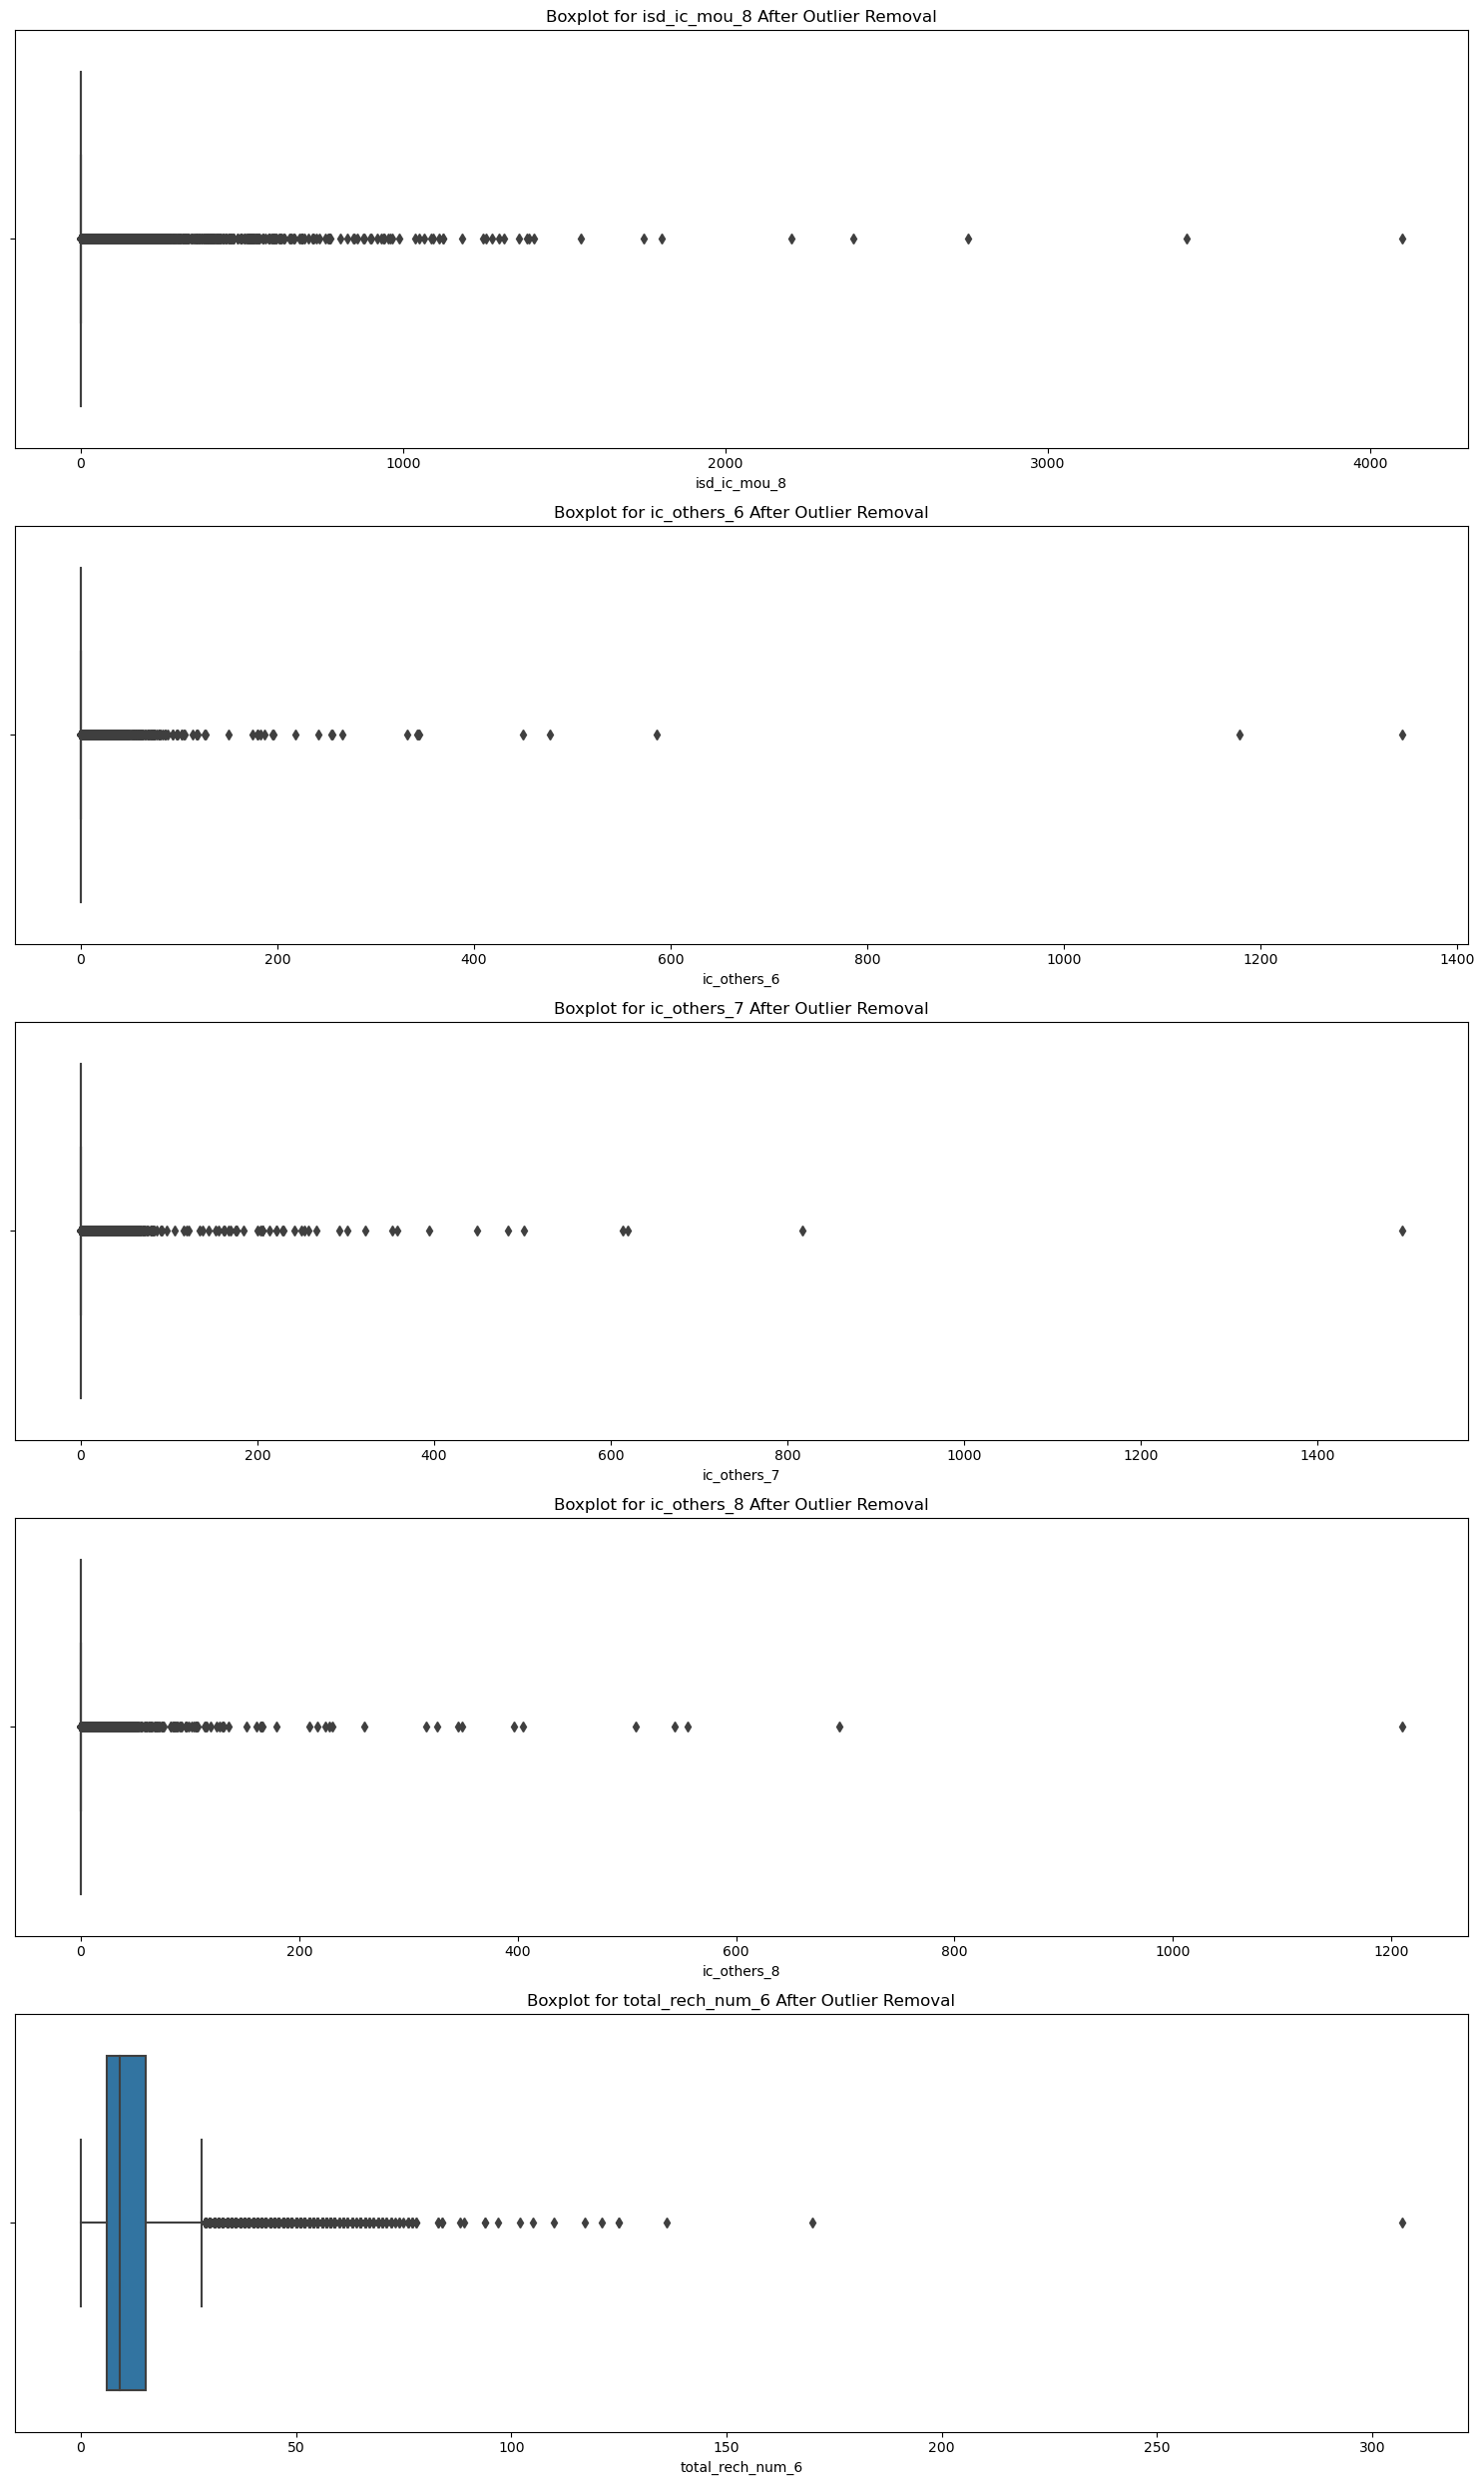

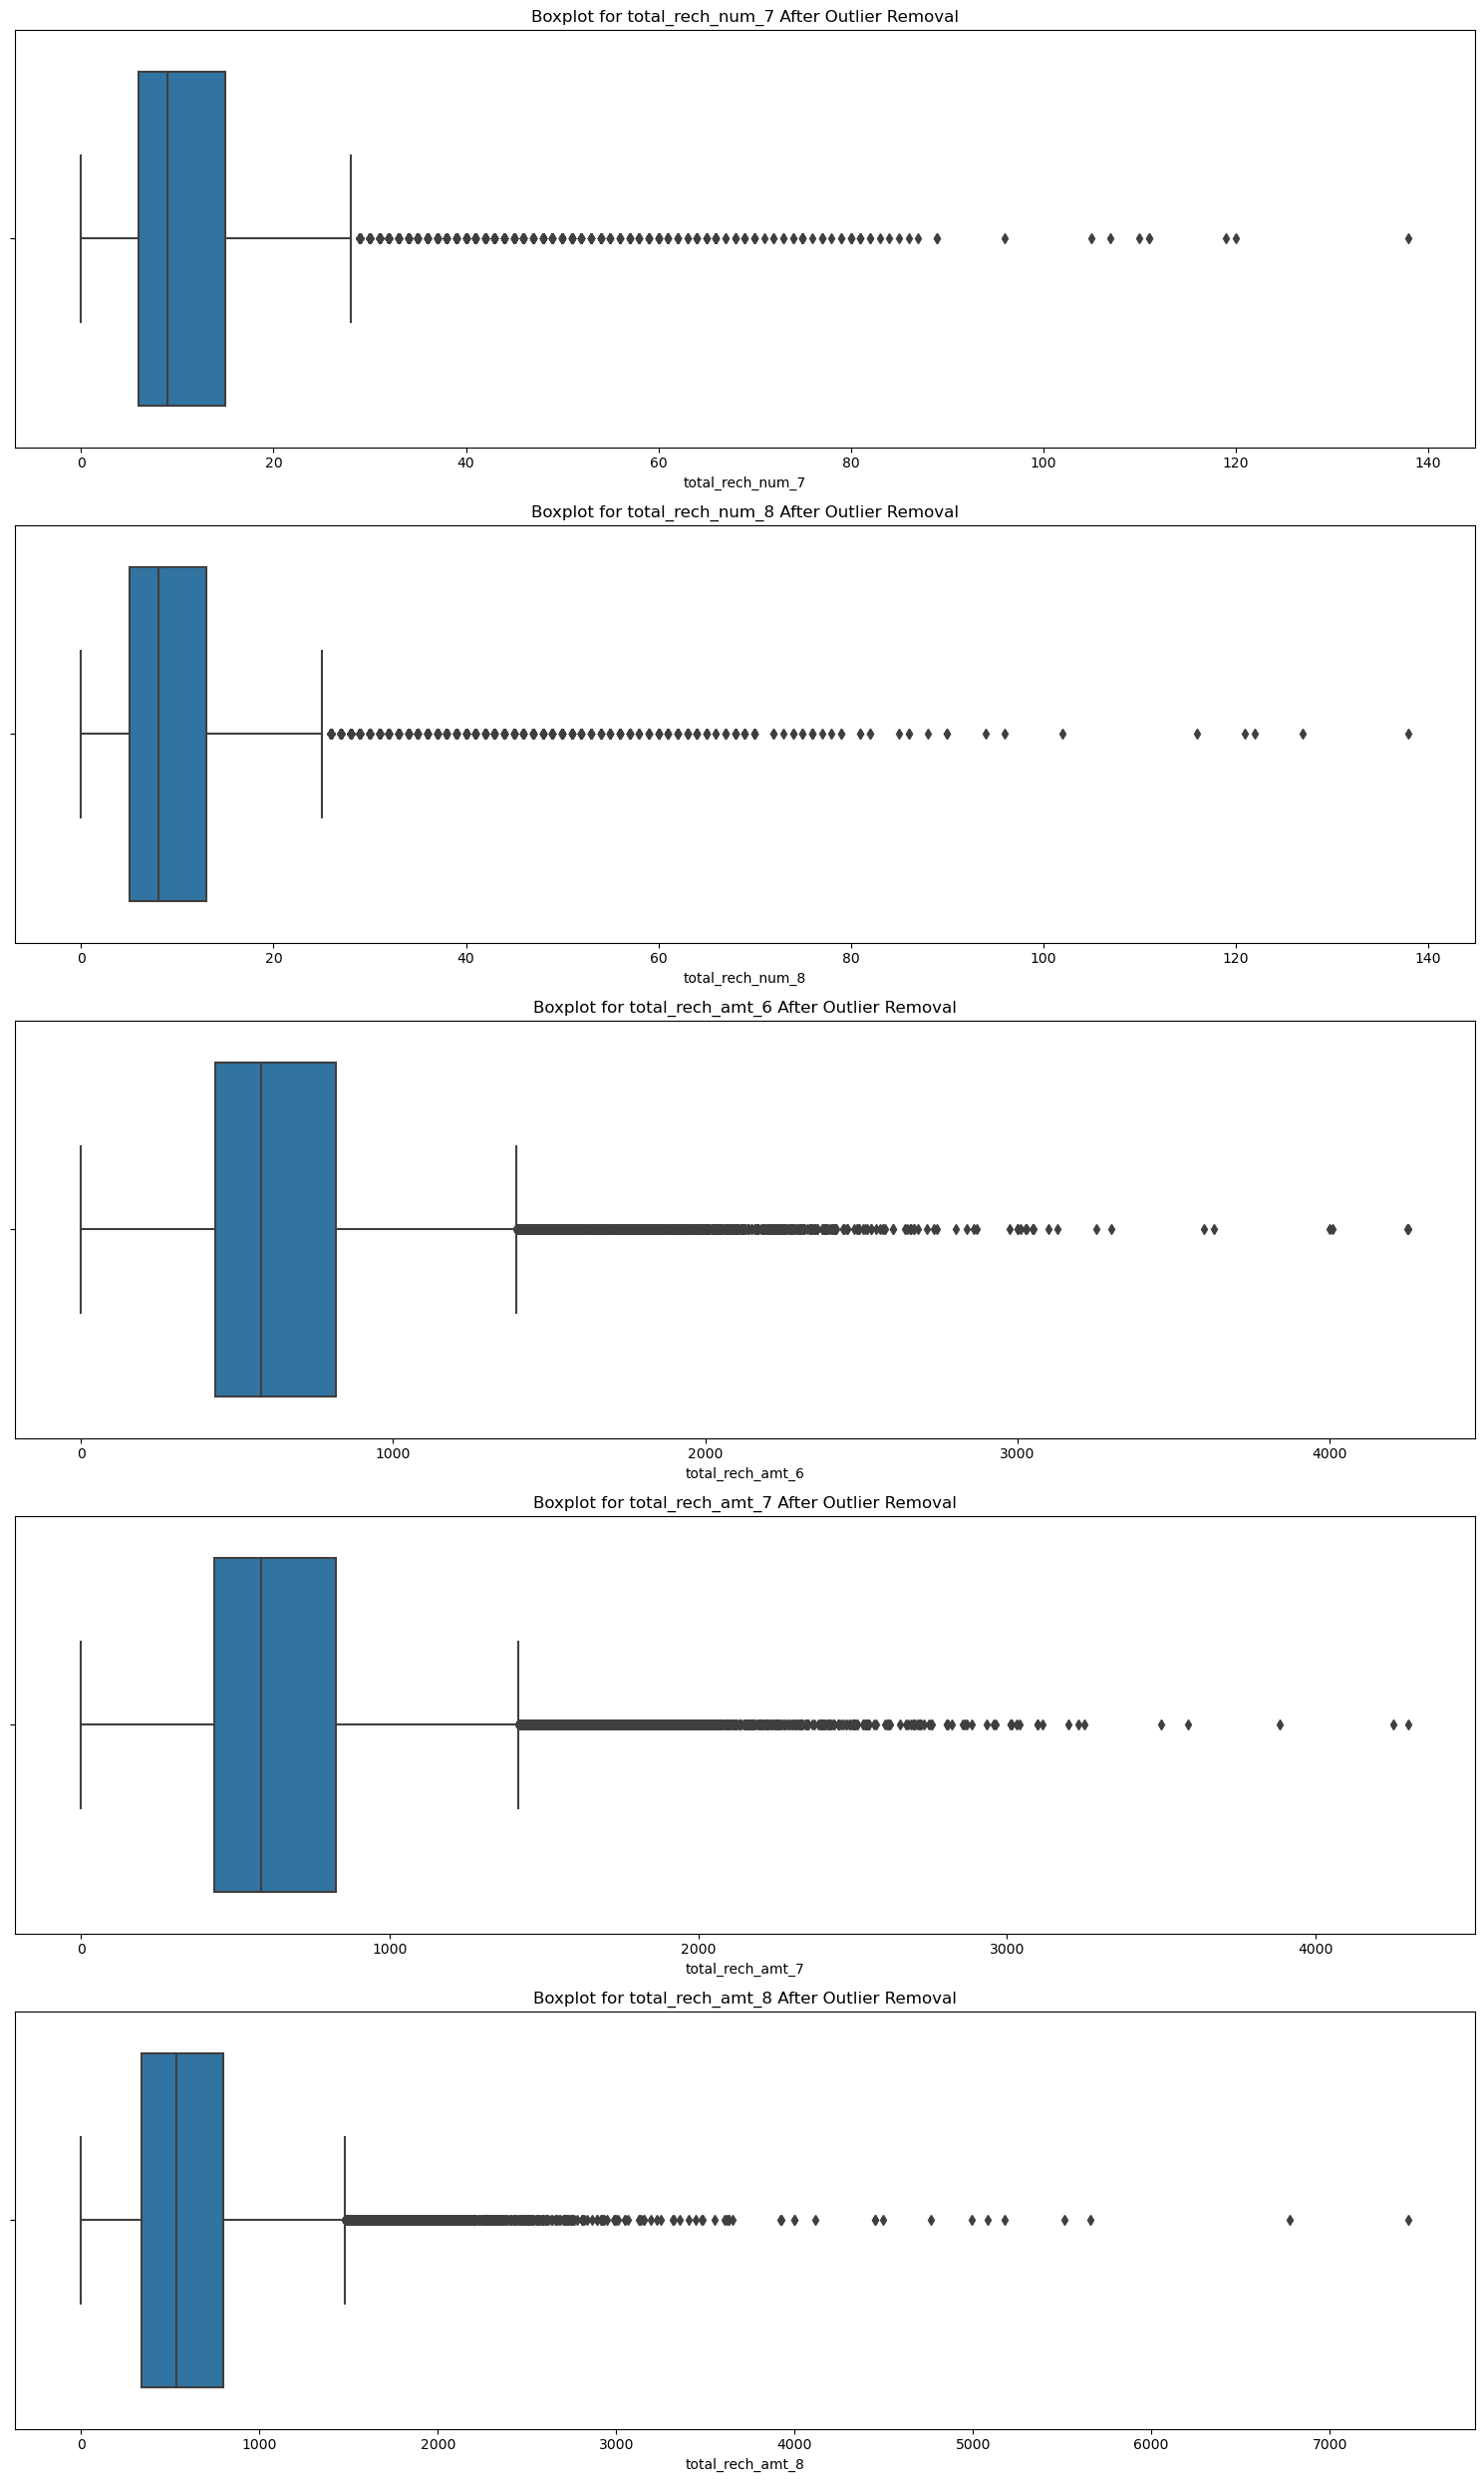

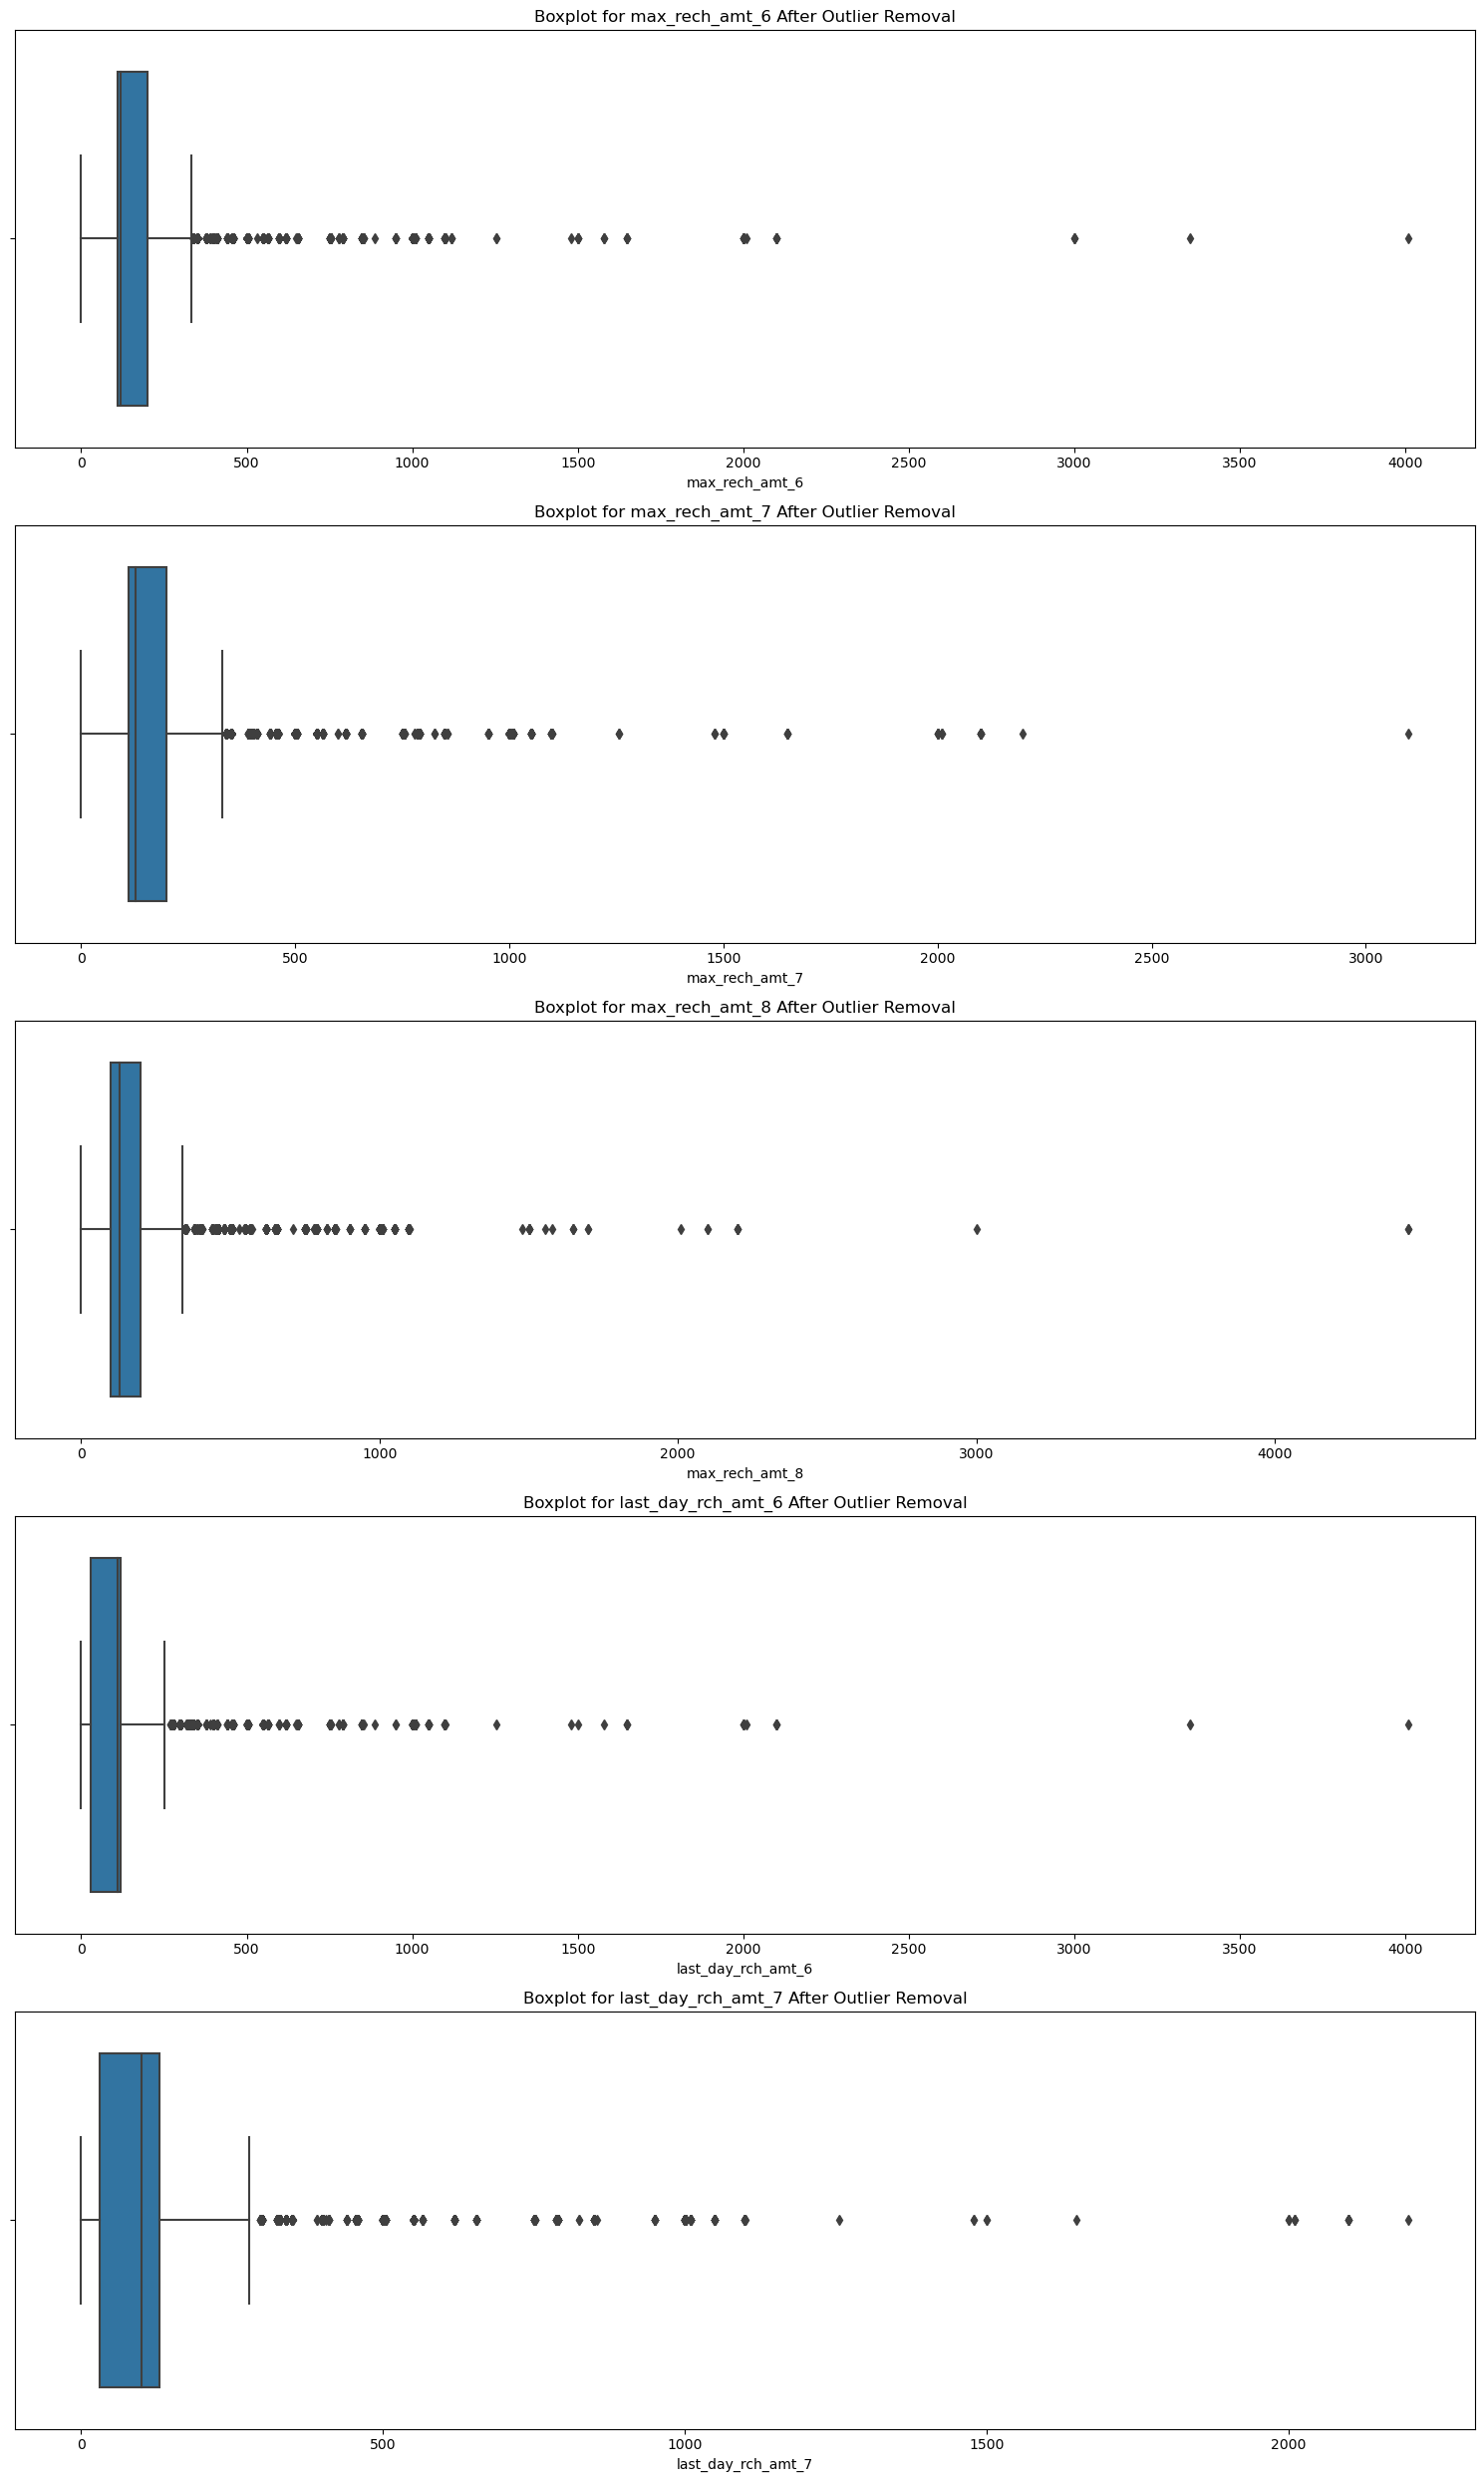

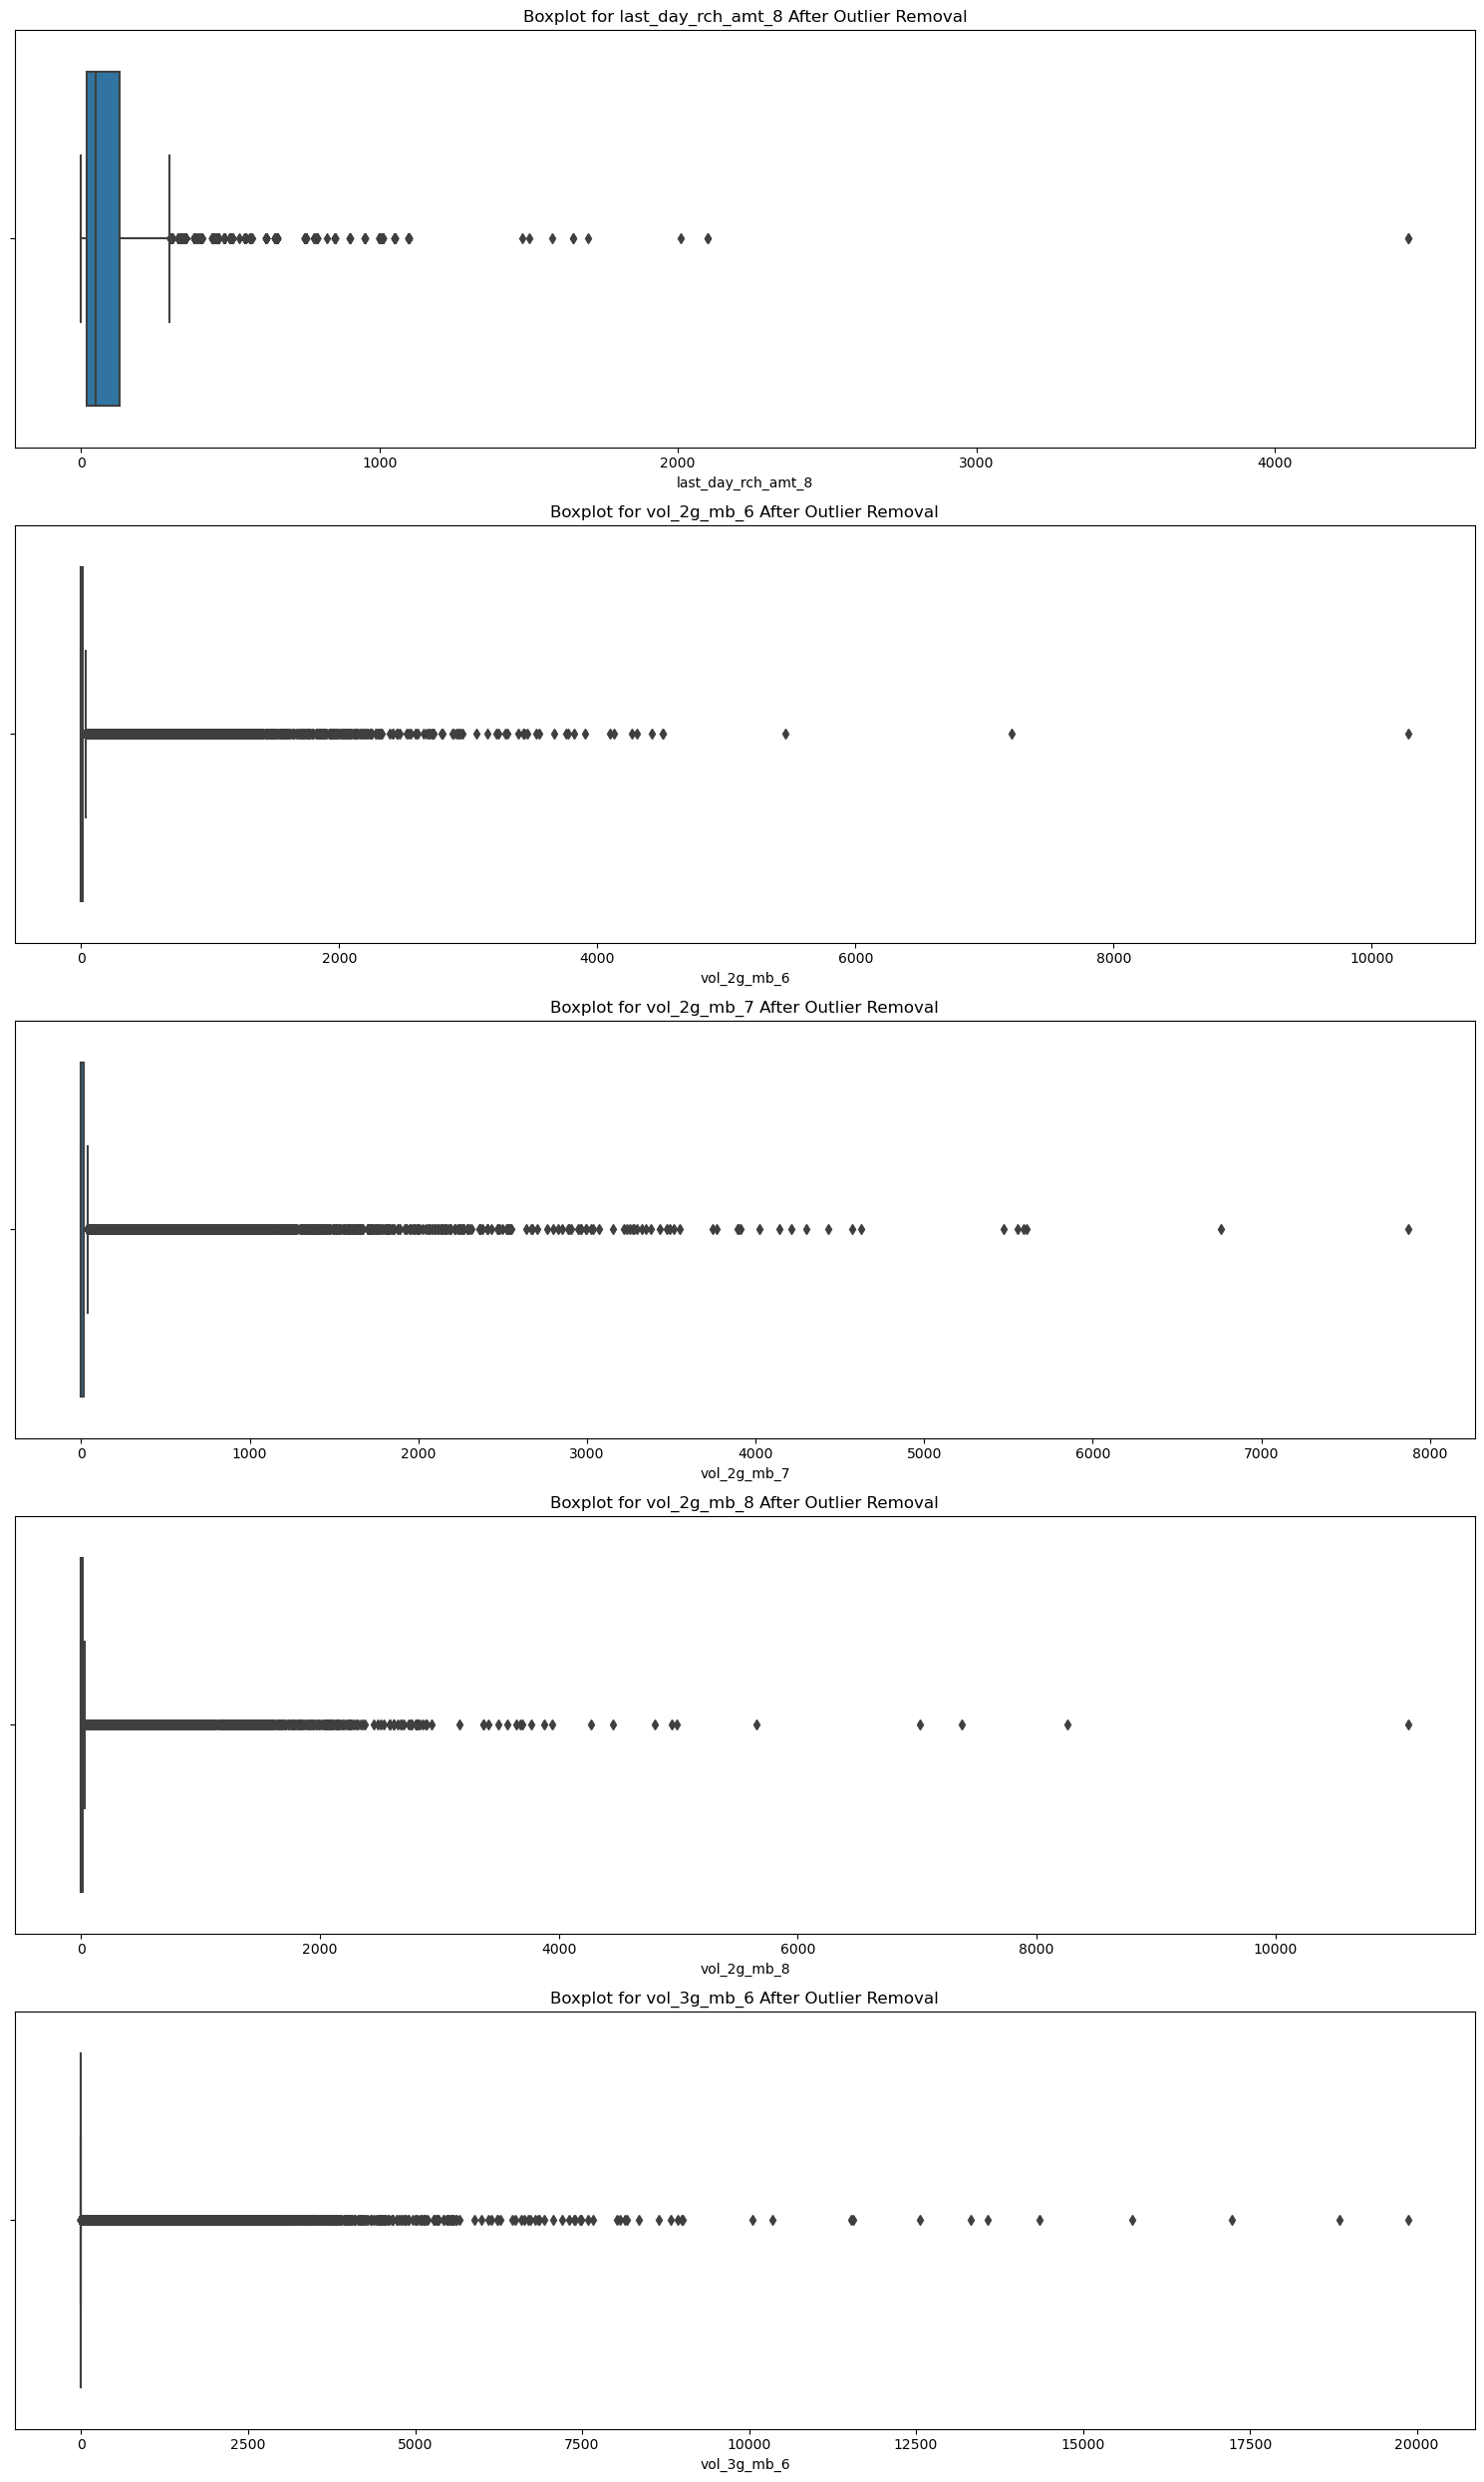

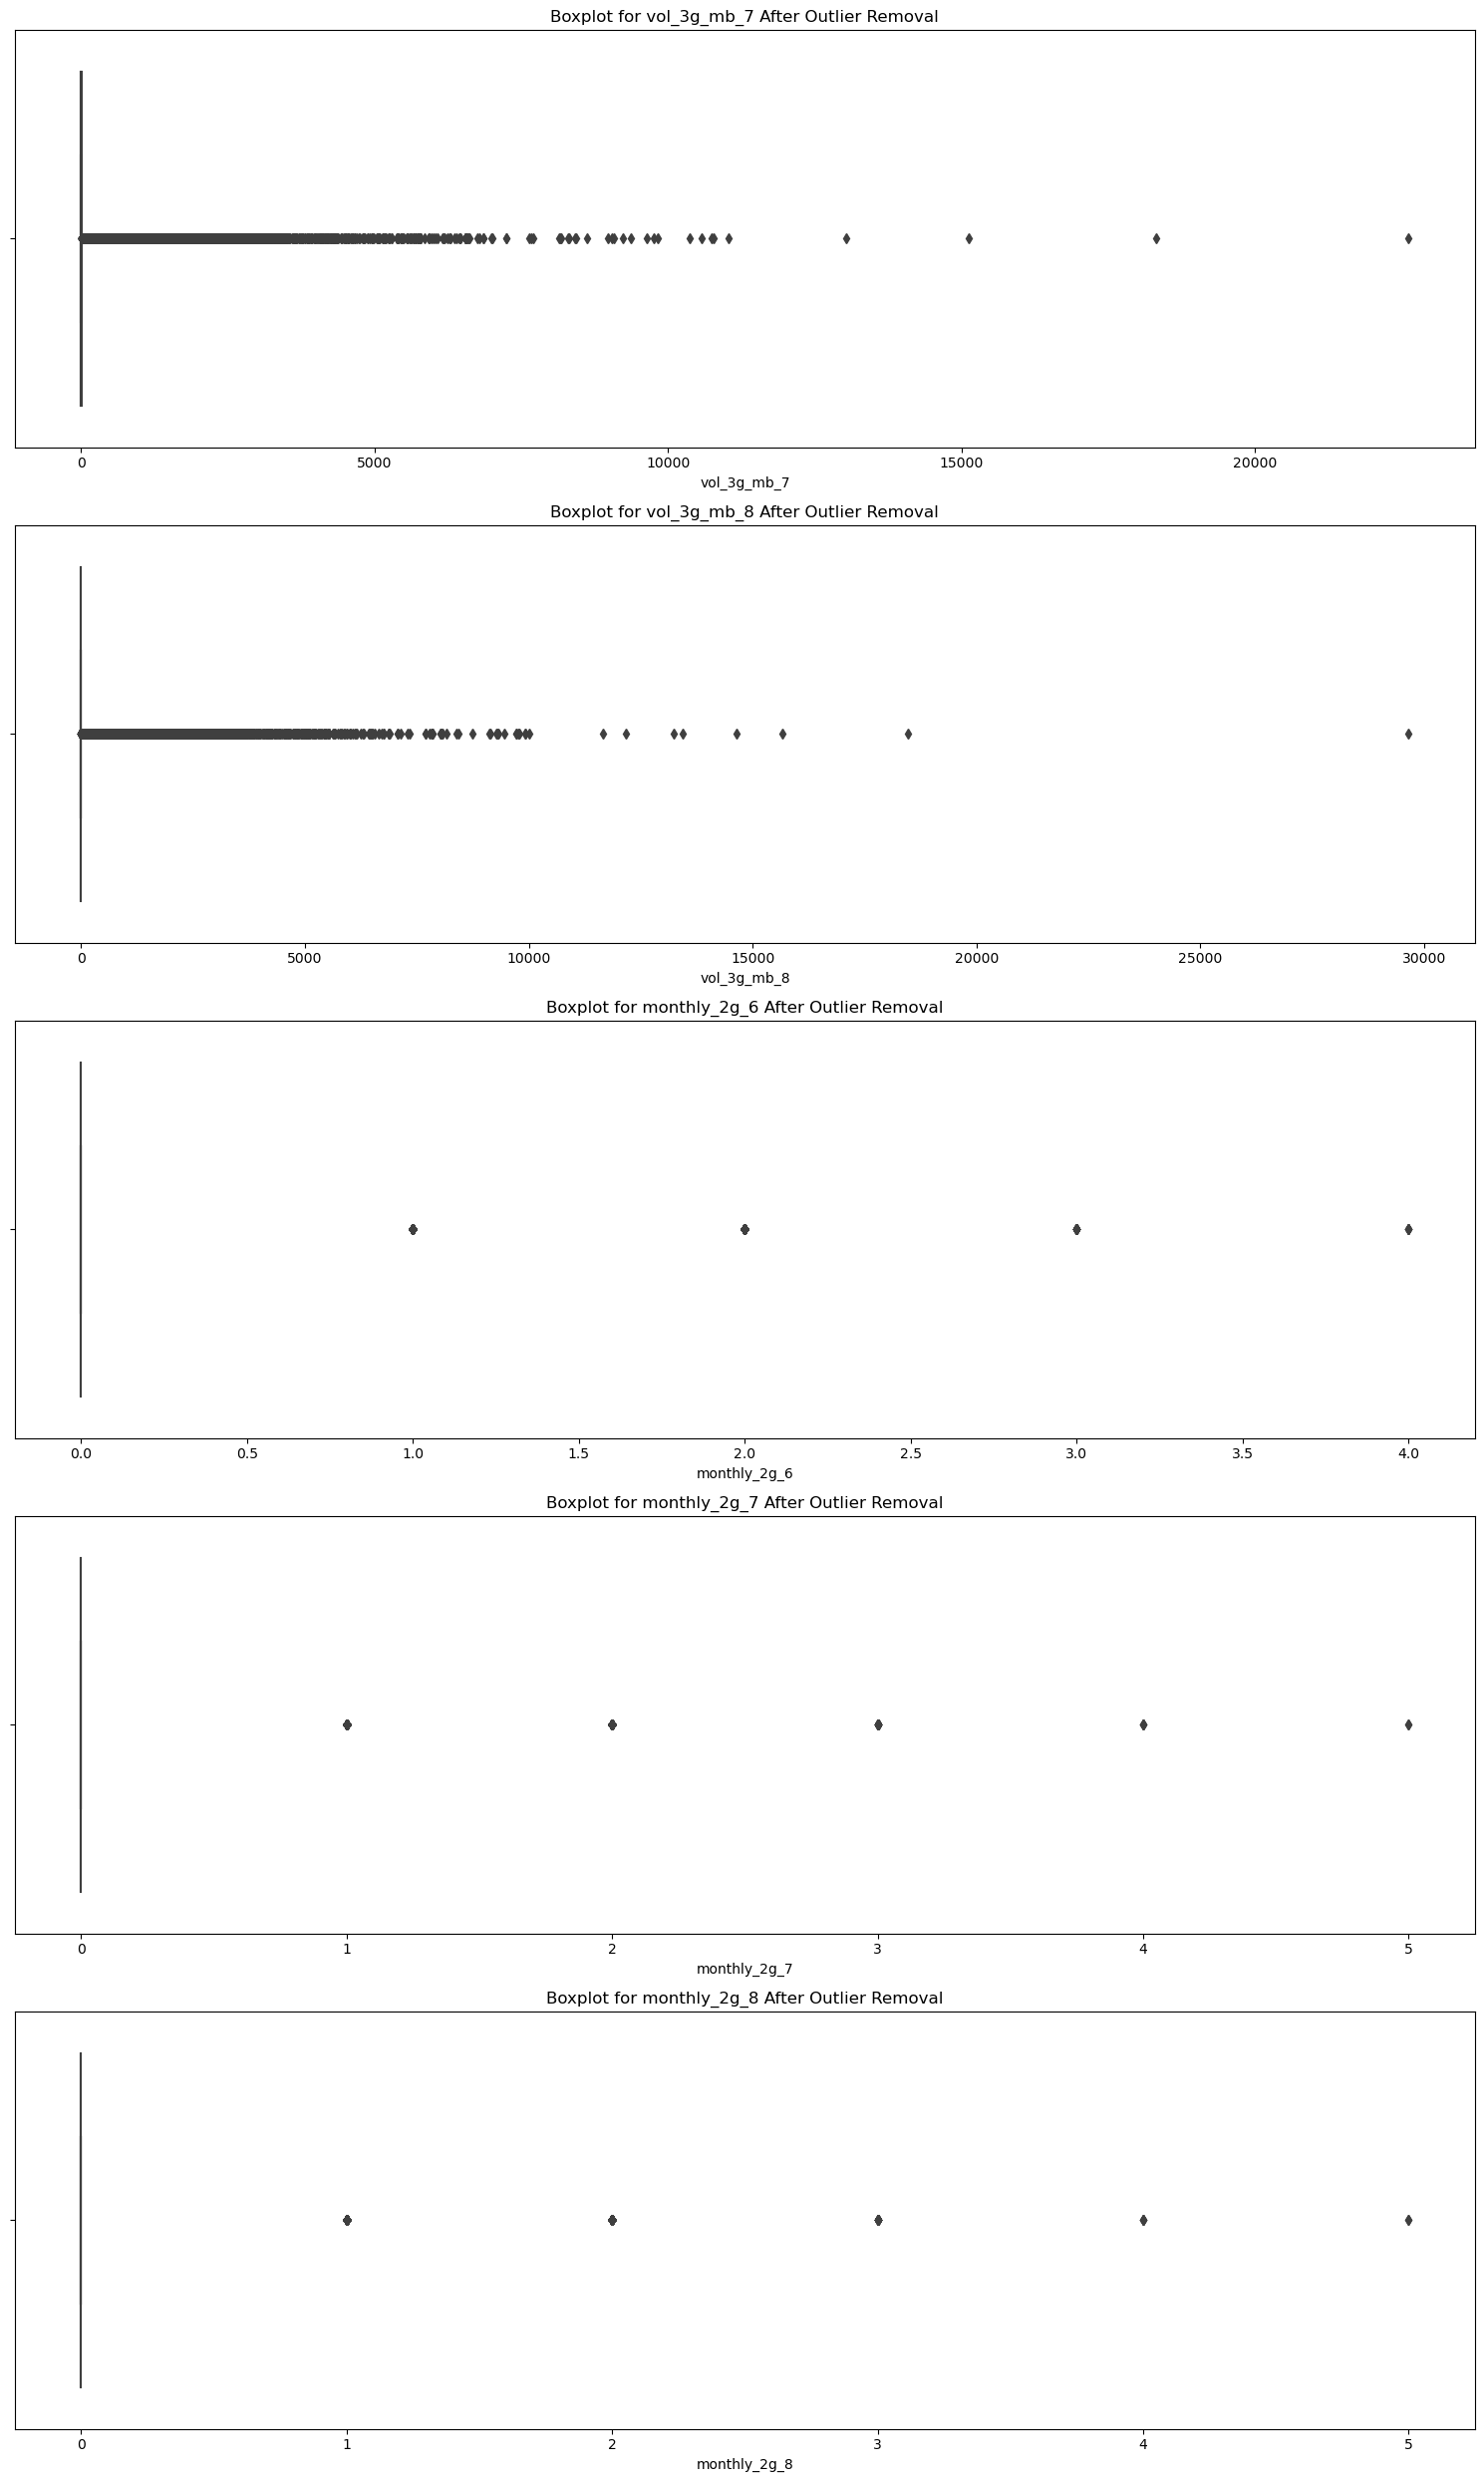

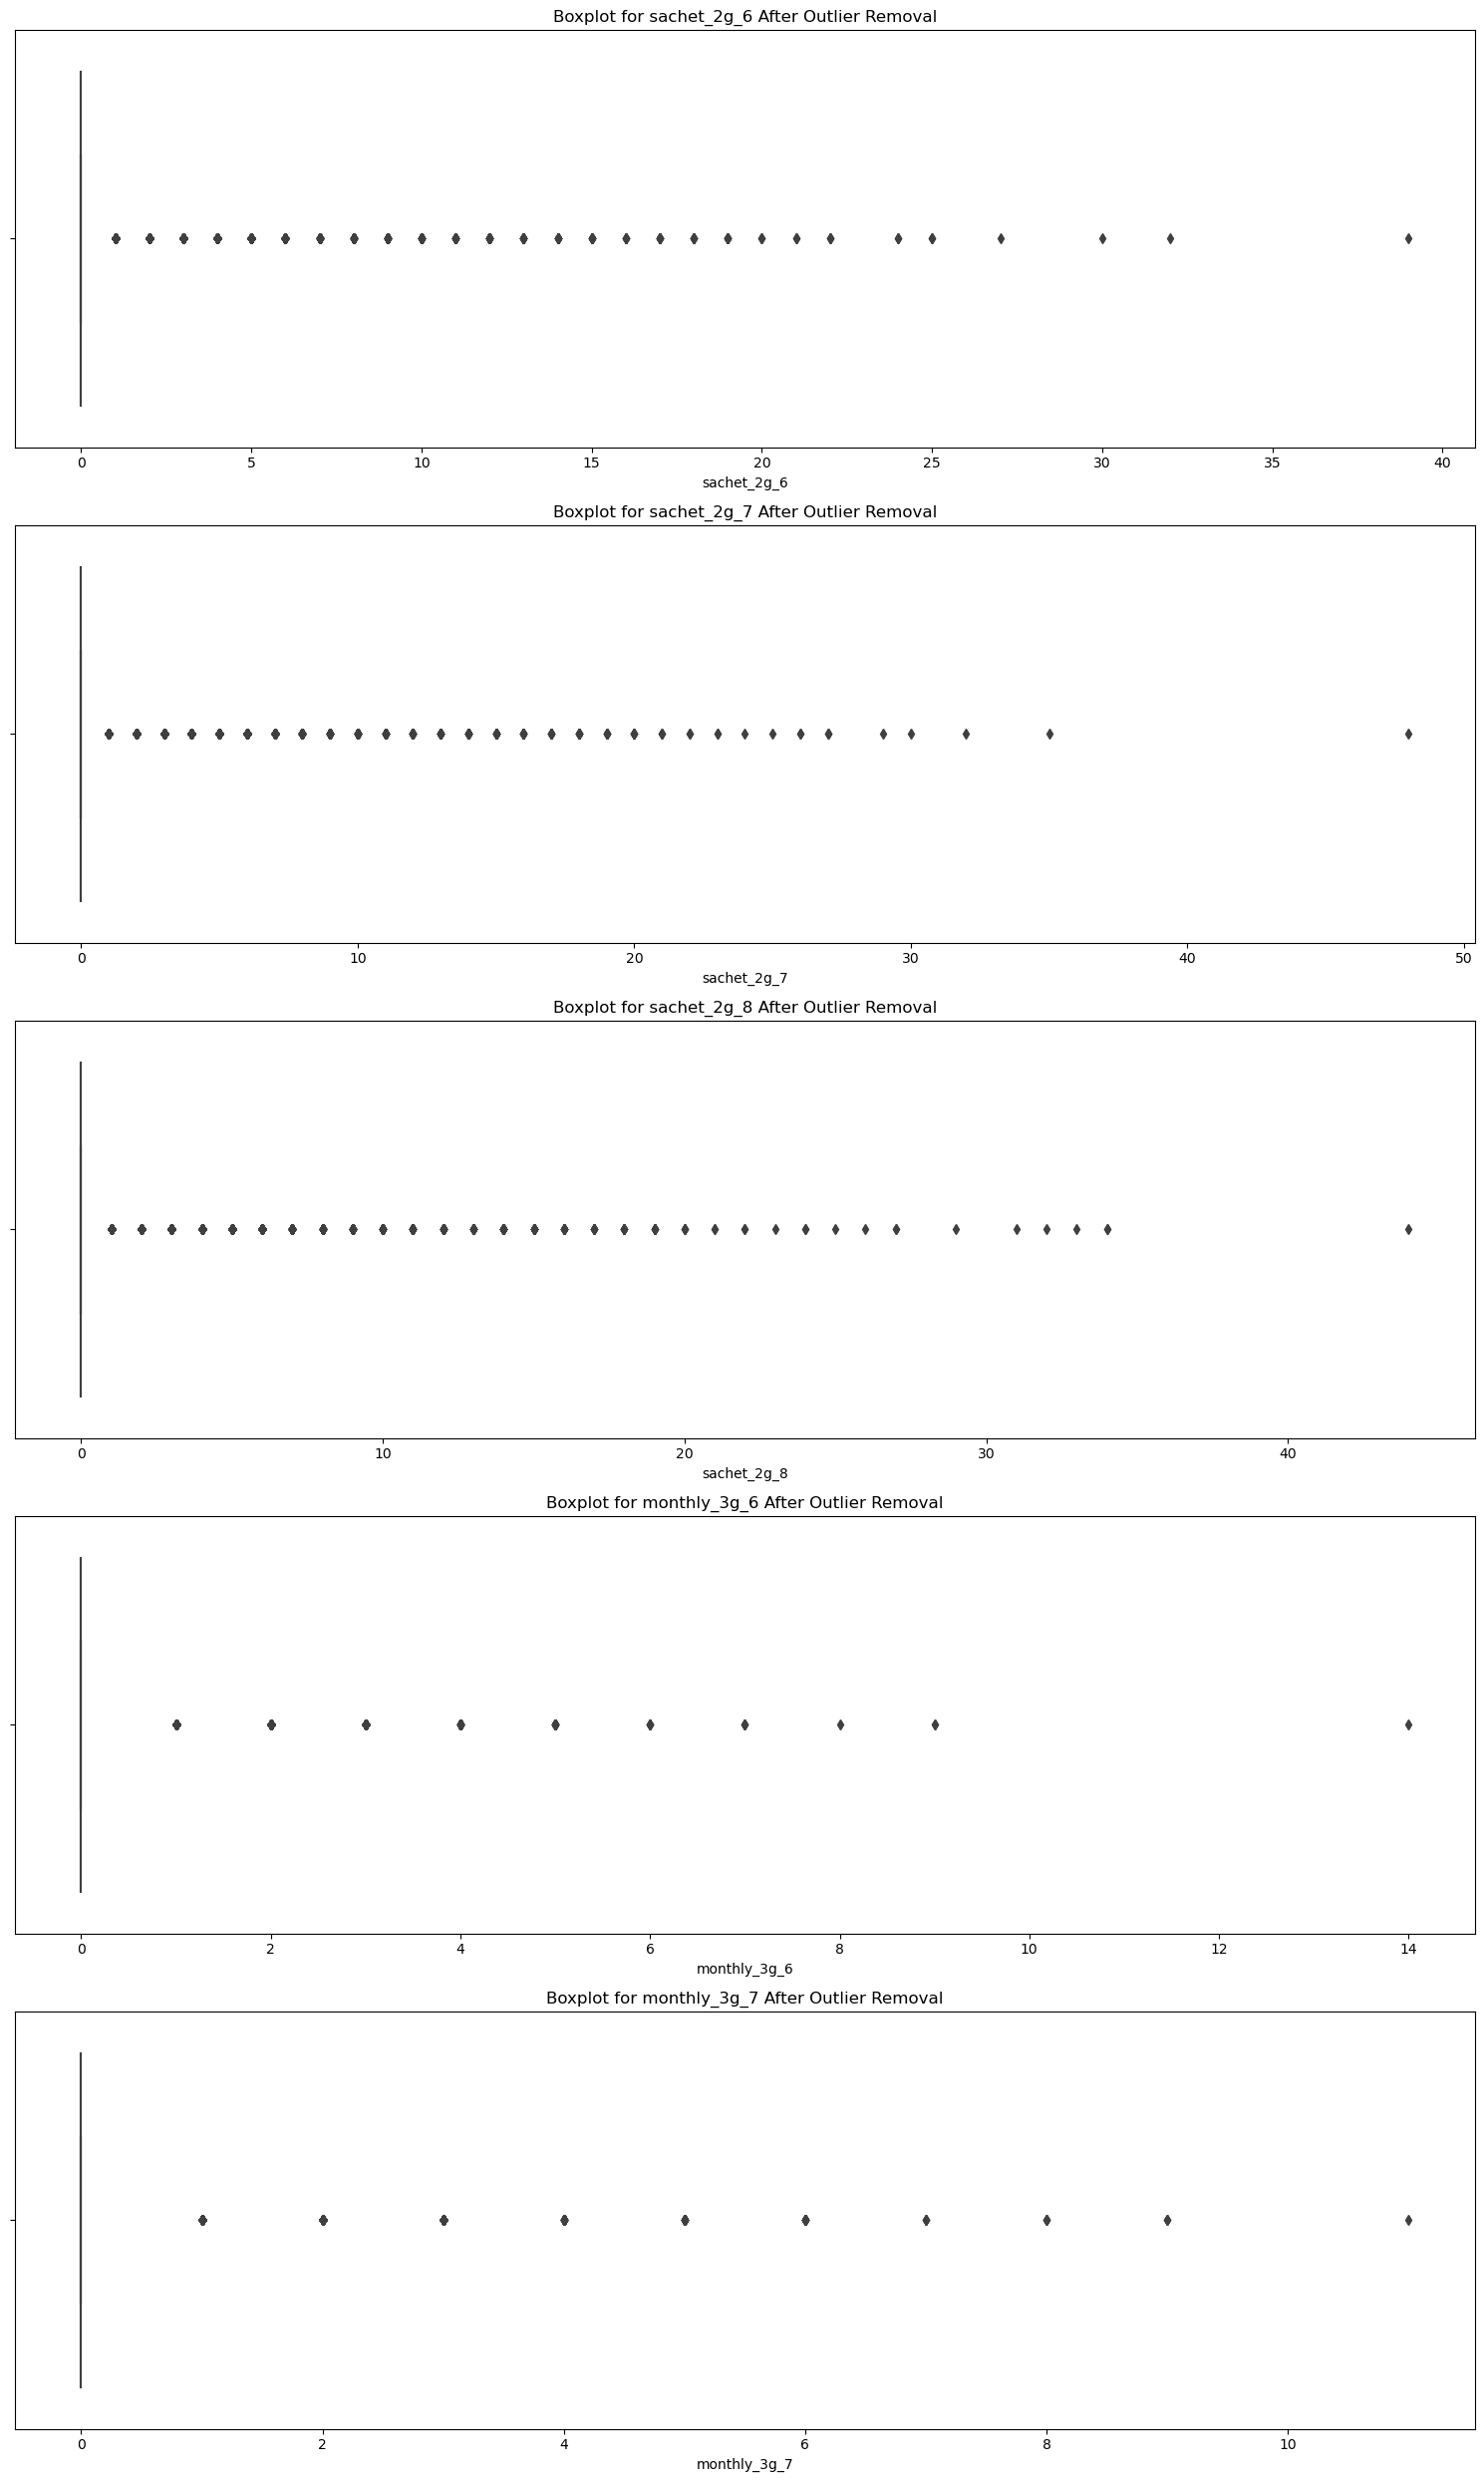

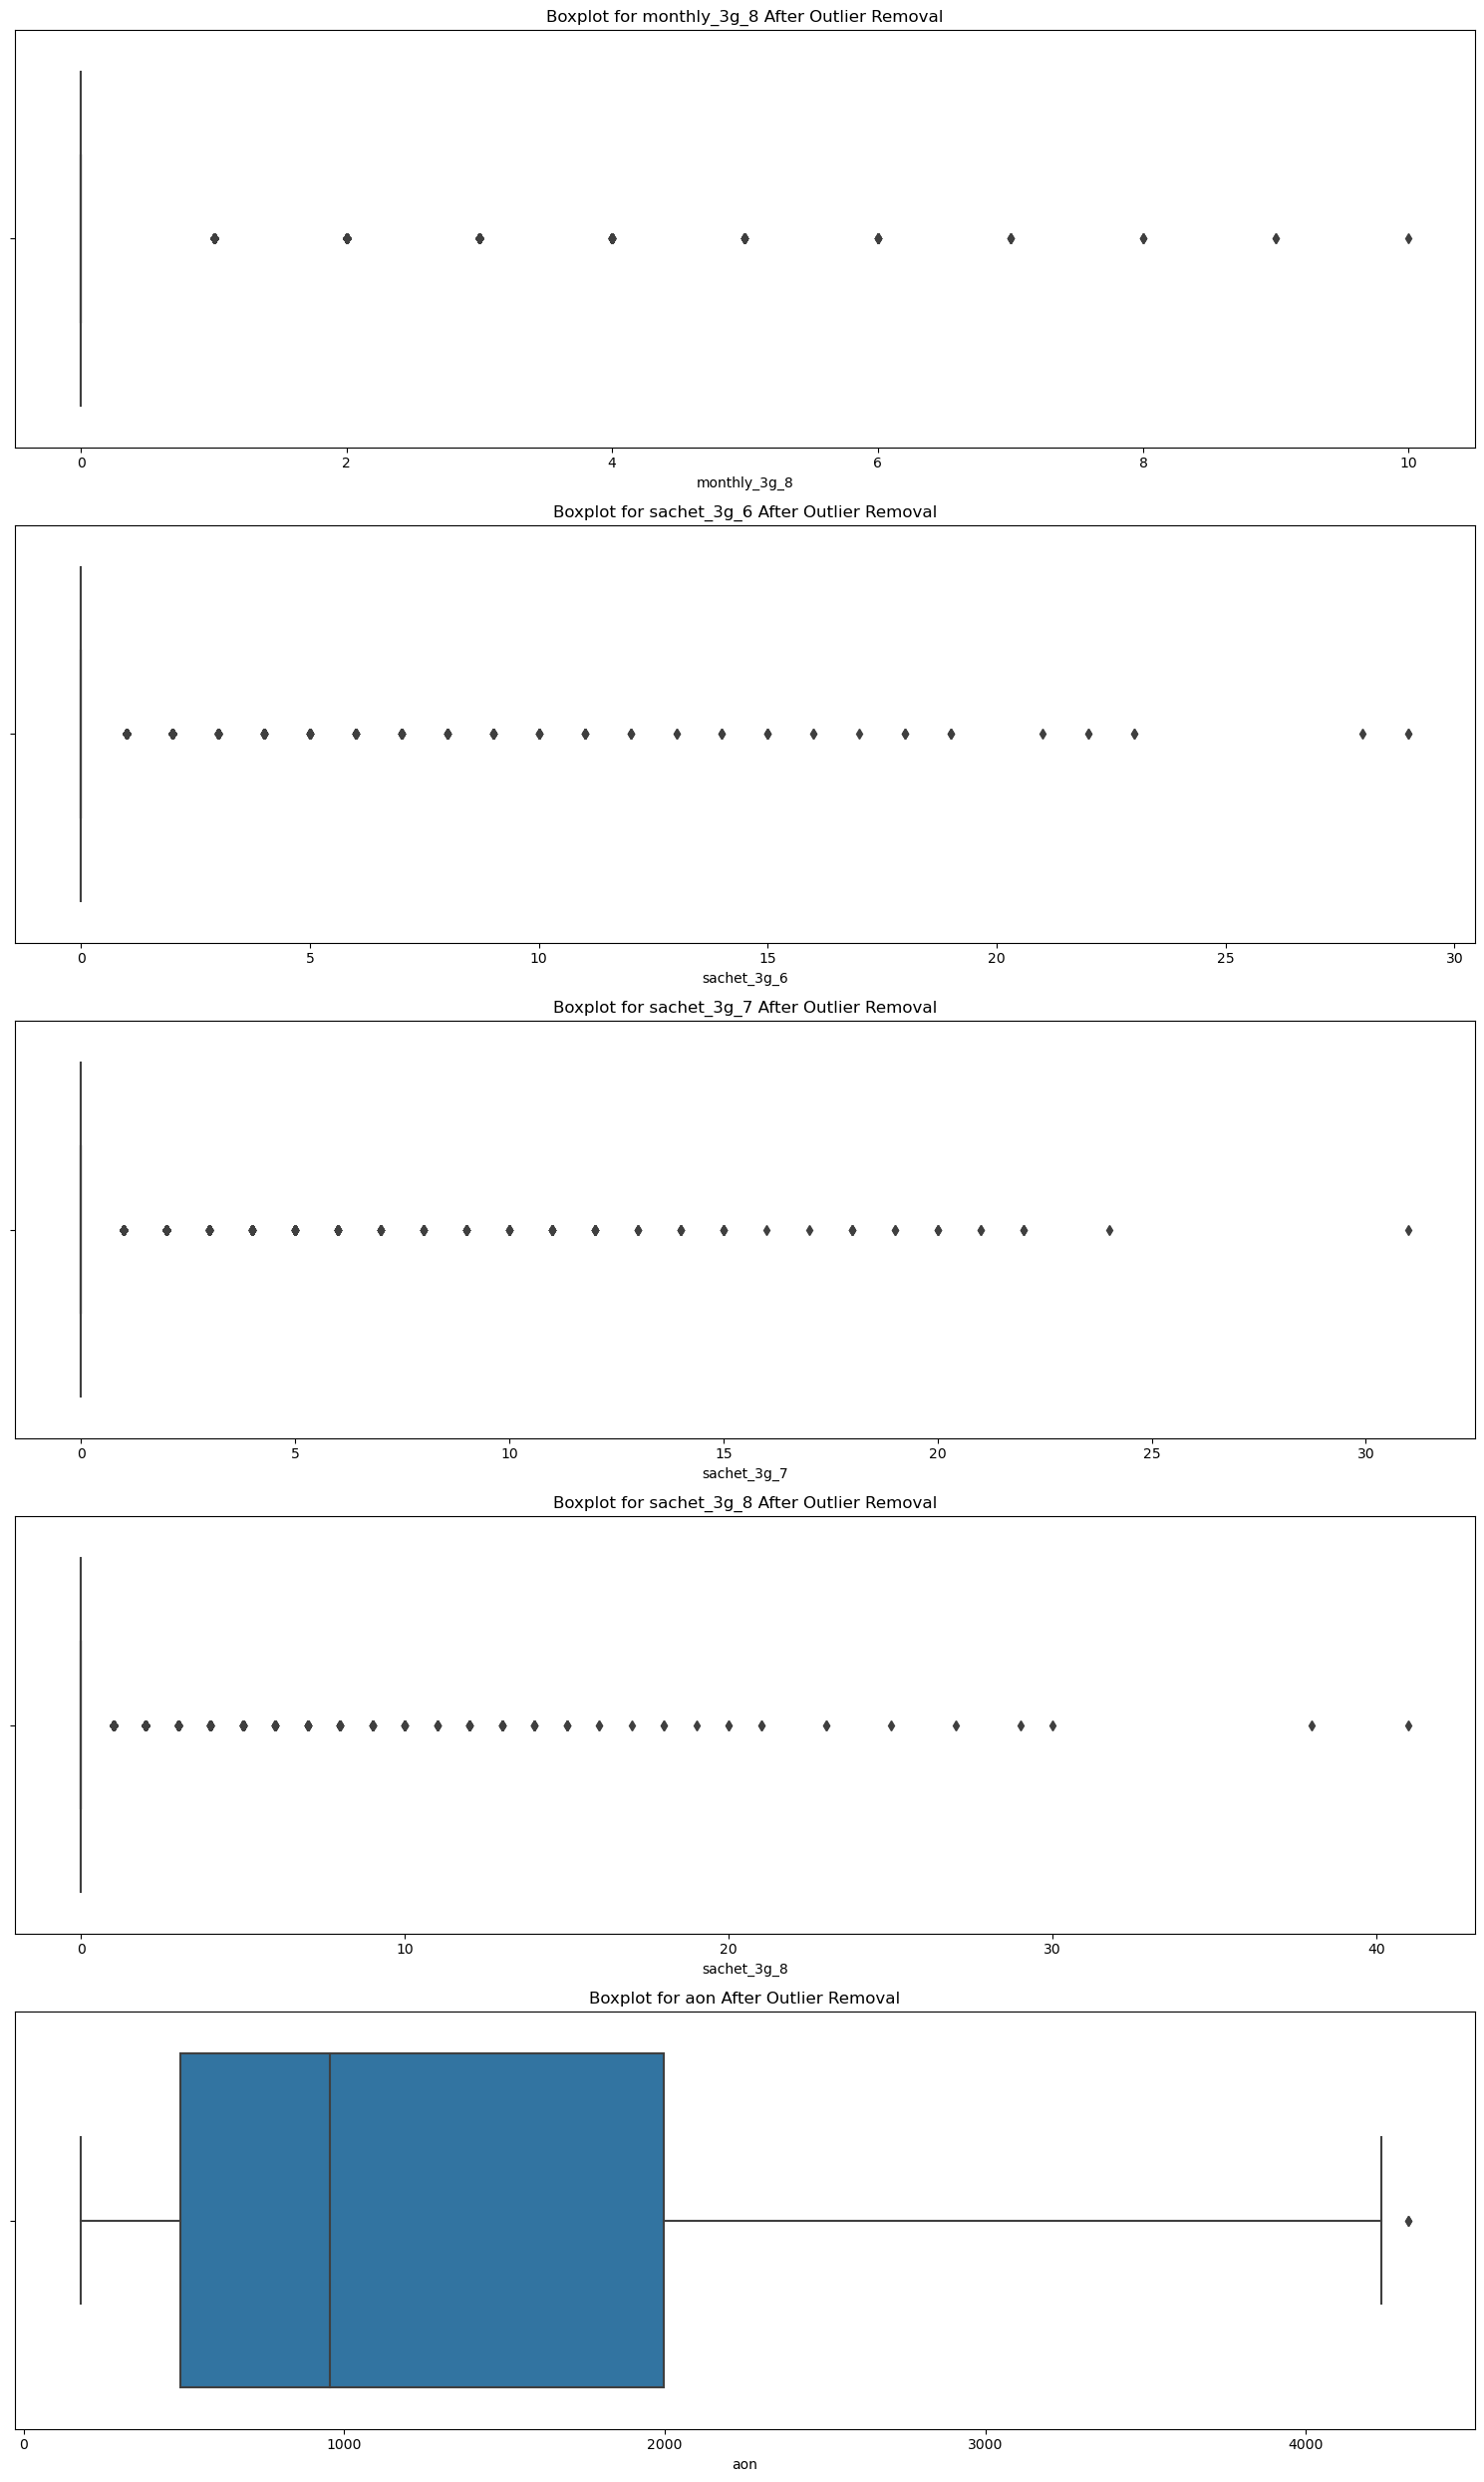

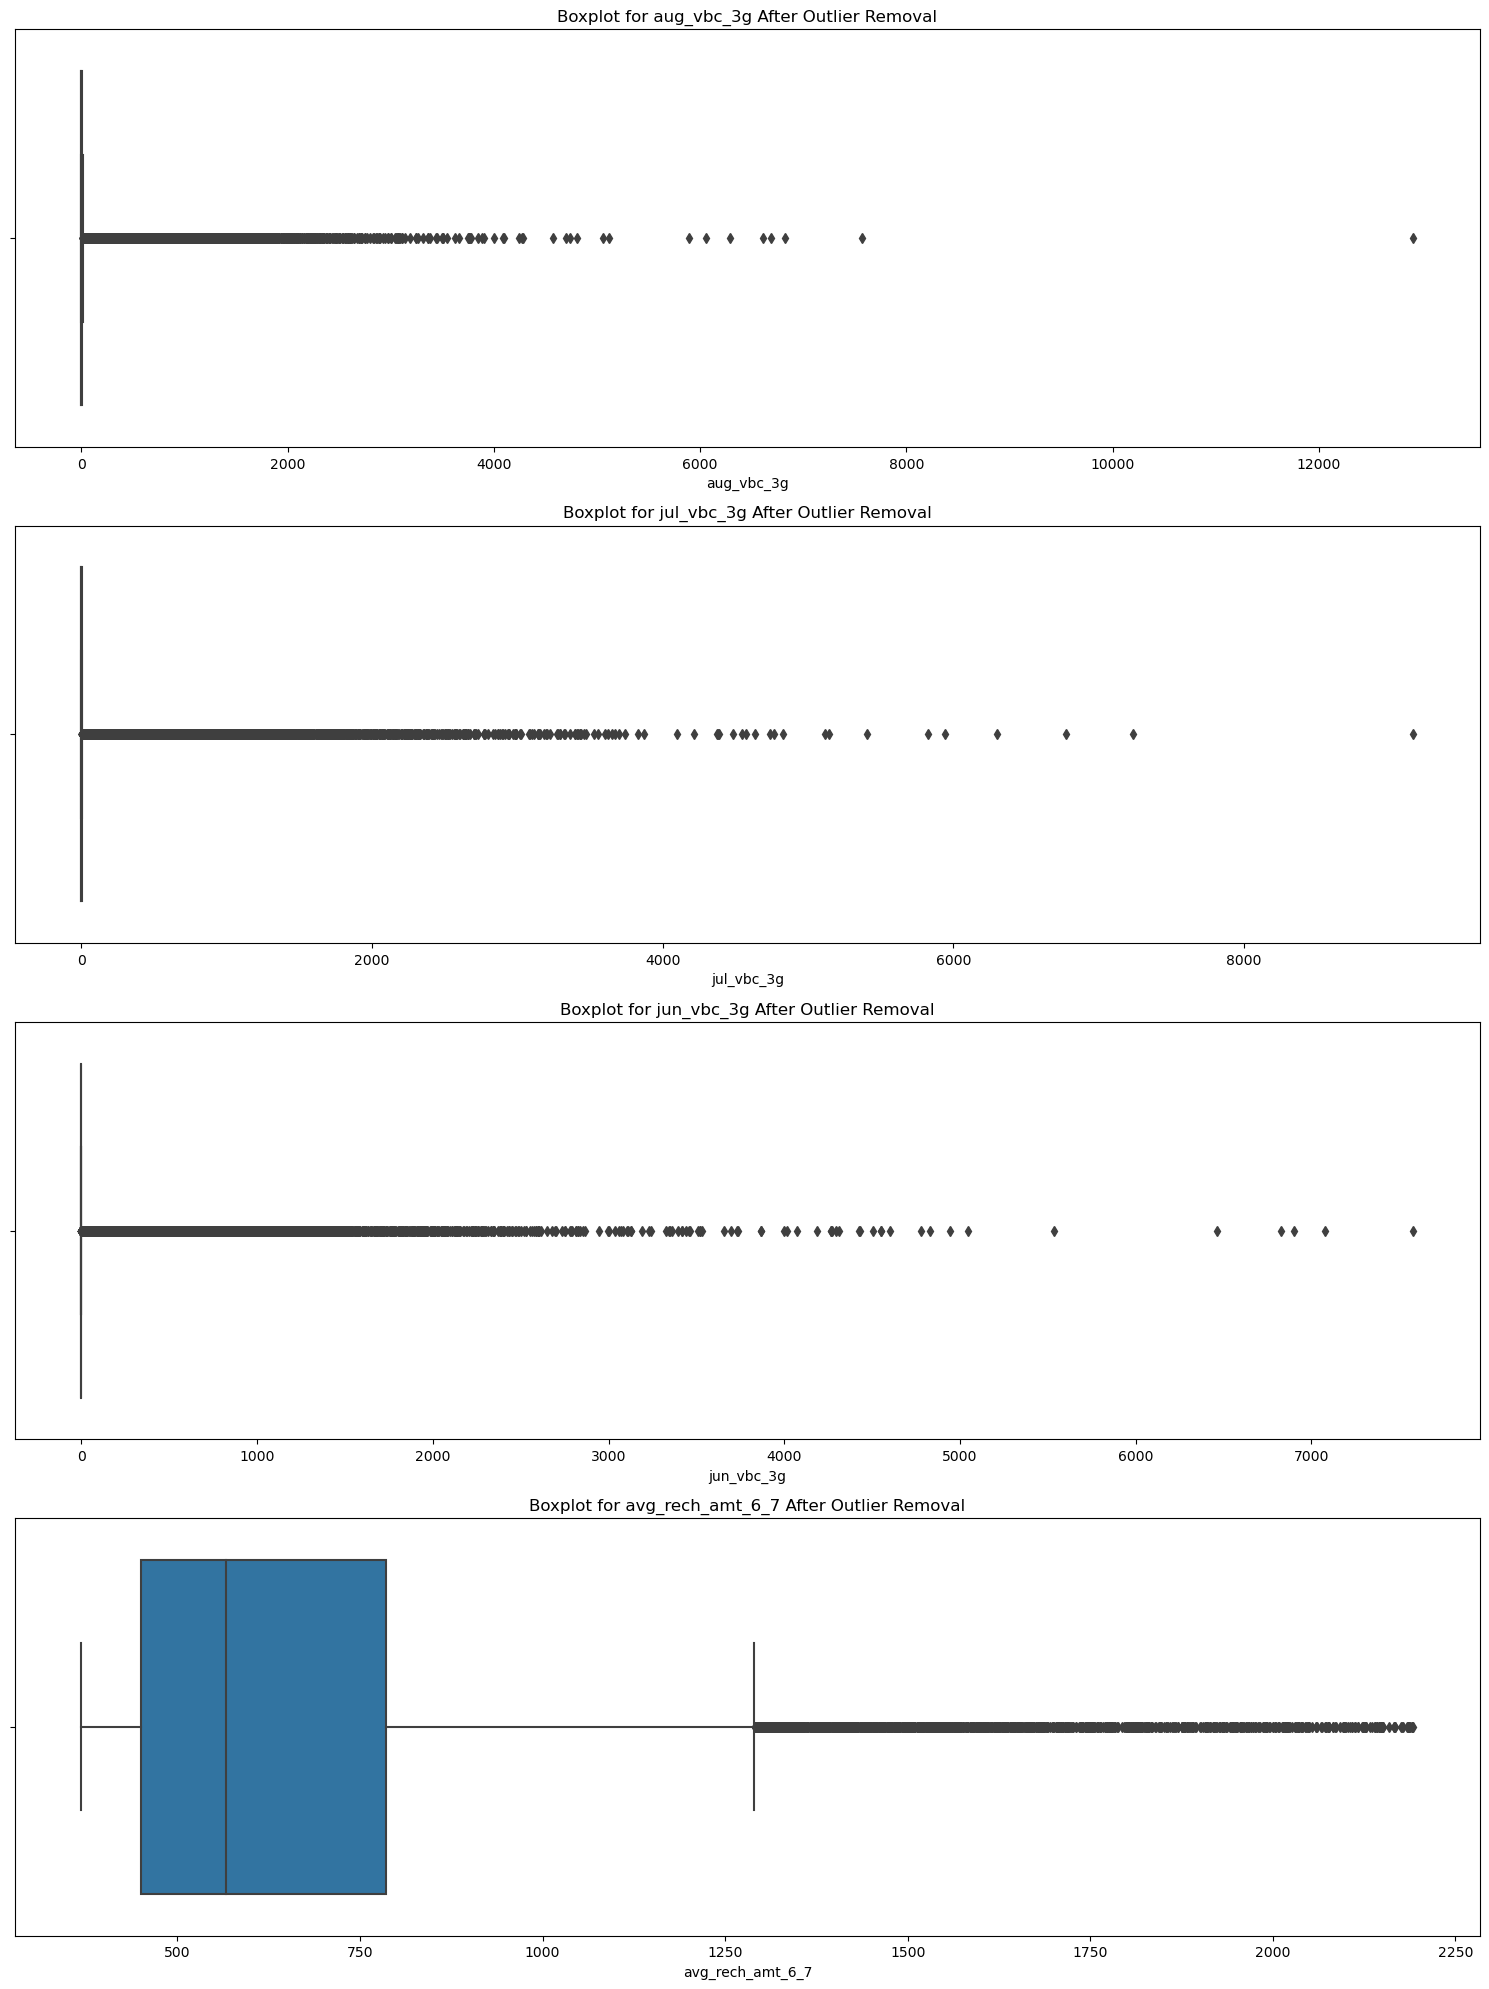

In [60]:
numeric_columns = df.select_dtypes(include=['number']).columns
max_columns_per_figure = 5 
n_total_columns = len(numeric_columns)
for start_idx in range(0, n_total_columns, max_columns_per_figure):
    end_idx = min(start_idx + max_columns_per_figure, n_total_columns)
    subset_columns = numeric_columns[start_idx:end_idx]
    plt.figure(figsize=(15, len(subset_columns) * 5))
    
    for i, col in enumerate(subset_columns):
        plt.subplot(len(subset_columns), 1, i + 1)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col} After Outlier Removal')
    plt.tight_layout()
    plt.show()


In [61]:
# List the columns containing 'total'
total_columns = [col for col in df.columns.to_list() if 'total' in col]
total_columns

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Good phase Analysis which is month 6 June
Decresing the total_mou by consolidating both the columns for incoming and outgoing



In [62]:
df['total_mou_good']=(df['total_og_mou_6']+df['total_ic_mou_6'])

Analysis on the action phase

In [63]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
df['avg_mou_action'] = (df['total_og_mou_7'] + df['total_og_mou_8'] + df['total_ic_mou_7'] + df['total_ic_mou_8'])/2
# Difference avg_mou_good and avg_mou_action
df['diff_mou'] = df['avg_mou_action'] - df['total_mou_good']
# Checking whether the mou has decreased in action phase
df['decrease_mou_action'] = np.where((df['diff_mou'] < 0), 1, 0)

In [64]:
df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

In [65]:
data=df.copy()

In [66]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [67]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)


In [68]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

In [69]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

Decrease VBC Action

In [70]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [71]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 


In [72]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

## EDA

#### univariate Analysis

In [73]:
data['churn']=data['churn'].astype('int64')

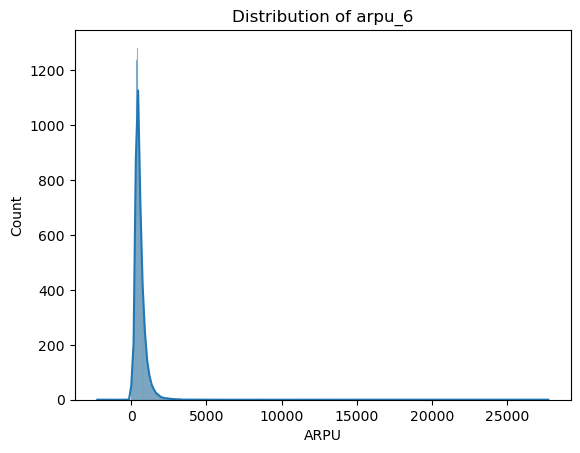

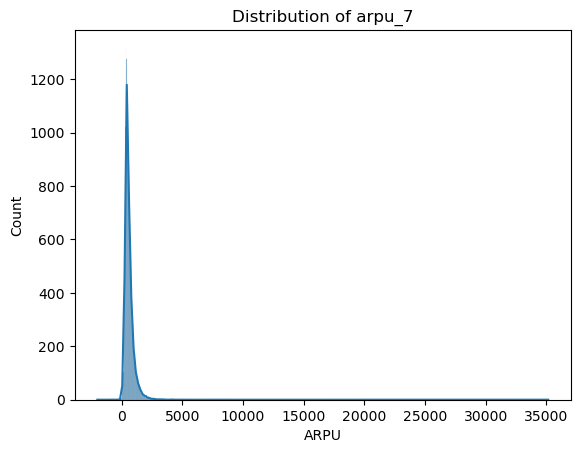

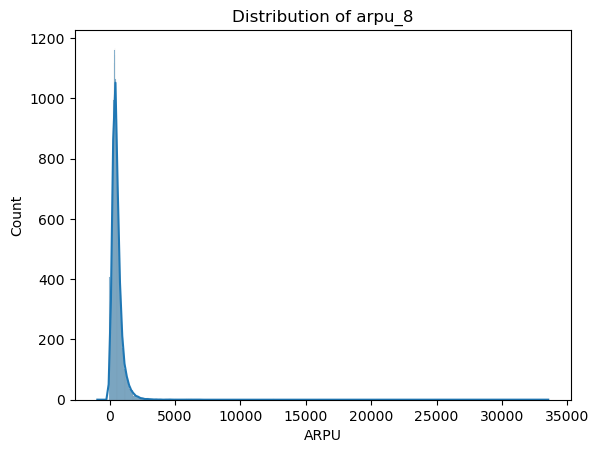

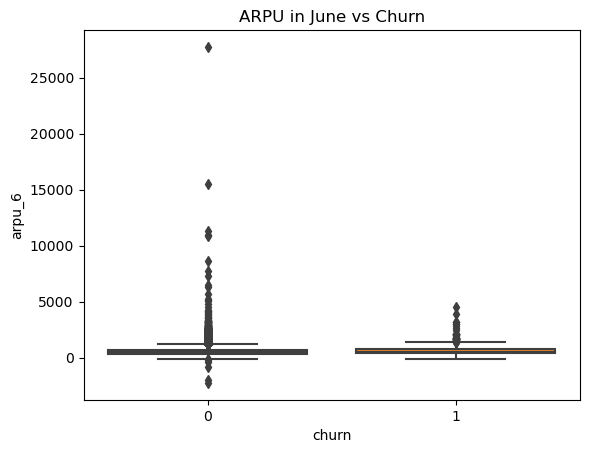

In [74]:
# Distribution of ARPU for each month
for month in ['arpu_6', 'arpu_7', 'arpu_8']:
    sns.histplot(data[month], kde=True)
    plt.title(f'Distribution of {month}')
    plt.xlabel('ARPU')
    plt.show()

# Boxplot for ARPU vs Churn
sns.boxplot(x='churn', y='arpu_6', data=data)
plt.title('ARPU in June vs Churn')
plt.show()

### Mou(Minutes of Usage)

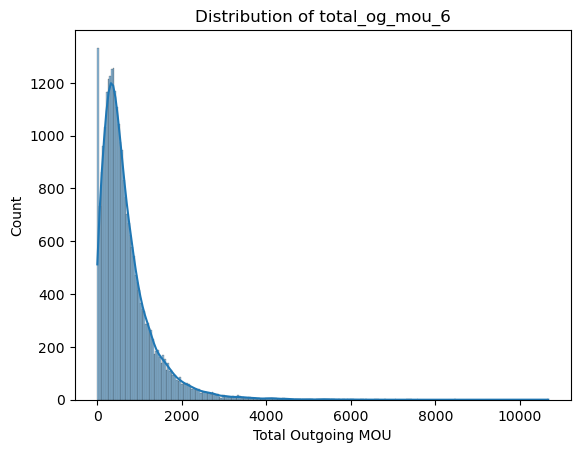

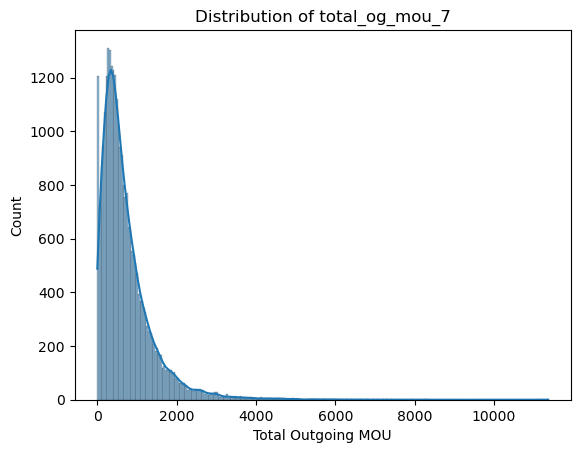

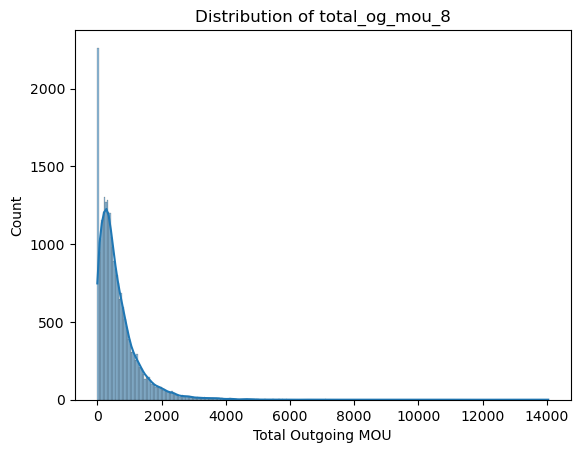

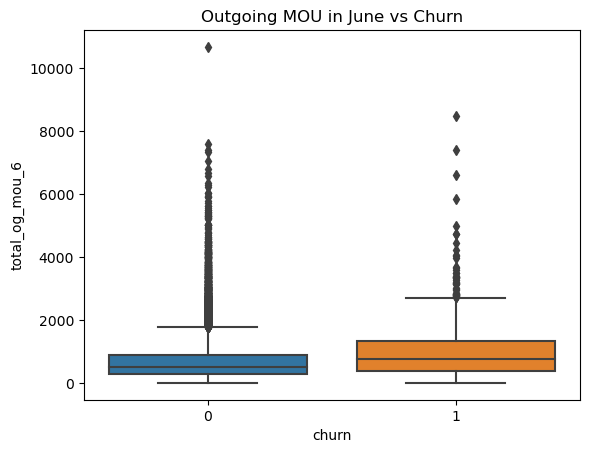

In [75]:
for month in ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']:
    sns.histplot(data[month], kde=True)
    plt.title(f'Distribution of {month}')
    plt.xlabel('Total Outgoing MOU')
    plt.show()

# MOU vs Churn
sns.boxplot(x='churn', y='total_og_mou_6', data=data)
plt.title('Outgoing MOU in June vs Churn')
plt.show()

High-Value and High-Usage Customers Are Less Likely to Churn:

Both ARPU and total outgoing MOU data show that higher values correlate with lower churn rates. This suggests that high-value, high-engagement customers are more loyal.
It would be beneficial to focus retention efforts on these high-value users, as their departure would have a significant impact on revenue.
Early Drop in Usage as a Churn Signal:

Lower median MOU and ARPU in churned customers suggest that a drop in usage and revenue could be an early indicator of churn.
Monitoring changes in MOU and ARPU over time may help identify customers who are at risk of churning before they actually leave, allowing the company to take proactive steps.
Potential for Segmentation and Targeted Interventions:

Based on ARPU and MOU distributions, customers could be segmented into high, medium, and low-value groups. Targeted offers could then be tailored for each group to improve retention.
For example, high-value customers might benefit from loyalty rewards, while low-value customers could be offered promotional plans to boost engagement.
Retention Strategy Focused on ARPU and MOU:

Since ARPU and MOU are strong indicators of customer value and engagement, these metrics could be used to prioritize retention efforts. High-value users and those with consistent usage patterns should be a key focus.

#### 1. Distribution Plots for diff_rech_num, diff_arpu, and diff_vbc



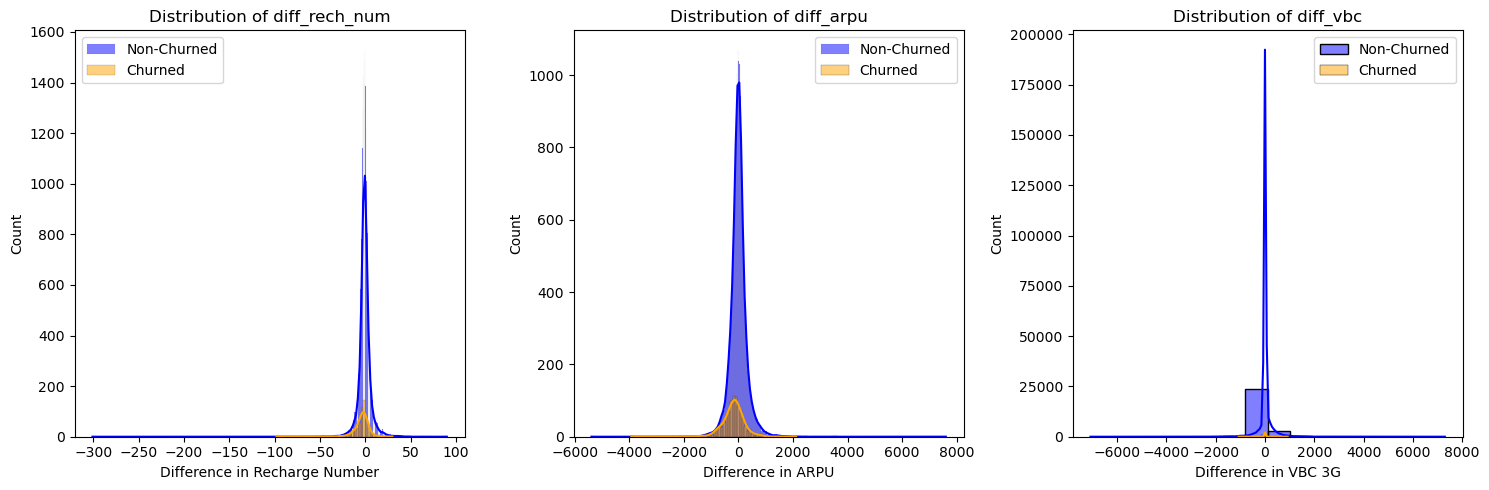

In [76]:
plt.figure(figsize=(15, 5))

# Plotting distributions
plt.subplot(1, 3, 1)
sns.histplot(data[data['churn'] == 0]['diff_rech_num'], color='blue', kde=True, label='Non-Churned')
sns.histplot(data[data['churn'] == 1]['diff_rech_num'], color='orange', kde=True, label='Churned')
plt.title("Distribution of diff_rech_num")
plt.xlabel("Difference in Recharge Number")
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(data[data['churn'] == 0]['diff_arpu'], color='blue', kde=True, label='Non-Churned')
sns.histplot(data[data['churn'] == 1]['diff_arpu'], color='orange', kde=True, label='Churned')
plt.title("Distribution of diff_arpu")
plt.xlabel("Difference in ARPU")
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(data[data['churn'] == 0]['diff_vbc'], color='blue', kde=True, label='Non-Churned')
sns.histplot(data[data['churn'] == 1]['diff_vbc'], color='orange', kde=True, label='Churned')
plt.title("Distribution of diff_vbc")
plt.xlabel("Difference in VBC 3G")
plt.legend()

plt.tight_layout()
plt.show()

#### Mean comparison between Churn and non-churn customers

In [77]:
# Calculate mean differences for churned and non-churned customers
mean_diff = data.groupby('churn')[['diff_rech_num', 'diff_arpu', 'diff_vbc']].mean()
print("Mean values of diff_rech_num, diff_arpu, and diff_vbc for churned vs non-churned customers:")
print(mean_diff)

Mean values of diff_rech_num, diff_arpu, and diff_vbc for churned vs non-churned customers:
       diff_rech_num   diff_arpu   diff_vbc
churn                                      
0          -0.619056   -1.636430  14.925158
1          -3.973130 -192.335325  -8.423140


#### 3. Churn Rate Analysis for decrease_rech_num_action, decrease_arpu_action, and decrease_vbc_action



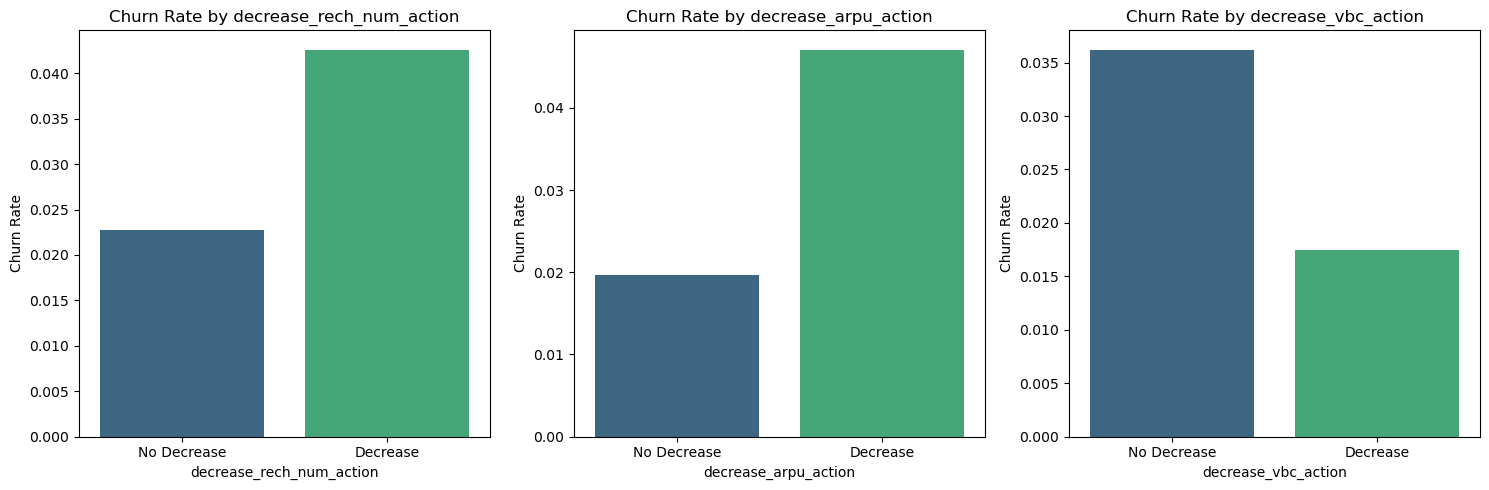

In [78]:
# Calculate churn rate for each flag variable
plt.figure(figsize=(15, 5))

# Plotting histograms of churn rate for each flag variable
for i, col in enumerate(['decrease_rech_num_action', 'decrease_arpu_action', 'decrease_vbc_action'], 1):
    plt.subplot(1, 3, i)
    churn_rate = data.groupby(col)['churn'].mean()
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')
    plt.title(f"Churn Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.xticks([0, 1], ['No Decrease', 'Decrease'])

plt.tight_layout()
plt.show()

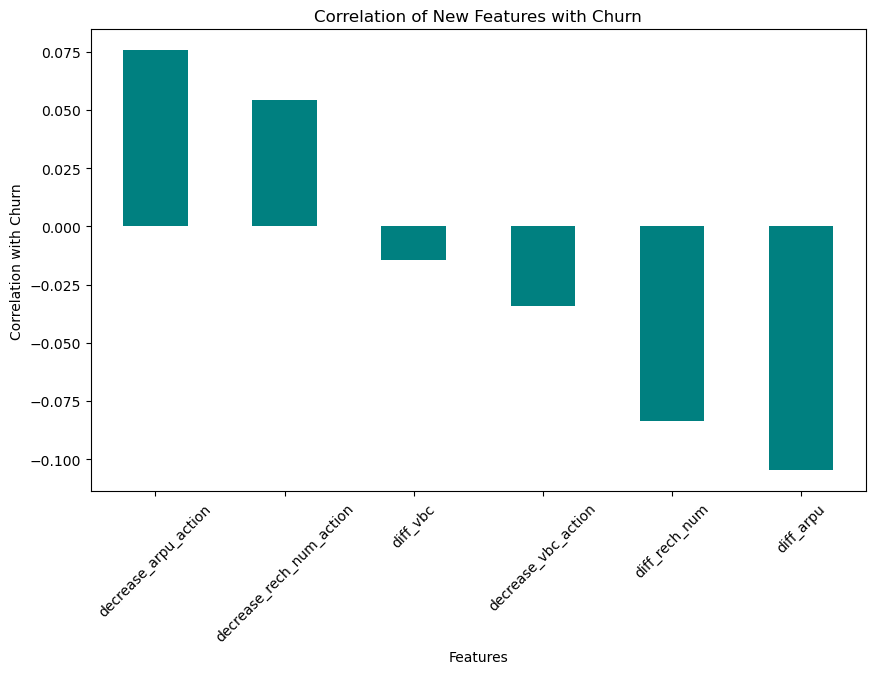

In [79]:
correlation_data = data[['diff_rech_num', 'diff_arpu', 'diff_vbc', 'decrease_rech_num_action', 'decrease_arpu_action', 'decrease_vbc_action', 'churn']].corr()
churn_correlation = correlation_data['churn'].sort_values(ascending=False)

# Plotting the correlation values with churn as a bar plot
plt.figure(figsize=(10, 6))
churn_correlation[1:].plot(kind='bar', color='teal')  # Exclude 'churn' itself from the plot
plt.title("Correlation of New Features with Churn")
plt.xlabel("Features")
plt.ylabel("Correlation with Churn")
plt.xticks(rotation=45)
plt.show()

The analysis reveals that decreased engagement in the action phase, particularly in terms of recharge numbers (decrease_rech_num_action) and ARPU (decrease_arpu_action), is strongly associated with customer churn. These metrics highlight the importance of customer engagement and spending levels as predictors of churn.

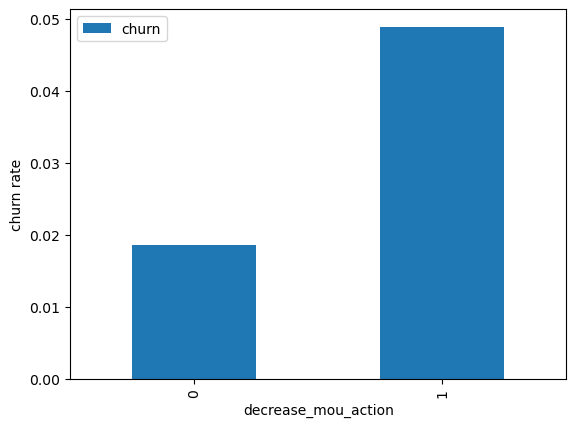

In [80]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

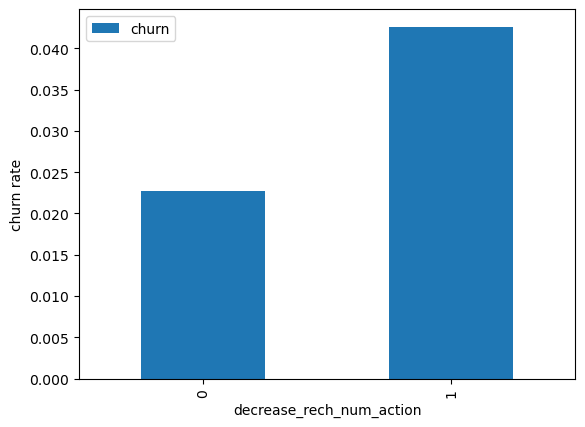

In [81]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good ph

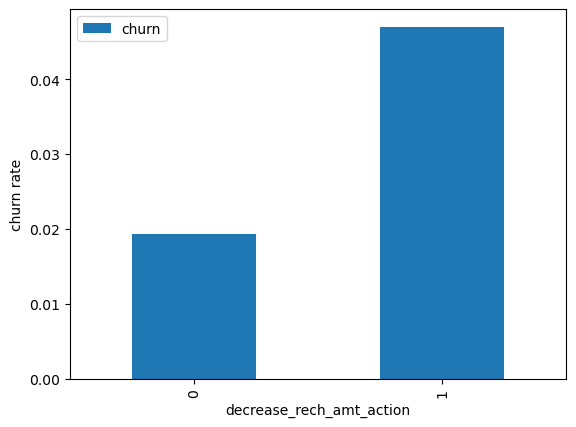

In [82]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


Analysis

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

Churn rate on the basis whether the customer decreased her/his volume based cost in action month

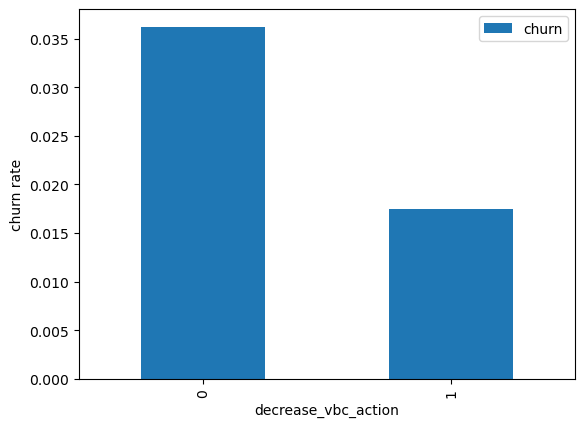

In [83]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

Analysis of the average revenue per customer (churn and not churn) in the action phase

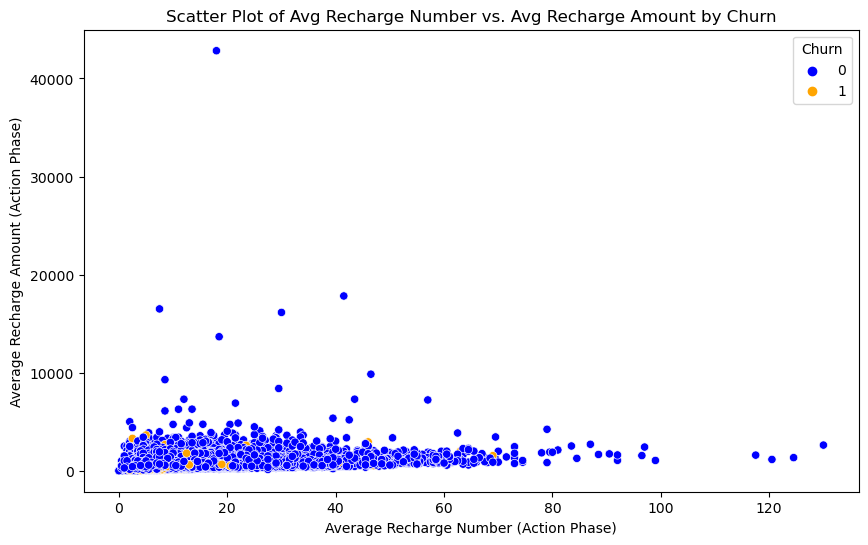

In [84]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn', data=data, palette={0: 'blue', 1: 'orange'})
plt.title('Scatter Plot of Avg Recharge Number vs. Avg Recharge Amount by Churn')
plt.xlabel('Average Recharge Number (Action Phase)')
plt.ylabel('Average Recharge Amount (Action Phase)')
plt.legend(title='Churn', loc='upper right')
plt.show()


Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase


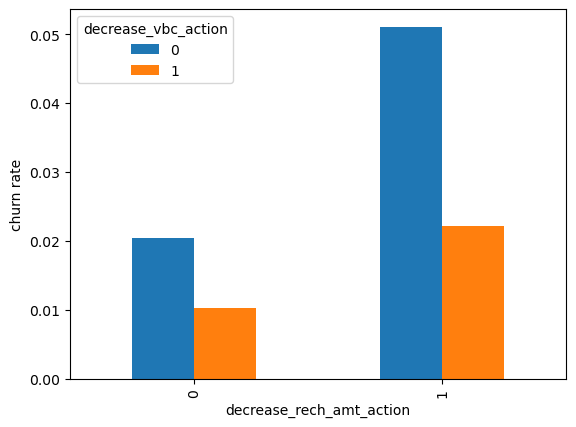

In [85]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [86]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

In [87]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

In [88]:
data.shape

(27991, 140)

### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)
# Putting target variable to y
y = data['churn']
# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Dealing with data imbalance
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique)

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
smote = SMOTE(random_state=100)

# Applying SMOTE to the training data only
X_train, y_train = smote.fit_resample(X_train, y_train)


Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [93]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [94]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [95]:
X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0 -0.918783 -0.124059   
1             0.0             0.0             0.0 -0.126784  0.016828   
2             0.0             0.0             0.0 -1.000804  0.543919   
3             0.0             0.0             0.0  0.797763  2.419063   
4             0.0             0.0             0.0  0.081610 -0.337493   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0 -0.473105    -0.715506    -0.665296    -0.544696     -0.916873   
1 -0.008717    -0.403902    -0.529267    -0.318052     -0.174746   
2  0.320934    -0.482035     1.932876     0.334349     -0.816719   
3  2.234735    -0.513292    -0.440703    -0.339394      0.731072   
4  0.183675    -0.364242    -0.266167    -0.267896     -0.170279   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     -0.900930     -0.725430      -0.260171      -0.248293      -0.289812   
1     -0.432860      0.220257      -0.260171      -0.248293      -0.212171   
2     -0.721492      0.844591      -0.258877      -0.248293      -0.289812   
3      2.200102      4.490751      -0.260171      -0.248293      -0.289812   
4     -0.586690     -0.004311      -0.260171      -0.248293      -0.289812   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0      -0.309385      -0.357818      -0.370678         -0.373189   
1      -0.309385      -0.357818      -0.250159          0.512149   
2      -0.282577      -0.354056      -0.370678         -0.239684   
3      -0.309385      -0.357818      -0.370678          0.204097   
4      -0.309385      -0.357818      -0.370678          0.191917   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.324374         -0.300978         -0.643295         -0.635215   
1          0.018058          0.218096          1.253522          0.440135   
2         -0.327176         -0.300978         -0.523015         -0.560126   
3          0.261823          0.176764          3.579370          6.986007   
4         -0.075197          0.001627          0.718124          0.100070   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.538319         -0.273999         -0.260233         -0.247421   
1          1.119336         -0.110335          0.949127          1.488333   
2         -0.512438         -0.273999         -0.260233         -0.247421   
3         10.179296         -0.273999         -0.202590         -0.163717   
4          0.499507         -0.273999         -0.141488         -0.247421   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.186512         -0.252784         -0.225011     -0.657567   
1         -0.186512         -0.252784          2.004401      1.113910   
2          0.137156         -0.214981         -0.225011     -0.498154   
3         -0.186512          2.455496          2.925714      2.408449   
4          0.195076         -0.252784         -0.225011      0.564224   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.616848     -0.536455         -0.572931         -0.531689   
1      0.333459      0.920077         -0.572931         -0.530940   
2     -0.572767     -0.520062         -0.378146          2.232453   
3      4.431969      6.545919         -0.572931         -0.531689   
4      0.003708      0.304258         -0.412137         -0.209003   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0         -0.404981         -0.619520         -0.590361         -0.433253   
1         -0.404981         -0.619520         -0.590361         -0.425293   
2          0.587941         -0.571029         -0.522383          1.278506   
3         -0.401011         -0.614897         -0.588853         -0.433253   
4         -0.236703         -0.407588         -0.572713         -0.167605   

   std_og_t2f_mou_6  std_og_t2f_mo

Scaling the test set


We don't fit scaler on the test set. We only transform the test set.



In [96]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
7634              0.0             0.0             0.0 -0.340687 -0.819971   
40466             0.0             0.0             0.0 -0.682690 -0.475693   
53854             0.0             0.0             0.0  0.045264 -0.214640   
95060             0.0             0.0             0.0 -0.454491 -0.429810   
92802             0.0             0.0             0.0  0.497199 -0.135317   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7634  -0.719238    -0.654328    -0.623144    -0.520514     -0.197867   
40466  0.160156    -0.288410    -0.218035     0.367747     -0.687870   
53854  0.585037     0.162635    -0.049978     0.718187     -0.678166   
95060  0.094896    -0.368360    -0.219275     0.262990     -0.571174   
92802  0.296425     2.559673     1.107052     2.224566     -0.434756   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7634      -0.478016     -0.289935      -0.260171      -0.248293   
40466     -0.644462     -0.366401       0.917648       0.876693   
53854     -0.611381     -0.426446      -0.260171      -0.248293   
95060     -0.544386     -0.081637       0.400033      -0.248293   
92802     -0.640007     -0.260380      -0.260171      -0.181868   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7634       -0.279048      -0.309385      -0.357818      -0.364328   
40466       0.471794       1.833565       2.016605       0.641516   
53854      -0.289812      -0.309385      -0.357818      -0.370678   
95060      -0.289812       0.050880      -0.357818      -0.370678   
92802      -0.289812      -0.309385      -0.256643      -0.370678   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7634          -0.265474         -0.239430         -0.276675          0.464870   
40466         -0.373189         -0.330220         -0.218920         -0.643295   
53854          2.133750          1.281628          2.689306         -0.033210   
95060         -0.304186         -0.292822         -0.233028         -0.161919   
92802         -0.313295         -0.205511         -0.186957         -0.556829   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7634           0.132005         -0.126330         -0.186472         -0.260233   
40466         -0.635737         -0.507009         -0.273999         -0.260233   
53854          0.077528          0.077029         -0.236230         -0.260233   
95060         -0.166680         -0.057384         -0.181076         -0.260233   
92802         -0.536645         -0.461203         -0.238029         -0.260233   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7634          -0.151130         -0.186512         -0.183929         -0.225011   
40466         -0.247421         -0.186512         -0.252784         -0.225011   
53854         -0.158683         -0.186512         -0.252784         -0.225011   
95060         -0.028407         -0.186512         -0.252784         -0.225011   
92802         -0.239240         -0.186512         -0.252784         -0.225011   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7634       0.124932     -0.091760     -0.255639         -0.548356   
40466     -0.657567     -0.621027     -0.466877         -0.572931   
53854      1.279092      0.879058      1.669678         -0.572931   
95060     -0.301029     -0.309584     -0.179016         -0.299597   
92802     -0.563242     -0.478096     -0.418065          2.840388   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7634          -0.521487         -0.389260         -0.319310         -0.467110   
40466         -0.531689          0.324049         -0.619520         -0.590361   
53854         -0.531689         -0.404981         -0.619520         -0.590361   
95060         -0.070053          0.474897         -0.506578         -0.409752   
92802       

## PCA

In [97]:
from sklearn.decomposition import PCA
# Instantiate PCA
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [98]:
pca.components_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.32235594e-02,  1.36434947e-02, -2.35363659e-02],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -4.19827870e-03, -1.38225156e-02, -4.89375354e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.75327170e-02,  1.67450300e-02, -1.34157025e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.45963318e-13,  1.82948875e-13, -6.48805261e-14],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -4.71549662e-12,  5.97929474e-12,  4.23709174e-12],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -2.02474831e-12,  3.70446604e-12, -1.05277234e-12]])

In [99]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11109415 0.19212244 0.25016181 0.29440832 0.33689553 0.37396031
 0.40679686 0.4365764  0.46436938 0.489783   0.51498125 0.53723975
 0.55912456 0.58025669 0.59982937 0.61795299 0.63433942 0.65044335
 0.66545951 0.67889127 0.69181975 0.70472691 0.71678021 0.72867031
 0.74009856 0.75047026 0.75996926 0.76939093 0.77840321 0.78712222
 0.79516441 0.80296908 0.81053308 0.81787356 0.82475914 0.83144589
 0.83793137 0.84401992 0.84992942 0.85574095 0.86123093 0.8666085
 0.87177455 0.87667668 0.88120726 0.88564699 0.88989514 0.89406127
 0.89821126 0.90221224 0.90614031 0.90987248 0.9134333  0.91694955
 0.92032995 0.92357752 0.92670199 0.92961286 0.93246184 0.93526844
 0.93801145 0.94073073 0.94336778 0.94597062 0.94854035 0.95106689
 0.95355557 0.95595529 0.9581875  0.96036575 0.96248718 0.96458511
 0.96657143 0.96847737 0.9703195  0.97208214 0.97382736 0.97553281
 0.97717552 0.97878908 0.9803922  0.98193599 0.98338279 0.98481801
 0.98614202 0.98744732 0.98866682 0.98981769 0.99090634 0.99195

Text(0, 0.5, 'Cumulative Variance')

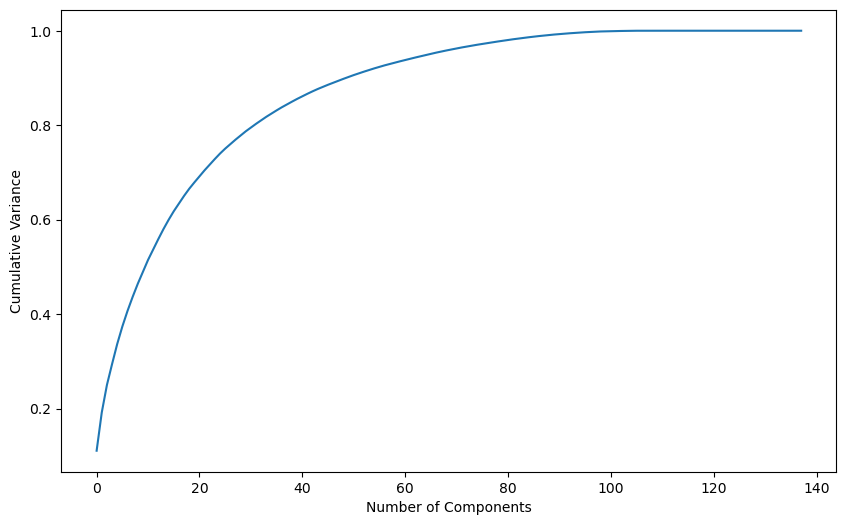

In [100]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

Performing PCA with 60 components


In [101]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [102]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set

In [103]:
X_test_pca = pca_final.transform(X_test)

Our primary focus is on achieving a high Sensitivity (or Recall) rather than overall Accuracy in our model. This is because we care more about correctly identifying potential churn cases than about correctly identifying customers who won’t churn.

The main objective is to retain customers who are at risk of churning. If our model sometimes mistakenly classifies loyal customers as potential churn cases, it’s less problematic—we would rather provide incentives to a few non-churning customers than miss those who might actually leave. In other words, identifying and retaining at-risk customers is our top priority, making Sensitivity the most crucial metric in this context.

### Logistic regression with PCA

In [104]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [105]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.



In [106]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [107]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=6, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 6 folds for each of 6 candidates, totalling 36 fits


GridSearchCV(cv=KFold(n_splits=6, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [108]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.213642      0.018548         0.006925        0.003201     0.01   
1       0.315604      0.034072         0.003908        0.001869     0.10   
2       0.321885      0.017403         0.006436        0.003215     1.00   
3       0.470889      0.125865         0.006974        0.005826    10.00   
4       0.538543      0.157650         0.007318        0.004304   100.00   
5       0.409661      0.055830         0.006394        0.002694  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.899357           0.897363           0.903665   
1   {'C': 0.1}           0.900322           0.897363           0.903017   
2     {'C': 1}           0.900643           0.897050           0.902692   
3    {'C': 10}           0.900643           0.897363           0.902368   
4   {'C': 100}           0.900322           0.897363           0.902692   
5  {'C': 1000}           0.900643           0.897363           0.902368   

   split3_test_score  split4_test_score  split5_test_score  mean_test_score  \
0           0.899463           0.894574           0.894437         0.898143   
1           0.900411           0.892403           0.896018         0.898256   
2           0.900727           0.891163           0.896334         0.898101   
3           0.900411           0.891163           0.896650         0.898100   
4           0.900411           0.891473           0.896650         0.898152   
5           0.900411           0.890853           0.896334         0.897995   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003183                3            0.898616            0.898507   
1        0.003455                1            0.898616            0.898571   
2        0.003804                4            0.898869            0.898762   
3        0.003670                5            0.898742            0.898889   
4        0.003604                2            0.898805            0.898825   
5        0.003789                6            0.898742            0.898762   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.900050            0.898148            0.898001   
1            0.901691            0.899099            0.899274   
2            0.901817            0.898909            0.899210   
3            0.901943            0.898973            0.899147   
4            0.902259            0.898973            0.899274   
5            0.901880            0.898973            0.899274   

   split5_train_score  mean_train_score  std_train_score  
0            0.898649          0.898662         0.000665  
1            0.898269          0.899253         0.001141  
2            0.898078          0.899274         0.001188  
3            0.898015          0.899285         0.001242  
4            0.898078          0.899369         0.001341  
5            0.898142          0.899295         0.001205

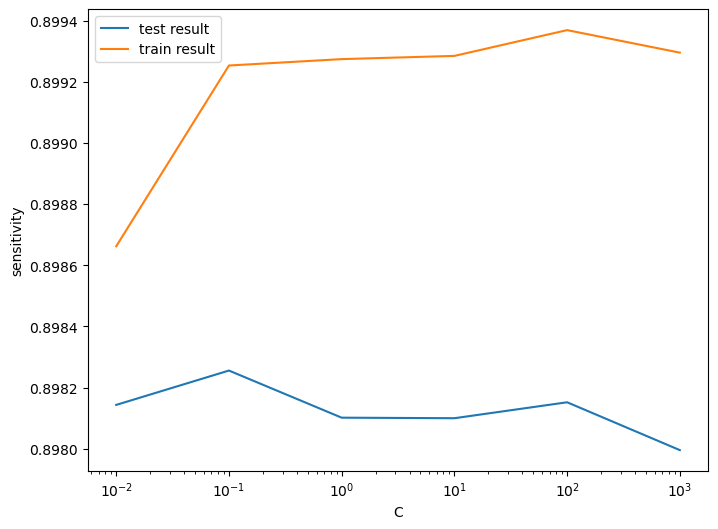

In [109]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [110]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8982555588334438 at C = 0.1


Logistic regression with optimal C

In [111]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [112]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set

In [113]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [114]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15945  2986]
 [ 1912 17019]]


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8706354656383709
Sensitivity:- 0.8990016375257515
Specificity:- 0.8422692937509905


Prediction on the test set

In [117]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [118]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6841 1270]
 [  66  221]]


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8409145034532032
Sensitivity:- 0.7700348432055749
Specificity:- 0.8434225126371594


### Model Summary

##### Train set
accuaracy   - 0.87

sensitivity - 0.89

specificity - 0.84


##### Test set

accuracy    -0.84

sensitivity -0.77

specificity -0.84


We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Support Vector Machine(SVM) with PCA

In [121]:
# Importing SVC
from sklearn.svm import SVC

In [122]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)    

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [123]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0        8.447169      0.685448         7.497261        0.239905        1   
1       72.238757     88.124091         8.970091        0.151284        1   
2       12.233547      0.286382        12.197047        0.312265        1   
3        7.154569      0.603385         5.297758        0.593170       10   
4       10.780493      0.237937         8.438338        0.175201       10   
5       10.973715      0.332366        10.091201        0.177683       10   
6        9.906458      0.845062         3.253044        0.124029      100   
7       11.682119      0.537199         6.734927        0.065816      100   
8       10.651480      0.187779         8.972762        0.197792      100   
9       17.485331      2.152055        22.373791       28.318471     1000   
10     219.435699    284.202610         4.205378        0.025655     1000   
11      12.814229      0.524857         6.976938        0.025264     1000   

    param_gamma                        params  split0_test_score  \
0        0.0100       {'C': 1, 'gamma': 0.01}           0.938753   
1        0.0010      {'C': 1, 'gamma': 0.001}           0.881864   
2        0.0001     {'C': 1, 'gamma': 0.0001}           0.859441   
3        0.0100      {'C': 10, 'gamma': 0.01}           0.960542   
4        0.0010     {'C': 10, 'gamma': 0.001}           0.904603   
5        0.0001    {'C': 10, 'gamma': 0.0001}           0.870137   
6        0.0100     {'C': 100, 'gamma': 0.01}           0.974487   
7        0.0010    {'C': 100, 'gamma': 0.001}           0.931384   
8        0.0001   {'C': 100, 'gamma': 0.0001}           0.882577   
9        0.0100    {'C': 1000, 'gamma': 0.01}           0.974408   
10       0.0010   {'C': 1000, 'gamma': 0.001}           0.950638   
11       0.0001  {'C': 1000, 'gamma': 0.0001}           0.901989   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.938594           0.940967         0.939438        0.001083   
1            0.882180           0.887956         0.884000        0.002800   
2            0.857301           0.863312         0.860018        0.002488   
3            0.961176           0.962995         0.961571        0.001040   
4            0.908407           0.908716         0.907242        0.001870   
5            0.870929           0.876466         0.872511        0.002815   
6            0.972189           0.974643         0.973773        0.001122   
7            0.934712           0.935895         0.933997        0.001910   
8            0.883131           0.889144         0.884951        0.002974   
9            0.974645           0.976466         0.975173        0.000919   
10           0.954045           0.952694         0.952459        0.001401   
11           0.906980           0.907845         0.905605        0.002581   

    rank_test_score  split0_train_score  split1_train_score  \
0                 5            0.943940            0.943386   
1                10            0.884117            0.884949   
2                12            0.860069            0.860465   
3                 3            0.969454            0.970445   
4                 7            0.910859            0.910899   
5                11            0.873579            0.873658   
6                 2            0.988828            0.989422   
7                 6            0.939820            0.939503   
8                 9            0.888079            0.887207   
9                 1            0.997583            0.997861   
10                4            0.963116            0.962838   
11                8            0.909156            0.909433   

    split2_train_score  mean_train_score  std_train_score  
0             0.944814          0.944047         0.000588  
1             0.886340          0.885135         0.000917  
2             0.860669          0.860401         0.000249  
3             0.971436          0.970445         0.0008

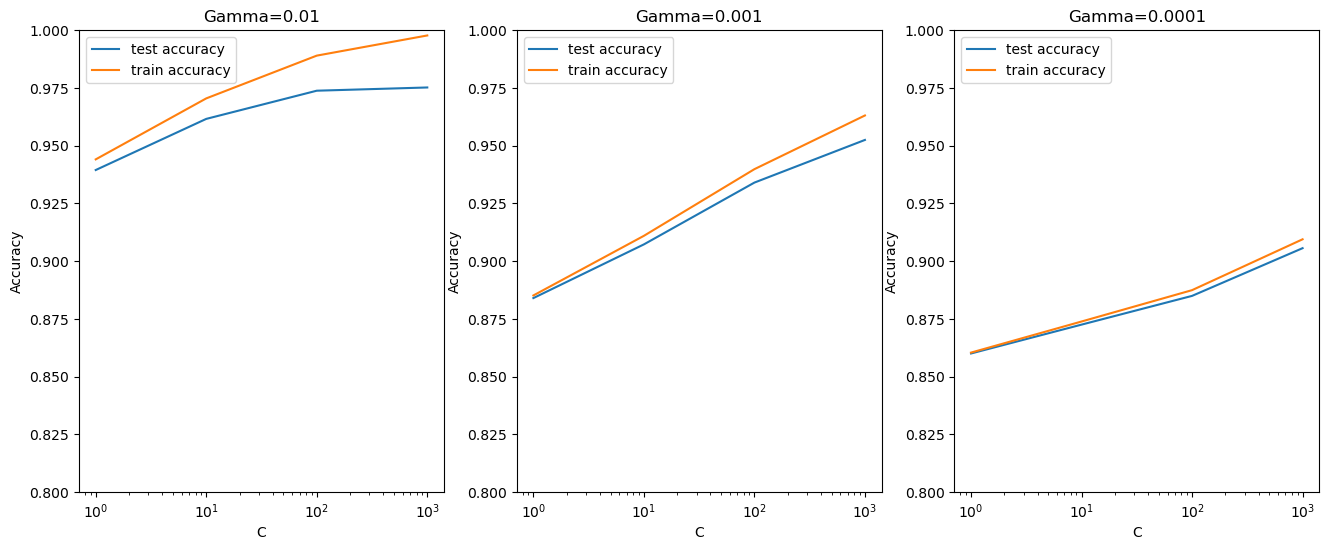

In [124]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [125]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9751730308197212 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


The best test score achieved is 0.9755 with the hyperparameters C=1000 and gamma=0.01. However, examining the plot, we observe that higher gamma values lead to overfitting, with the model fitting the training data too closely. When gamma is set to its lowest value (0.0001), the train and test accuracy are nearly identical, indicating a more balanced model with less risk of overfitting.

At C=100, we achieve good accuracy with train and test scores that are well-aligned, suggesting a simpler model with decent performance.

While sklearn identifies gamma=0.01 and C=1000 as the optimal parameters based on test accuracy, one could argue in favor of a simpler model with gamma=0.0001. This is because the optimal parameters focus on maximizing average test accuracy but do not account for model complexity.

With gamma=0.0001, we can still achieve comparable test accuracy (~90%) by increasing the C value. In summary, achieving high accuracy involves a trade-off between:

High gamma (greater non-linearity) with a moderate C
Low gamma (reduced non-linearity) with a higher C
We believe that a simpler model with lower non-linearity is preferable, so we choose gamma=0.0001 and C=100, as it provides a good balance between accuracy and model simplicity.








### Build the model with optimal hyperparameters

In [126]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

In [127]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [128]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16288  2643]
 [ 1532 17399]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8897311288363002
Sensitivity:- 0.919074533833395
Specificity:- 0.8603877238392056


#### Prediction on the test set

In [131]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [132]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7004 1107]
 [  68  219]]


In [133]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8600857346987378
Sensitivity:- 0.919074533833395
Specificity:- 0.8603877238392056


#### Model summary

Train set

Accuracy = 0.88

Sensitivity = 0.91

Specificity = 0.86

Test set

Accuracy = 0.86

Sensitivity = 0.91

Specificity = 0.86

### Decision tree with PCA

In [135]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter Tuning

In [148]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [137]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.842033      0.030208         0.004647        0.002270   
1       0.813485      0.002364         0.002582        0.000096   
2       0.818741      0.012040         0.002617        0.000038   
3       0.814052      0.004779         0.002675        0.000145   
4       1.431533      0.036815         0.002926        0.000307   
5       1.403348      0.016360         0.002814        0.000161   
6       1.339134      0.010300         0.002552        0.000104   
7       1.334292      0.021126         0.002636        0.000091   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.851558   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.851558   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.845219   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.845219   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.897517   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.896989   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.877443   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.877443   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.847373           0.848125           0.838352           0.809826   
1           0.847373           0.848125           0.838352           0.809826   
2           0.845260           0.840465           0.831484           0.810618   
3           0.845260           0.840465           0.831484           0.810618   
4           0.916557           0.904913           0.898045           0.906498   
5           0.916821           0.904913           0.898838           0.906498   
6           0.904938           0.875066           0.884575           0.899894   
7           0.905730           0.875066           0.884575           0.899894   

   mean_test_score  std_test_score  rank_test_score  
0         0.839047        0.015249                5  
1         0.839047        0.015249                5  
2         0.834609        0.013005                7  
3         0.834609        0.013005                7  
4         0.904706        0.006924                2  
5         0.904812        0.006985                1  
6         0.888383        0.011984                4  
7         0.888542        0.012205                3

In [138]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9048115784098044
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model Tuning with the optimal Parameters

In [139]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [140]:

# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [141]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16639  2292]
 [ 1363 17568]]


In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9034652157836353
Sensitivity:- 0.9280016903491628
Specificity:- 0.8789287412181078


#### Predictions on the Test Set

In [144]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [145]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7010 1101]
 [ 107  180]]


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8561562276732555
Sensitivity:- 0.627177700348432
Specificity:- 0.8642584144988288


#### Model summary
Train set

Accuracy = 0.90

Sensitivity = 0.92

Specificity = 0.97

Test set

Accuracy = 0.85

Sensitivity = 0.62

Specificity = 0.86

#### Random forest with PCA

In [150]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [152]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [153]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8503778406535565 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [154]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [155]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [156]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [157]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15915  3016]
 [ 2443 16488]]


In [158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [159]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8558184987586498
Sensitivity:- 0.8709524061063864
Specificity:- 0.8406845914109133


####  Predictions on the test set

In [160]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [161]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6836 1275]
 [  86  201]]


In [162]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8379376041914741
Sensitivity:- 0.7003484320557491
Specificity:- 0.8428060658365183


Model summary

Train set

Accuracy = 0.85

Sensitivity = 0.87

Specificity = 0.84

Test set

Accuracy = 0.83

Sensitivity = 0.70

Specificity = 0.84

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%

## Without PCA

Logistic regression with No PCA

In [165]:
## Importing stats model
import statsmodels.api as sm

In [166]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [167]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [168]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37732
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Nov 2024   Deviance:                       21216.
Time:                        15:05:56   Pearson chi2:                 1.53e+07
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -58.6679   8140.750     -0.007      0.994    -1.6e+04    1.59e+04
loc_og_t2o_mou            4.025e-07   5.03e-05      0.008      0.994   -9.83e-05    9.91e-05
std_og_t2o_mou            -1.39e-06      0.000     -0.007      0.994      -0.000       0.000
loc_ic_t2o_mou            6.927e-08   8.26e-06      0.008      0.993   -1.61e-05    1.63e-05
arpu_6                       0.2086      0.105      1.988      0.047       0.003       0.414
arpu_7                      -0.1660      0.106     -1.573      0.116      -0.373       0.041
arpu_8                      -0.2933      0.135     -2.176      0.030      -0.558      -0.029
onnet_mou_6                  4.2097      3.738      1.126      0.260      -3.116      11.535
onnet_mou_7                  1.0178      2.169      0.469      0.639      -3.233       5.268
onnet_mou_8                 -0.4380      2.324     -0.188      0.851      -4.994       4.118
offnet_mou_6                 3.1862      3.504      0.909      0.363      -3.682      10.055
offnet_mou_7                 4.1505      1.893      2.192      0.028       0.440       7.861
offnet_mou_8                -3.1113      2.124     -1.465      0.143      -7.275       1.052
roam_ic_mou_6                0.3639      0.046      7.893      0.000       0.274       0.454
roam_ic_mou_7                0.0521      0.063      0.829      0.407      -0.071       0.175
roam_ic_mou_8                0.1255      0.052      2.405      0.016       0.023       0.228
roam_og_mou_6               -1.4376      1.123     -1.280      0.201      -3.639       0.764
roam_og_mou_7               -0.8868      0.611     -1.451      0.147      -2.085       0.311
roam_og_mou_8                1.4369      0.839      1.713      0.087      -0.207       3.081
loc_og_t2t_mou_6         -1201.4244    697.856     -1.722      0.085   -2569.197     166.348
loc_og_t2t_mou_7          -762.3864    748.931     -1.018      0.309   -2230.264     705.491
loc_og_t2t_mou_8          5915.6707    704.797      8.393      0.000    4534.293    7297.048
loc_og_t2m_mou_6         -1252.9915    727.879     -1.721      0.085   -2679.609     173.626
loc_og_t2m_mou_7          -708.0263    693.496     -1.021      0.307   -2067.253     651.200
loc_og_t2m_mou_8          6186.3516    736.874      8.395      0.000    4742.105    7630.599
loc_og_t2f_mou_6          -105.9360     61.649     -1.718      0.086    -226.765      14.893
loc_og_t2f_mou_7           -64.1197     62.781     -1.021      0.307    -187.169      58.929
loc_og_t2f_mou_8           518.0569     61.722      8.393      0.000     397.084     639.030
loc_og_t2c_mou_6             0.0594      0.026      2.309      0.021       0.009       0.110
loc_og_t2c_mou_7            -0.0069      0.028     -0.252      0.801      -0.061       0.047
loc_og_t2c_mou

#### Model analysis

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.


Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

#### Feature Selection Using RFE

In [171]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

### RFE with 15 columns

In [174]:
# Importing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)


In [176]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'arpu_8', 'offnet_mou_6', 'roam_og_mou_8', 'std_og_t2m_mou_6',
       'isd_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8',
       'decrease_arpu_action', 'decrease_vbc_action'],
      dtype='object')


#### Model-1 with RFE selected columns

In [177]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37846
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Nov 2024   Deviance:                       27190.
Time:                        15:30:38   Pearson chi2:                 3.32e+07
No. Iterations:                    34   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -32.9986   6890.567     -0.005      0.996   -1.35e+04    1.35e+04
arpu_6                   1.2073      0.036     33.709      0.000       1.137       1.277
arpu_8                  -1.8400      0.040    -46.405      0.000      -1.918      -1.762
offnet_mou_6            -1.6698      0.062    -26.885      0.000      -1.791      -1.548
roam_og_mou_8            1.5206      0.037     41.487      0.000       1.449       1.592
std_og_t2m_mou_6         1.6887      0.059     28.715      0.000       1.573       1.804
isd_og_mou_8            -1.1148      0.250     -4.461      0.000      -1.605      -0.625
og_others_8          -1396.0220   2.92e+05     -0.005      0.996   -5.73e+05    5.71e+05
loc_ic_t2t_mou_8        -0.9251      0.076    -12.107      0.000      -1.075      -0.775
loc_ic_t2f_mou_8        -0.8717      0.068    -12.867      0.000      -1.004      -0.739
total_ic_mou_8          -0.9656      0.056    -17.177      0.000      -1.076      -0.855
ic_others_8             -2.0056      0.210     -9.560      0.000      -2.417      -1.594
monthly_2g_8            -1.0582      0.068    -15.621      0.000      -1.191      -0.925
monthly_3g_8            -0.8256      0.047    -17.395      0.000      -0.919      -0.733
decrease_arpu_action    -1.2187      0.043    -28.588      0.000      -1.302      -1.135
decrease_vbc_action     -1.3496      0.077    -17.521      0.000      -1.501      -1.199
========================================================================================
"""

In [178]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [179]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           offnet_mou_6  7.38
4       std_og_t2m_mou_6  6.71
0                 arpu_6  2.29
1                 arpu_8  2.28
9         total_ic_mou_8  2.27
7       loc_ic_t2t_mou_8  1.65
5           isd_og_mou_8  1.38
13  decrease_arpu_action  1.28
3          roam_og_mou_8  1.23
8       loc_ic_t2f_mou_8  1.18
14   decrease_vbc_action  1.16
12          monthly_3g_8  1.15
11          monthly_2g_8  1.06
10           ic_others_8  1.02
6            og_others_8  1.00

##### Removing Columns
offnet_mou_6

std_og_t2m_mou_6

In [183]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_6', 'arpu_8', 'offnet_mou_6', 'roam_og_mou_8', 'std_og_t2m_mou_6', 'isd_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_arpu_action', 'decrease_vbc_action']


#### Model 2

In [184]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37847
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13629.
Date:                Mon, 11 Nov 2024   Deviance:                       27258.
Time:                        15:46:21   Pearson chi2:                 3.25e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4864
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0503      0.038     -1.311      0.190      -0.125       0.025
arpu_6                   1.2073      0.036     33.743      0.000       1.137       1.277
arpu_8                  -1.8386      0.040    -46.412      0.000      -1.916      -1.761
offnet_mou_6            -1.6713      0.062    -26.955      0.000      -1.793      -1.550
roam_og_mou_8            1.5193      0.036     41.639      0.000       1.448       1.591
std_og_t2m_mou_6         1.6899      0.059     28.788      0.000       1.575       1.805
isd_og_mou_8            -1.1734      0.255     -4.609      0.000      -1.672      -0.674
loc_ic_t2t_mou_8        -0.9225      0.076    -12.076      0.000      -1.072      -0.773
loc_ic_t2f_mou_8        -0.8717      0.068    -12.865      0.000      -1.005      -0.739
total_ic_mou_8          -0.9686      0.056    -17.216      0.000      -1.079      -0.858
ic_others_8             -2.0116      0.210     -9.588      0.000      -2.423      -1.600
monthly_2g_8            -1.0717      0.069    -15.536      0.000      -1.207      -0.936
monthly_3g_8            -0.8249      0.047    -17.388      0.000      -0.918      -0.732
decrease_arpu_action    -1.2146      0.043    -28.540      0.000      -1.298      -1.131
decrease_vbc_action     -1.3492      0.077    -17.531      0.000      -1.500      -1.198
========================================================================================
"""

#### checking VIF for Model 2

In [185]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           offnet_mou_6  7.38
4       std_og_t2m_mou_6  6.71
0                 arpu_6  2.29
1                 arpu_8  2.28
8         total_ic_mou_8  2.27
6       loc_ic_t2t_mou_8  1.65
5           isd_og_mou_8  1.38
12  decrease_arpu_action  1.28
3          roam_og_mou_8  1.23
7       loc_ic_t2f_mou_8  1.18
13   decrease_vbc_action  1.16
11          monthly_3g_8  1.15
10          monthly_2g_8  1.06
9            ic_others_8  1.02

As we can see from the model summary that all the variables p-values are significant and offnet_mou_6 and std_og_t2m_mou_6 column has the highest VIF`.

### Model 3

In [188]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_6')

In [191]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                 arpu_8  2.22
6         total_ic_mou_8  2.13
0                 arpu_6  1.69
4       loc_ic_t2t_mou_8  1.64
3           isd_og_mou_8  1.36
10  decrease_arpu_action  1.28
2          roam_og_mou_8  1.21
5       loc_ic_t2f_mou_8  1.17
11   decrease_vbc_action  1.15
9           monthly_3g_8  1.14
8           monthly_2g_8  1.06
7            ic_others_8  1.02

In [193]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37849
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14108.
Date:                Mon, 11 Nov 2024   Deviance:                       28216.
Time:                        16:12:56   Pearson chi2:                 9.84e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4733
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1004      0.038     -2.627      0.009      -0.175      -0.025
arpu_6                   0.9726      0.030     31.921      0.000       0.913       1.032
arpu_8                  -1.6697      0.038    -43.875      0.000      -1.744      -1.595
roam_og_mou_8            1.3148      0.035     37.443      0.000       1.246       1.384
isd_og_mou_8            -1.2333      0.251     -4.915      0.000      -1.725      -0.741
loc_ic_t2t_mou_8        -0.9311      0.079    -11.769      0.000      -1.086      -0.776
loc_ic_t2f_mou_8        -0.9470      0.069    -13.818      0.000      -1.081      -0.813
total_ic_mou_8          -1.4366      0.059    -24.485      0.000      -1.552      -1.322
ic_others_8             -2.1359      0.213    -10.045      0.000      -2.553      -1.719
monthly_2g_8            -1.0955      0.069    -15.764      0.000      -1.232      -0.959
monthly_3g_8            -0.8228      0.047    -17.690      0.000      -0.914      -0.732
decrease_arpu_action    -1.1927      0.042    -28.588      0.000      -1.274      -1.111
decrease_vbc_action     -1.3282      0.076    -17.582      0.000      -1.476      -1.180
========================================================================================
"""

Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-3 log_no_pca_3 will be the final model.

In [195]:
## Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    3.093987e-01
1    8.159769e-02
2    4.401996e-01
3    9.063766e-04
4    2.972723e-07
dtype: float64

In [196]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

churn    churn_prob  CustID
0      0  3.093987e-01       0
1      0  8.159769e-02       1
2      0  4.401996e-01       2
3      0  9.063766e-04       3
4      0  2.972723e-07       4

#### final cutoff point

In [197]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

churn    churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0  3.093987e-01       0    1    1    1    1    0    0    0    0    0   
1      0  8.159769e-02       1    1    0    0    0    0    0    0    0    0   
2      0  4.401996e-01       2    1    1    1    1    1    0    0    0    0   
3      0  9.063766e-04       3    1    0    0    0    0    0    0    0    0   
4      0  2.972723e-07       4    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [198]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.730970     0.979346     0.482595
0.2          0.2  0.776689     0.965612     0.587766
0.3          0.3  0.813665     0.951614     0.675717
0.4          0.4  0.839338     0.927949     0.750726
0.5          0.5  0.856637     0.890444     0.822830
0.6          0.6  0.856188     0.832972     0.879404
0.7          0.7  0.839892     0.756378     0.923406
0.8          0.8  0.778591     0.601500     0.955681
0.9          0.9  0.633036     0.285246     0.980825


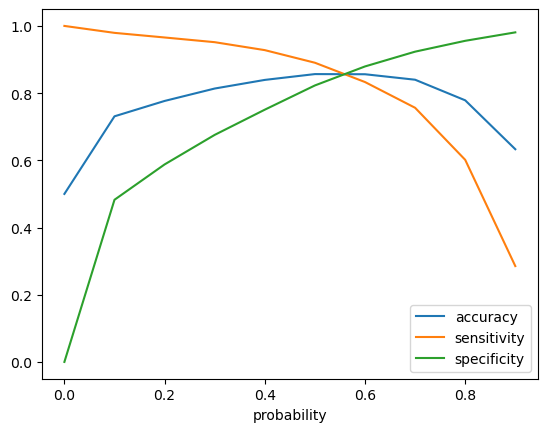

In [199]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal

In [200]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

churn    churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0  3.093987e-01       0    1    1    1    1    0    0    0    0    0   
1      0  8.159769e-02       1    1    0    0    0    0    0    0    0    0   
2      0  4.401996e-01       2    1    1    1    1    1    0    0    0    0   
3      0  9.063766e-04       3    1    0    0    0    0    0    0    0    0   
4      0  2.972723e-07       4    1    0    0    0    0    0    0    0    0   

   0.9  predicted  
0    0          0  
1    0          0  
2    0          0  
3    0          0  
4    0          0

In [201]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[15577  3354]
 [ 2074 16857]]


In [202]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [203]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8566372616343564
Sensitivity:- 0.8904442448893349
Specificity:- 0.8228302783793777


### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [204]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

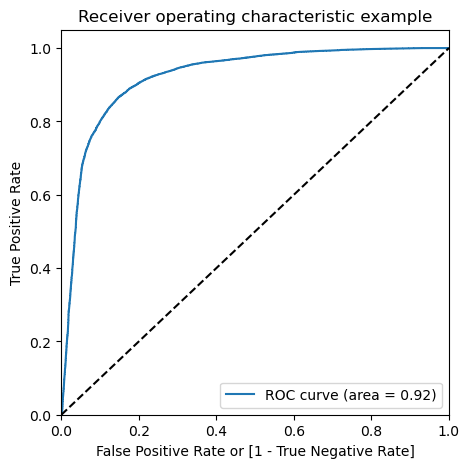

In [206]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, which is the Gini of the model.

### Testing the model on the test set

In [207]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [208]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [209]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [210]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [211]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
7634   0.682593
40466  0.369667
53854  0.004367
95060  0.021090
92802  0.502291

In [212]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
7634       0
40466      0
53854      0
95060      0
92802      0

In [213]:

# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [214]:
y_test_df.head()

churn  CustID
7634       0    7634
40466      0   40466
53854      0   53854
95060      0   95060
92802      0   92802

In [215]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [216]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [217]:
y_test_pred_final.head()

churn  CustID         0
0      0    7634  0.682593
1      0   40466  0.369667
2      0   53854  0.004367
3      0   95060  0.021090
4      0   92802  0.502291

In [218]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [219]:
y_test_pred_final.head()

churn  CustID  churn_prob
0      0    7634    0.682593
1      0   40466    0.369667
2      0   53854    0.004367
3      0   95060    0.021090
4      0   92802    0.502291

In [220]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [221]:
y_test_pred_final.head()

churn  CustID  churn_prob  test_predicted
0      0    7634    0.682593               1
1      0   40466    0.369667               0
2      0   53854    0.004367               0
3      0   95060    0.021090               0
4      0   92802    0.502291               1

In [222]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[6702 1409]
 [  59  228]]


In [223]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [224]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8251964753512742
Sensitivity:- 0.794425087108014
Specificity:- 0.8262852915793367


Overall, the model is performing well in the test set, what it had learnt from the train set.

### Final conclusion with no PCA
We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.



1. ARPU (Average Revenue Per User)
arpu_6 (Positive Coefficient): This positive coefficient suggests that customers with a higher ARPU in month 6(JUNE) are more likely to stay. High ARPU customers are often highly engaged and generate more revenue.
arpu_8 (Negative Coefficient): The negative coefficient on ARPU in month 8 (August) suggests that a decrease in ARPU over time is associated with higher churn risk.
#### Recommendation: For customers showing declining ARPU, focus on retention efforts by introducing personalized offers or bundles to encourage usage. High-value offers could help retain these users and prevent them from leaving for competitors.


2. Roaming Outgoing Minutes of Usage (roam_og_mou_8)
The positive coefficient here suggests that customers with higher roaming outgoing minutes in month 8 are less likely to churn, as they appear engaged even while roaming.
#### Recommendation: Target high roaming customers with loyalty incentives, such as discounts on roaming or tailored international plans, to increase their satisfaction and further enhance loyalty.


3. International Outgoing Minutes of Usage (isd_og_mou_8)
This predictor has a strong negative coefficient, meaning customers who have high international outgoing usage are more likely to churn, possibly due to high costs or inadequate international service options.
#### Recommendation: Provide cost-effective international packages or loyalty discounts on international calls to high ISD usage customers. Educate them about available packages to reduce churn risk due to perceived high costs.


4. Local Incoming Call Minutes (loc_ic_t2t_mou_8 and loc_ic_t2f_mou_8)
Both local incoming call metrics have negative coefficients, suggesting that customers with more local incoming minutes in month 8 are at higher risk of churn. This could indicate that they are primarily passive users who may not find much value in the service.
#### Recommendation: Encourage these users to engage more actively. Offer promotions on outgoing call plans to transition them into more engaged users. Additionally, survey these customers to understand any service gaps.


5. Total Incoming Minutes of Usage (total_ic_mou_8)
This predictor has a strong negative coefficient, showing that customers with high incoming usage are more likely to churn. This could mean they rely more on receiving calls and have fewer outgoing interactions, indicating a potentially passive user base.
#### Recommendation: Introduce loyalty programs or incentive-based plans (like reduced outgoing rates) that encourage these users to become more active, leading to higher engagement and reducing churn risk.


6. Other Incoming Call Metrics (ic_others_8)
This variable also has a negative coefficient, suggesting that customers relying mainly on incoming calls rather than outgoing interactions are at risk of churn.
#### Recommendation: Use promotional incentives like bonus credits or low-cost outgoing plans to increase engagement among these customers, moving them toward more active usage.


7. Monthly Data Plan Usage (monthly_2g_8 and monthly_3g_8)
Both predictors have negative coefficients, indicating that customers with lower monthly 2G and 3G data usage are more prone to churn. Low data usage might suggest that they don’t perceive much value in the data offerings or face quality issues.
#### Recommendation: Improve awareness around data packages and offer low-cost data add-ons or bonuses for minimal data users to increase data consumption. Monitoring network quality for these users and addressing any performance issues can also improve customer experience and loyalty.


8. ARPU and VBC (Volume-Based Charging) Decrease in Action Phase
decrease_arpu_action (Negative Coefficient): A decrease in ARPU during the action phase is a strong indicator of churn, as customers using fewer services or spending less may lose interest.
decrease_vbc_action (Negative Coefficient): Customers with a reduction in VBC usage are also at higher risk, showing that they may be reducing consumption or shifting away from additional charge-based services.
#### Recommendation: Track customers with declining ARPU and VBC usage and proactively offer retention incentives. Early intervention with personalized offers for value-add services can help retain these customers. Monitoring these patterns enables targeting disengaged customers before they churn.


#### Summary
The regression results provide a clear picture of how engagement levels, usage patterns, and service types contribute to churn risk. Customers with decreasing ARPU, low engagement in outgoing calls, minimal data usage, or reliance on incoming calls represent segments at higher churn risk. By introducing tailored offers, incentives, and improved service options for these segments, the business can enhance customer retention and reduce churn.

#### 1. Enhance Loyalty Programs for High-Value Customers
Target: Customers with high ARPU in earlier months who show a decline in recent months (e.g., ARPU dropping from month 6 to month 8).
Action: Offer loyalty rewards, discounts, or exclusive service upgrades to these customers. Personalized engagement can help re-engage high-value customers, reducing their risk of churn.
#### 2. Introduce Cost-Effective Roaming and International Plans
Target: Customers with high roaming and international outgoing usage.
Action: Implement affordable international and roaming bundles. Providing cost-effective or loyalty-based discounts on these services can retain customers who use these features and reduce their incentive to switch to other providers with better deals.
#### 3. Encourage Active Usage Among Passive Users
Target: Customers who have high incoming calls but limited outgoing or other engagement (e.g., high total_ic_mou_8 and ic_others_8).
Action: Launch targeted promotions or incentives, such as free outgoing minutes or bundled packages. These could prompt passive users to increase their engagement, thereby increasing the perceived value of the service and lowering churn probability.
#### 4. Promote Data Packages and Improve Network Quality
Target: Customers with low data usage, particularly those using minimal 2G or 3G data (e.g., low monthly_2g_8 and monthly_3g_8).
Action: Educate these customers on data plans, offer bonus data packages, or introduce low-cost starter packs to encourage greater data usage. Improving network performance or addressing quality issues could also help retain these customers, particularly if they are dissatisfied with their current service quality.
####5. Deploy Early Intervention for Declining ARPU and VBC Users
Target: Customers with significant decreases in ARPU or VBC usage in the action phase (decrease_arpu_action and decrease_vbc_action).
Action: Implement predictive alerts to identify users showing reduced engagement in ARPU or VBC services. Offer retention incentives such as personalized bundles, additional services, or discounts to these users before they fully disengage.
#### 6. Launch Special Engagement Campaigns for Churn-Risk Segments
Target: Customers who show multiple risk factors, such as declining ARPU, low data usage, and high reliance on incoming calls.
Action: Develop a dedicated engagement program offering value-add services (e.g., reduced rates on high-demand features, loyalty points, or free trials for premium features). These campaigns could re-engage at-risk customers and demonstrate the service’s value, discouraging churn.
